This graph is for sequence counts of the fastqc results:
creating a box plot for different chemicals color with conc

In [ ]:
import pandas as pd
df = pd.read_table('/content/mqc_fastqc_sequence_counts_plot_1.txt')
df.Sample.nunique()

767

In [ ]:
cond = pd.read_csv("condition.csv")
cond["conc"] = cond.condition.str.split('_').str[-1].str.replace("[", "").str.replace("]", "")
cond["cond"] = cond.condition.str.split('_').str[0]
a = cond.merge(df, how="outer", left_on='x', right_on='Sample')
a = a.dropna()
#a['total'] = a['Unique Reads']+a['Duplicate Reads']
a = a.replace("No", "No cells media")
a = a.replace("cells,", "Cells, no Treatment")
a = a.replace("Bisphenol", "BPS")
a = a.replace("Bis", "DCDPS")

<Axes: xlabel='total', ylabel='cond'>

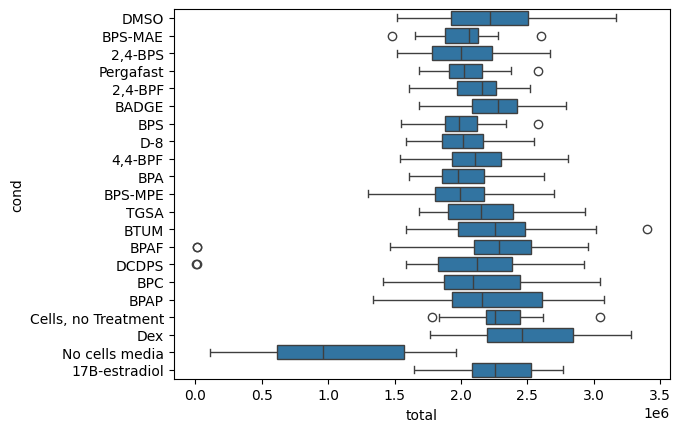

In [ ]:
import seaborn as sns
sns.boxplot(y=a['cond'],x=a["total"])

In [ ]:
df_melted.cond.unique()

array(['DMSO', 'BPS-MAE', '2,4-BPS', 'Pergafast', '2,4-BPF', 'BADGE',
       'Bisphenol', 'D-8', '4,4-BPF', 'BPA', 'BPS-MPE', 'TGSA', 'BTUM',
       'BPAF', 'Bis', 'BPC', 'BPAP', 'Cells, no Treatment', 'Dex',
       'No cells media', '17B-estradiol'], dtype=object)

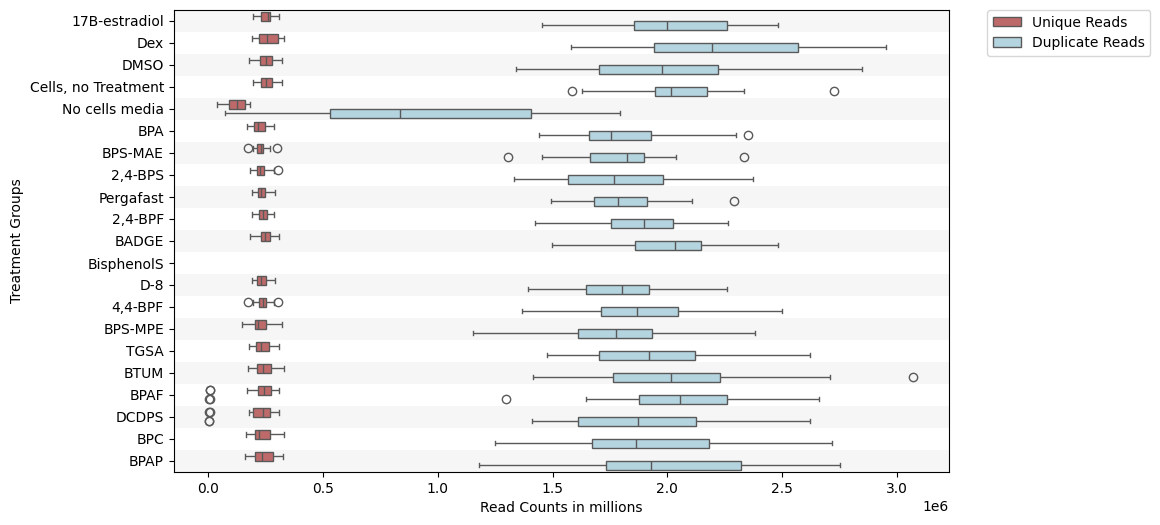

In [ ]:
df_melted = a.melt(
    id_vars=['cond'],
    value_vars=['Unique Reads', 'Duplicate Reads'],
    var_name='Read Type',
    value_name='Read Count'
)
fig, ax = plt.subplots(figsize=(10, 6))
cond_order = ['17B-estradiol','Dex','DMSO','Cells, no Treatment','No cells media', 'BPA','BPS-MAE', '2,4-BPS','Pergafast', '2,4-BPF', 'BADGE','BisphenolS','D-8', '4,4-BPF', 'BPA', 'BPS-MPE', 'TGSA', 'BTUM','BPAF', 'DCDPS', 'BPC', 'BPAP']
for i, cond in enumerate(cond_order):
    if i % 2 == 0:
        ax.axhspan(i - 0.5, i + 0.5, facecolor='lightgray', alpha=0.2)
sns.boxplot(y=df_melted['cond'], x='Read Count', hue='Read Type', data=df_melted, order=cond_order,  palette=["indianred", "lightblue"],ax=ax)
import matplotlib.pyplot as plt
# Move the legend outside the plot
plt.legend(
    bbox_to_anchor=(1.05, 1),  # X=1.05 puts it slightly to the right of the plot
    loc='upper left',          # Anchor legend to upper-left corner of its box
    borderaxespad=0
)
plt.ylabel("Treatment Groups")
plt.xlabel("Read Counts in millions")
# Rotate x-axis labels and adjust layout
plt.show()

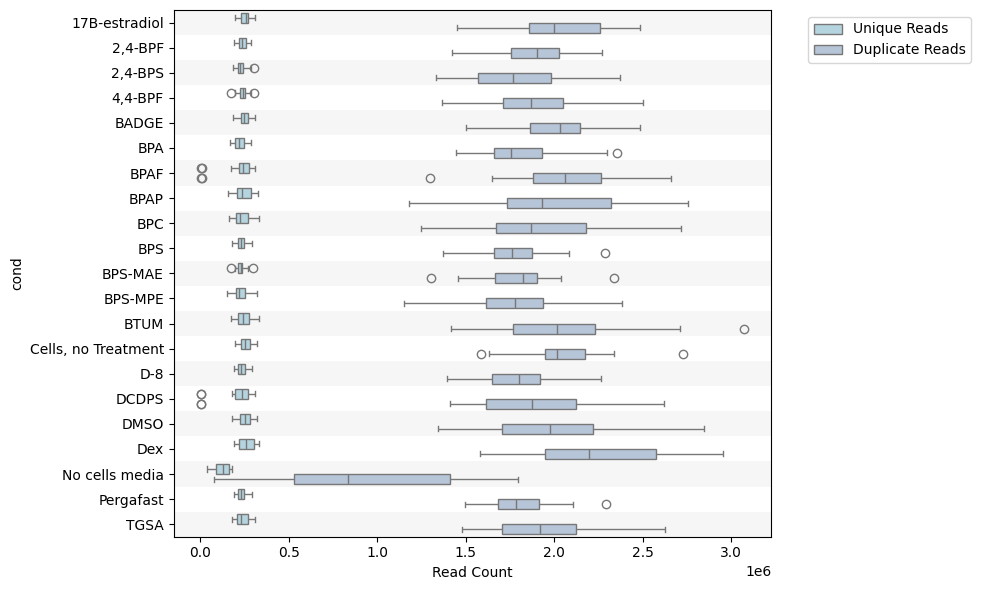

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(10, 6))
cond_order = sorted(df_melted['cond'].unique())
for i, cond in enumerate(cond_order):
    if i % 2 == 0:
        ax.axhspan(i - 0.5, i + 0.5, facecolor='lightgray', alpha=0.2)
sns.boxplot(
    y='cond',
    x='Read Count',
    hue='Read Type',
    data=df_melted,
    order=cond_order,
    palette=["lightblue", "lightsteelblue"],
    ax=ax
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
df = pd.read_table("multiqc_fastqc.txt")
df['per_base_sequence_content']

0      fail
1      fail
2      fail
3      fail
4      fail
       ... 
762    fail
763    fail
764    fail
765    fail
766    fail
Name: per_base_sequence_content, Length: 767, dtype: object

In [ ]:
df

Sample          LIBRARY  UNPAIRED_READS_EXAMINED  \
0    SRR21043193SC  Unknown Library                2457193.0   
1    SRR21043194SC  Unknown Library                2262506.0   
2    SRR21043195SC  Unknown Library                2395145.0   
3    SRR21043196SC  Unknown Library                2535232.0   
4    SRR21043197SC  Unknown Library                2064239.0   
..             ...              ...                      ...   
763  SRR21043956SC  Unknown Library                2304664.0   
764  SRR21043957SC  Unknown Library                2582519.0   
765  SRR21043958SC  Unknown Library                2196676.0   
766  SRR21043959SC  Unknown Library                2714833.0   
767  SRR21043960SC  Unknown Library                2583499.0   

     READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0                    0.0                        544671.0             0.0   
1                    0.0                        487489.0             0.0   
2                    0.0                        534582.0             0.0   
3                    0.0                        558051.0             0.0   
4                    0.0                        462257.0             0.0   
..                   ...                             ...             ...   
763                  0.0                        513720.0             0.0   
764                  0.0                        569409.0             0.0   
765                  0.0                        491042.0             0.0   
766                  0.0                        616472.0             0.0   
767                  0.0                        573966.0             0.0   

     UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0                   2430865.0                   0.0   
1                   2236285.0                   0.0   
2                   2369391.0                   0.0   
3                   2508785.0                   0.0   
4                   2039505.0                   0.0   
..                        ...                   ...   
763                 2278699.0                   0.0   
764                 2555739.0                   0.0   
765                 2171313.0                   0.0   
766                 2687450.0                   0.0   
767                 2557035.0                   0.0   

     READ_PAIR_OPTICAL_DUPLICATES  PERCENT_DUPLICATION  ESTIMATED_LIBRARY_SIZE  
0                             0.0             0.989285                     NaN  
1                             0.0             0.988411                     NaN  
2                             0.0             0.989247                     NaN  
3                             0.0             0.989568                     NaN  
4                             0.0             0.988018                     NaN  
..                            ...                  ...                     ...  
763                           0.0             0.988734                     NaN  
764                           0.0             0.989630                     NaN  
765                           0.0             0.988454                     NaN  
766                           0.0             0.989914                     NaN  
767                           0.0             0.989757                     NaN  

[768 rows x 11 columns]

In [ ]:
df

Sample  UNPAIRED_READS_EXAMINED  READ_PAIRS_EXAMINED  \
0    SRR21043193                2457193.0                  0.0   
1    SRR21043194                2262506.0                  0.0   
2    SRR21043195                2395145.0                  0.0   
3    SRR21043196                2535232.0                  0.0   
4    SRR21043197                2064239.0                  0.0   
..           ...                      ...                  ...   
763  SRR21043956                2304664.0                  0.0   
764  SRR21043957                2582519.0                  0.0   
765  SRR21043958                2196676.0                  0.0   
766  SRR21043959                2714833.0                  0.0   
767  SRR21043960                2583499.0                  0.0   

     UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0                   2430865.0                   0.0   
1                   2236285.0                   0.0   
2                   2369391.0                   0.0   
3                   2508785.0                   0.0   
4                   2039505.0                   0.0   
..                        ...                   ...   
763                 2278699.0                   0.0   
764                 2555739.0                   0.0   
765                 2171313.0                   0.0   
766                 2687450.0                   0.0   
767                 2557035.0                   0.0   

     READ_PAIR_OPTICAL_DUPLICATES  PERCENT_DUPLICATION  \
0                             0.0             0.989285   
1                             0.0             0.988411   
2                             0.0             0.989247   
3                             0.0             0.989568   
4                             0.0             0.988018   
..                            ...                  ...   
763                           0.0             0.988734   
764                           0.0             0.989630   
765                           0.0             0.988454   
766                           0.0             0.989914   
767                           0.0             0.989757   

     ESTIMATED_LIBRARY_SIZE      total  
0                       NaN  2457193.0  
1                       NaN  2262506.0  
2                       NaN  2395145.0  
3                       NaN  2535232.0  
4                       NaN  2064239.0  
..                      ...        ...  
763                     NaN  2304664.0  
764                     NaN  2582519.0  
765                     NaN  2196676.0  
766                     NaN  2714833.0  
767                     NaN  2583499.0  

[768 rows x 9 columns]

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_table("/content/multiqc_picard_dups.txt").drop(columns = ["LIBRARY", "SECONDARY_OR_SUPPLEMENTARY_RDS", "UNMAPPED_READS", "READ_PAIRS_EXAMINED", "READ_PAIR_DUPLICATES", "READ_PAIR_OPTICAL_DUPLICATES", "ESTIMATED_LIBRARY_SIZE"])
df["total"] = df["UNPAIRED_READS_EXAMINED"]
df["Sample"] = df.Sample.str.replace("SC", "")
df
cond = pd.read_csv("condition.csv")
cond["conc"] = cond.condition.str.split('_').str[-1].str.replace("[", "").str.replace("]", "")
cond["cond"] = cond.condition.str.split('_').str[0]
a = cond.merge(df, how="outer", left_on='x', right_on='Sample')
a = a.dropna()
#a['total'] = a['Unique Reads']+a['Duplicate Reads']
a = a.replace("No", "No cells media")
a = a.replace("cells,", "Cells, no Treatment")
a = a.replace("Bisphenol", "BPS")
a = a.replace("Bis", "DCDPS")
cond_order = ['17B-estradiol','Dex','DMSO','Cells, no Treatment','No cells media', 'BPA','BPS-MAE', '2,4-BPS','Pergafast', '2,4-BPF', 'BADGE','BPS','D-8', '4,4-BPF', 'BPA', 'BPS-MPE', 'TGSA', 'BTUM','BPAF', 'DCDPS', 'BPC', 'BPAP']
a

Unnamed: 0            x             condition  conc           cond  \
0             9  SRR21043193         DMSO_0.1%_[0]     0           DMSO   
1             3  SRR21043194         DMSO_0.1%_[0]     0           DMSO   
2             4  SRR21043195         DMSO_0.1%_[0]     0           DMSO   
3            36  SRR21043196         DMSO_0.1%_[0]     0           DMSO   
4             1  SRR21043197          BPS-MAE_[10]    10        BPS-MAE   
..          ...          ...                   ...   ...            ...   
763         757  SRR21043956  17B-estradiol_[1000]  1000  17B-estradiol   
764         766  SRR21043957   17B-estradiol_[100]   100  17B-estradiol   
765         760  SRR21043958    17B-estradiol_[10]    10  17B-estradiol   
766         765  SRR21043959     17B-estradiol_[1]     1  17B-estradiol   
767         767  SRR21043960   17B-estradiol_[0.1]   0.1  17B-estradiol   

          Sample  UNPAIRED_READS_EXAMINED  UNPAIRED_READ_DUPLICATES  \
0    SRR21043193                2457193.0                 2430865.0   
1    SRR21043194                2262506.0                 2236285.0   
2    SRR21043195                2395145.0                 2369391.0   
3    SRR21043196                2535232.0                 2508785.0   
4    SRR21043197                2064239.0                 2039505.0   
..           ...                      ...                       ...   
763  SRR21043956                2304664.0                 2278699.0   
764  SRR21043957                2582519.0                 2555739.0   
765  SRR21043958                2196676.0                 2171313.0   
766  SRR21043959                2714833.0                 2687450.0   
767  SRR21043960                2583499.0                 2557035.0   

     PERCENT_DUPLICATION      total  
0               0.989285  2457193.0  
1               0.988411  2262506.0  
2               0.989247  2395145.0  
3               0.989568  2535232.0  
4               0.988018  2064239.0  
..                   ...        ...  
763             0.988734  2304664.0  
764             0.989630  2582519.0  
765             0.988454  2196676.0  
766             0.989914  2714833.0  
767             0.989757  2583499.0  

[768 rows x 10 columns]

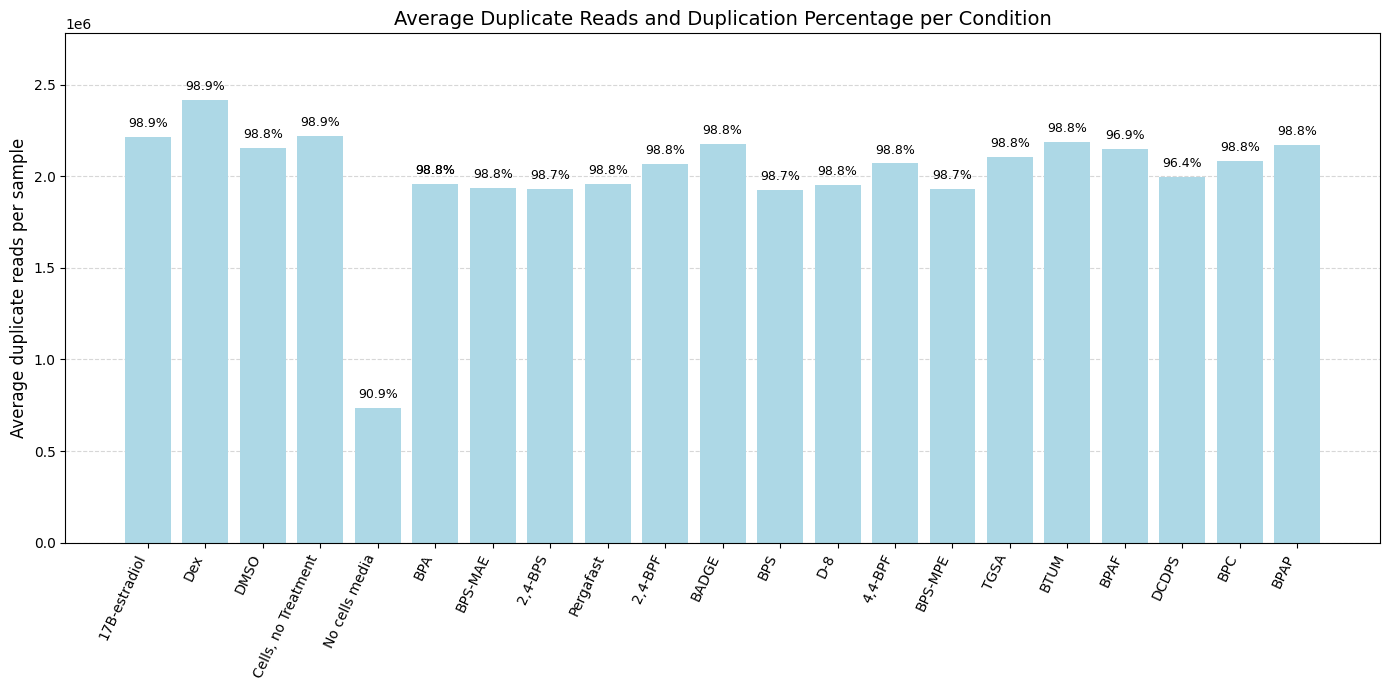

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
cond_order = [
    '17B-estradiol','Dex','DMSO','Cells, no Treatment','No cells media',
    'BPA','BPS-MAE','2,4-BPS','Pergafast','2,4-BPF','BADGE','BPS',
    'D-8','4,4-BPF','BPA','BPS-MPE','TGSA','BTUM','BPAF','DCDPS','BPC','BPAP'
]
grouped = (
    a.groupby("cond")[["UNPAIRED_READ_DUPLICATES", "PERCENT_DUPLICATION"]]
     .mean()
     .reindex(cond_order)
     .dropna()
)

fig, ax = plt.subplots(figsize=(14, 7))

bars = ax.bar(
    grouped.index,
    grouped["UNPAIRED_READ_DUPLICATES"],
    color="lightblue",   # light blue
    edgecolor="none"   # <-- no border around the bars
)
# Adding duplication perc labels
for bar, pct in zip(bars, grouped["PERCENT_DUPLICATION"]):
    ax.annotate(f'{pct * 100:.1f}%',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)
ax.set_ylim(0, grouped["UNPAIRED_READ_DUPLICATES"].max() * 1.15)
ax.set_ylabel("Average duplicate reads per sample", fontsize=12)
ax.set_title("Average Duplicate Reads and Duplication Percentage per Condition", fontsize=14)
ax.yaxis.grid(True, linestyle='--', alpha=0.5)
ax.set_axisbelow(True)  # this eill make grid appear under bars
plt.xticks(rotation=65, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_table("/content/mqc_bowtie2_se_plot_1.txt")
df["total"] = df["SE mapped uniquely"]+df["SE multimapped"]+df["SE not aligned"]
df["Sample"] = df.Sample.str.replace("bowtie", "")
cond = pd.read_csv("condition.csv")
cond["conc"] = cond.condition.str.split('_').str[-1].str.replace("[", "").str.replace("]", "")
cond["cond"] = cond.condition.str.split('_').str[0]
a = cond.merge(df, how="outer", left_on='x', right_on='Sample')
a = a.dropna()
#a['total'] = a['Unique Reads']+a['Duplicate Reads']
a = a.replace("No", "No cells media")
a = a.replace("cells,", "Cells, no Treatment")
a = a.replace("Bisphenol", "BPS")
a = a.replace("Bis", "DCDPS")
cond_order = ['17B-estradiol','Dex','DMSO','Cells, no Treatment','No cells media', 'BPA','BPS-MAE', '2,4-BPS','Pergafast', '2,4-BPF', 'BADGE','BPS','D-8', '4,4-BPF', 'BPA', 'BPS-MPE', 'TGSA', 'BTUM','BPAF', 'DCDPS', 'BPC', 'BPAP']
a

Unnamed: 0            x              condition   conc           cond  \
0             9  SRR21043193          DMSO_0.1%_[0]      0           DMSO   
1             3  SRR21043194          DMSO_0.1%_[0]      0           DMSO   
2             4  SRR21043195          DMSO_0.1%_[0]      0           DMSO   
3            36  SRR21043196          DMSO_0.1%_[0]      0           DMSO   
4             1  SRR21043197           BPS-MAE_[10]     10        BPS-MAE   
..          ...          ...                    ...    ...            ...   
762         759  SRR21043955  17B-estradiol_[10000]  10000  17B-estradiol   
763         757  SRR21043956   17B-estradiol_[1000]   1000  17B-estradiol   
764         766  SRR21043957    17B-estradiol_[100]    100  17B-estradiol   
765         760  SRR21043958     17B-estradiol_[10]     10  17B-estradiol   
766         765  SRR21043959      17B-estradiol_[1]      1  17B-estradiol   

          Sample  SE mapped uniquely  SE multimapped  SE not aligned  \
0    SRR21043193           2406876.0         10193.0         82608.0   
1    SRR21043194           2223318.0          9275.0         65628.0   
2    SRR21043195           2338454.0         10059.0         95765.0   
3    SRR21043196           2483156.0         10134.0         91059.0   
4    SRR21043197           2019106.0          8764.0         69925.0   
..           ...                 ...             ...             ...   
762  SRR21043955           2385216.0         10015.0         65496.0   
763  SRR21043956           2270792.0          9938.0         57683.0   
764  SRR21043957           2537062.0         10840.0         74178.0   
765  SRR21043958           2164179.0          9985.0         57868.0   
766  SRR21043959           2667536.0         12545.0         79756.0   

         total  
0    2499677.0  
1    2298221.0  
2    2444278.0  
3    2584349.0  
4    2097795.0  
..         ...  
762  2460727.0  
763  2338413.0  
764  2622080.0  
765  2232032.0  
766  2759837.0  

[767 rows x 10 columns]

<Axes: xlabel='total', ylabel='cond'>

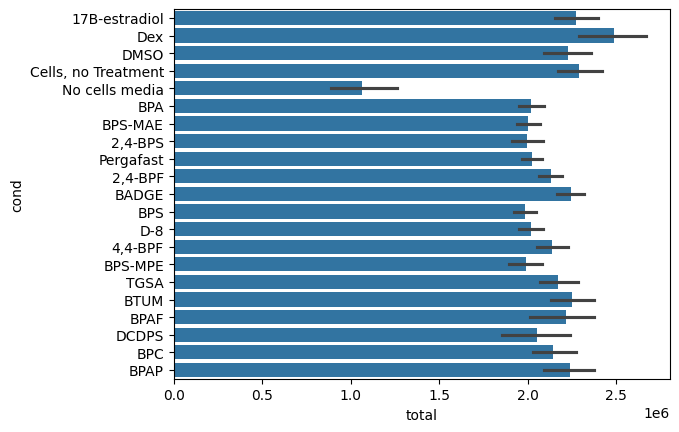

In [ ]:
sns.barplot(x="total", y="cond", data=a, order = cond_order)

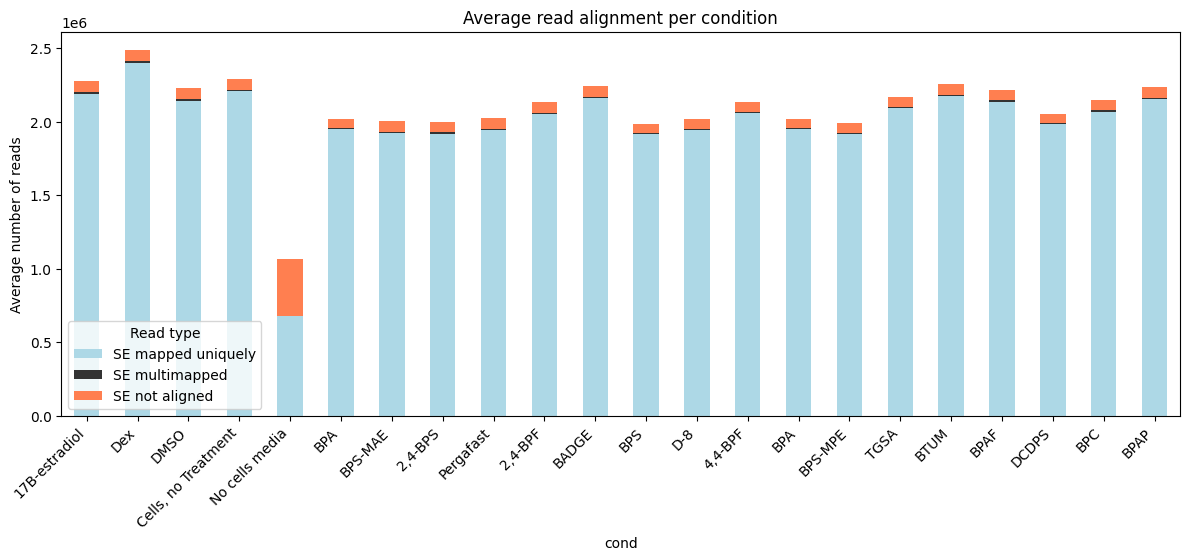

In [ ]:
grouped_avg = a.groupby("cond")[["SE mapped uniquely", "SE multimapped", "SE not aligned"]].mean()
grouped_avg = grouped_avg.loc[cond_order]
colors = {
    "SE mapped uniquely": "#ADD8E6",  # light blue
    "SE multimapped": "#333333",     # dark grey
    "SE not aligned":  "#FF7F50"     # coral
}
ax = grouped_avg.plot(
    kind='bar',
    stacked=True,
    color=[colors[col] for col in grouped_avg.columns],
    figsize=(12, 6)
)
plt.ylabel("Average number of reads")
plt.title("Average read alignment per condition")
plt.tight_layout()
plt.legend(title="Read type")
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
grouped_avg.head()

SE mapped uniquely  SE multimapped  SE not aligned
cond                                                             
17B-estradiol        2.189743e+06     9607.565217    75962.956522
2,4-BPF              2.052899e+06     9254.800000    68963.200000
2,4-BPS              1.918982e+06     8552.025000    68636.725000
4,4-BPF              2.056753e+06     8779.000000    70533.475000
BADGE                2.161048e+06     9567.100000    74271.975000

In [ ]:
b = pd.read_table("a.txt")
b["b"].mean()

np.float64(94.60435462842244)

In [ ]:
df

Sample  percent_assigned  Assigned
0    SRR21043193SC         69.984791   2107023
1    SRR21043194SC         70.723035   1949914
2    SRR21043195SC         69.634679   2047043
3    SRR21043196SC         70.061352   2173830
4    SRR21043197SC         69.752488   1767256
..             ...               ...       ...
763  SRR21043956SC         70.200840   1982570
764  SRR21043957SC         70.194560   2217609
765  SRR21043958SC         70.181357   1889386
766  SRR21043959SC         69.756517   2330176
767  SRR21043960SC         70.047063   2217096

[768 rows x 3 columns]

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_table("/content/multiqc_featureCounts.txt")
df.Sample = df.Sample.str.replace("SC", "")
cond = pd.read_csv("condition.csv")
cond["conc"] = cond.condition.str.split('_').str[-1].str.replace("[", "").str.replace("]", "")
cond["cond"] = cond.condition.str.split('_').str[0]
a = cond.merge(df, how="outer", left_on='x', right_on='Sample')
a = a.dropna()
#a['total'] = a['Unique Reads']+a['Duplicate Reads']
a = a.replace("No", "No cells media")
a = a.replace("cells,", "Cells, no Treatment")
a = a.replace("Bisphenol", "BPS")
a = a.replace("Bis", "DCDPS")
cond_order = ['17B-estradiol','Dex','DMSO','Cells, no Treatment','No cells media', 'BPA','BPS-MAE', '2,4-BPS','Pergafast', '2,4-BPF', 'BADGE','BPS','D-8', '4,4-BPF', 'BPA', 'BPS-MPE', 'TGSA', 'BTUM','BPAF', 'DCDPS', 'BPC', 'BPAP']
a.columns

Index(['Unnamed: 0', 'x', 'condition', 'conc', 'cond', 'Sample', 'Total',
       'Assigned', 'Unassigned_Unmapped', 'Unassigned_Read_Type',
       'Unassigned_Singleton', 'Unassigned_MappingQuality',
       'Unassigned_Chimera', 'Unassigned_FragmentLength',
       'Unassigned_Duplicate', 'Unassigned_MultiMapping',
       'Unassigned_Secondary', 'Unassigned_NonSplit', 'Unassigned_NoFeatures',
       'Unassigned_Overlapping_Length', 'Unassigned_Ambiguity',
       'percent_assigned'],
      dtype='object')

<Axes: xlabel='Total', ylabel='cond'>

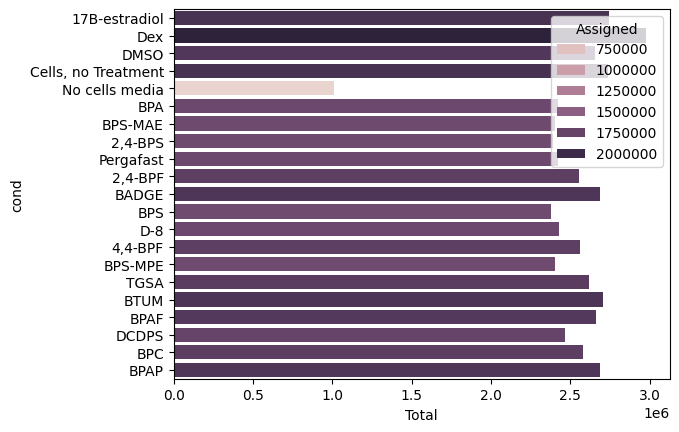

In [ ]:
grouped_avg = a.groupby("cond")[["Total", "Assigned", "percent_assigned"]].mean()
sns.barplot(x="Total", y="cond", data=grouped_avg, order = cond_order, hue = "Assigned")

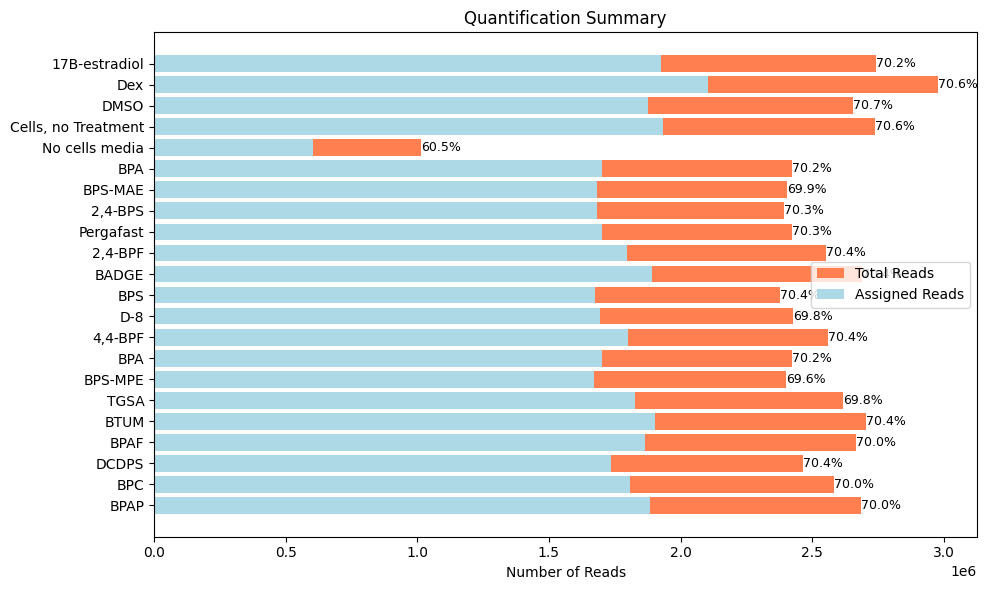

In [ ]:
grouped_avg = a.groupby("cond")[["Total", "Assigned", "percent_assigned"]].mean()
grouped_avg = grouped_avg.loc[cond_order[::-1]]
fig, ax = plt.subplots(figsize=(10, 6))
y_pos = range(len(grouped_avg))
ax.barh(y=y_pos, width=grouped_avg["Total"], color="#FF7F50", label="Total Reads")
ax.barh(y=y_pos, width=grouped_avg["Assigned"], color="#ADD8E6" , label="Assigned Reads")
for i, (total, percent) in enumerate(zip(grouped_avg["Total"], grouped_avg["percent_assigned"])):
    ax.text(total, i, f"{percent:.1f}%", va='center', ha='left', fontsize=9)
ax.set_yticks(y_pos)
ax.set_yticklabels(grouped_avg.index)
ax.set_xlabel("Number of Reads")
ax.set_title("Quantification Summary")
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
a.cond.unique()
a[a["cond"] != "No cells media"]["percent_assigned"].mean()

np.float64(70.19077233779741)

In [ ]:
a["percent_assigned"].mean()

np.float64(69.78708504572981)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Sample                          768 non-null    object 
 1   LIBRARY                         768 non-null    object 
 2   UNPAIRED_READS_EXAMINED         768 non-null    float64
 3   READ_PAIRS_EXAMINED             768 non-null    float64
 4   SECONDARY_OR_SUPPLEMENTARY_RDS  768 non-null    float64
 5   UNMAPPED_READS                  768 non-null    float64
 6   UNPAIRED_READ_DUPLICATES        768 non-null    float64
 7   READ_PAIR_DUPLICATES            768 non-null    float64
 8   READ_PAIR_OPTICAL_DUPLICATES    768 non-null    float64
 9   PERCENT_DUPLICATION             768 non-null    float64
 10  ESTIMATED_LIBRARY_SIZE          0 non-null      float64
dtypes: float64(9), object(2)
memory usage: 66.1+ KB


Unnamed: 0            x             condition  conc           cond  \
0             9  SRR21043193         DMSO_0.1%_[0]     0           DMSO   
1             3  SRR21043194         DMSO_0.1%_[0]     0           DMSO   
2             4  SRR21043195         DMSO_0.1%_[0]     0           DMSO   
3            36  SRR21043196         DMSO_0.1%_[0]     0           DMSO   
4             1  SRR21043197          BPS-MAE_[10]    10        BPS-MAE   
..          ...          ...                   ...   ...            ...   
763         757  SRR21043956  17B-estradiol_[1000]  1000  17B-estradiol   
764         766  SRR21043957   17B-estradiol_[100]   100  17B-estradiol   
765         760  SRR21043958    17B-estradiol_[10]    10  17B-estradiol   
766         765  SRR21043959     17B-estradiol_[1]     1  17B-estradiol   
767         767  SRR21043960   17B-estradiol_[0.1]   0.1  17B-estradiol   

          Sample          LIBRARY  UNPAIRED_READS_EXAMINED  \
0    SRR21043193  Unknown Library                2457193.0   
1    SRR21043194  Unknown Library                2262506.0   
2    SRR21043195  Unknown Library                2395145.0   
3    SRR21043196  Unknown Library                2535232.0   
4    SRR21043197  Unknown Library                2064239.0   
..           ...              ...                      ...   
763  SRR21043956  Unknown Library                2304664.0   
764  SRR21043957  Unknown Library                2582519.0   
765  SRR21043958  Unknown Library                2196676.0   
766  SRR21043959  Unknown Library                2714833.0   
767  SRR21043960  Unknown Library                2583499.0   

     READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0                    0.0                        544671.0             0.0   
1                    0.0                        487489.0             0.0   
2                    0.0                        534582.0             0.0   
3                    0.0                        558051.0             0.0   
4                    0.0                        462257.0             0.0   
..                   ...                             ...             ...   
763                  0.0                        513720.0             0.0   
764                  0.0                        569409.0             0.0   
765                  0.0                        491042.0             0.0   
766                  0.0                        616472.0             0.0   
767                  0.0                        573966.0             0.0   

     UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0                   2430865.0                   0.0   
1                   2236285.0                   0.0   
2                   2369391.0                   0.0   
3                   2508785.0                   0.0   
4                   2039505.0                   0.0   
..                        ...                   ...   
763                 2278699.0                   0.0   
764                 2555739.0                   0.0   
765                 2171313.0                   0.0   
766                 2687450.0                   0.0   
767                 2557035.0                   0.0   

     READ_PAIR_OPTICAL_DUPLICATES  PERCENT_DUPLICATION  
0                             0.0              98.9285  
1                             0.0              98.8411  
2                             0.0              98.9247  
3                             0.0              98.9568  
4                             0.0              98.8018  
..                            ...                  ...  
763                           0.0              98.8734  
764                           0.0              98.9630  
765                           0.0              98.8454  
766                           0.0              98.9914  
767                           0.0              98.9757  

[768 rows x 15 columns]

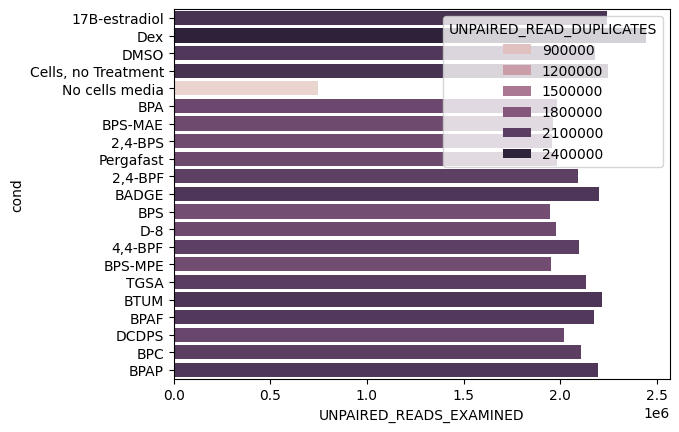

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_table("/content/multiqc_picard_dups.txt")
df.Sample = df.Sample.str.replace("SC", "")
cond = pd.read_csv("condition.csv")
cond["conc"] = cond.condition.str.split('_').str[-1].str.replace("[", "").str.replace("]", "")
cond["cond"] = cond.condition.str.split('_').str[0]
a = cond.merge(df, how="outer", left_on='x', right_on='Sample')
a = a.drop(columns=['ESTIMATED_LIBRARY_SIZE'])
a = a.dropna()
#a['total'] = a['Unique Reads']+a['Duplicate Reads']
a = a.replace("No", "No cells media")
a = a.replace("cells,", "Cells, no Treatment")
a = a.replace("Bisphenol", "BPS")
a = a.replace("Bis", "DCDPS")
a.PERCENT_DUPLICATION = a.PERCENT_DUPLICATION*100
cond_order = ['17B-estradiol','Dex','DMSO','Cells, no Treatment','No cells media', 'BPA','BPS-MAE', '2,4-BPS','Pergafast', '2,4-BPF', 'BADGE','BPS','D-8', '4,4-BPF', 'BPA', 'BPS-MPE', 'TGSA', 'BTUM','BPAF', 'DCDPS', 'BPC', 'BPAP']
import pandas as pd
import matplotlib.pyplot as plt

# Group and average
grouped_avg = a.groupby("cond")[["UNPAIRED_READS_EXAMINED", "UNPAIRED_READ_DUPLICATES", "PERCENT_DUPLICATION"]].mean()
sns.barplot(x="UNPAIRED_READS_EXAMINED", y="cond", data=grouped_avg, order = cond_order, hue = "UNPAIRED_READ_DUPLICATES")
a

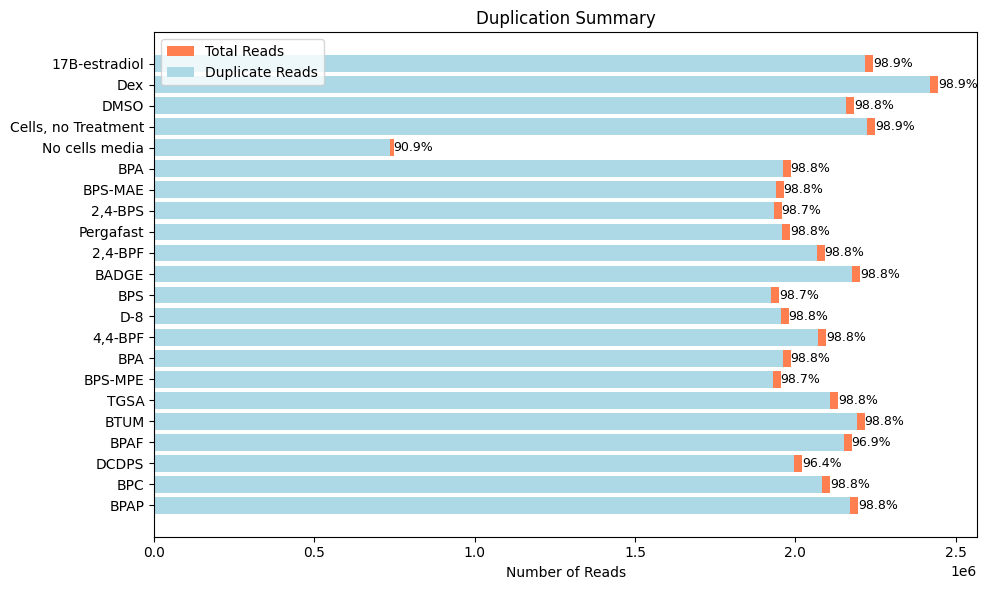

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
grouped_avg = a.groupby("cond")[["UNPAIRED_READS_EXAMINED", "UNPAIRED_READ_DUPLICATES", "PERCENT_DUPLICATION"]].mean()
grouped_avg = grouped_avg.loc[cond_order[::-1]]
fig, ax = plt.subplots(figsize=(10, 6))
y_pos = range(len(grouped_avg))
ax.barh(y=y_pos, width=grouped_avg["UNPAIRED_READS_EXAMINED"], color="#FF7F50", label="Total Reads")
ax.barh(y=y_pos, width=grouped_avg["UNPAIRED_READ_DUPLICATES"], color="#ADD8E6", label="Duplicate Reads")
for i, (total, percent) in enumerate(zip(grouped_avg["UNPAIRED_READS_EXAMINED"], grouped_avg["PERCENT_DUPLICATION"])):
    ax.text(total, i, f"{percent:.1f}%", va='center', ha='left', fontsize=9)
ax.set_yticks(y_pos)
ax.set_yticklabels(grouped_avg.index)
ax.set_xlabel("Number of Reads")
ax.set_title("Duplication Summary")
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
a.PERCENT_DUPLICATION.mean()

np.float64(98.24429843749999)

In [ ]:
a

Unnamed: 0            x             condition  conc           cond  \
0             9  SRR21043193         DMSO_0.1%_[0]     0           DMSO   
1             3  SRR21043194         DMSO_0.1%_[0]     0           DMSO   
2             4  SRR21043195         DMSO_0.1%_[0]     0           DMSO   
3            36  SRR21043196         DMSO_0.1%_[0]     0           DMSO   
4             1  SRR21043197          BPS-MAE_[10]    10        BPS-MAE   
..          ...          ...                   ...   ...            ...   
763         757  SRR21043956  17B-estradiol_[1000]  1000  17B-estradiol   
764         766  SRR21043957   17B-estradiol_[100]   100  17B-estradiol   
765         760  SRR21043958    17B-estradiol_[10]    10  17B-estradiol   
766         765  SRR21043959     17B-estradiol_[1]     1  17B-estradiol   
767         767  SRR21043960   17B-estradiol_[0.1]   0.1  17B-estradiol   

          Sample  percent_duplicates  percent_gc  avg_sequence_length  \
0    SRR21043193           88.673159        48.0                 51.0   
1    SRR21043194           88.372029        48.0                 51.0   
2    SRR21043195           88.281002        48.0                 51.0   
3    SRR21043196           88.747350        48.0                 51.0   
4    SRR21043197           88.326800        48.0                 51.0   
..           ...                 ...         ...                  ...   
763  SRR21043956           88.571768        48.0                 51.0   
764  SRR21043957           88.837014        48.0                 51.0   
765  SRR21043958           88.570018        47.0                 51.0   
766  SRR21043959           88.932369        48.0                 51.0   
767  SRR21043960           88.991096        48.0                 51.0   

     median_sequence_length  percent_fails  total_sequences  
0                        51      27.272727        2502049.0  
1                        51      27.272727        2300979.0  
2                        51      27.272727        2447343.0  
3                        51      27.272727        2586552.0  
4                        51      27.272727        2099832.0  
..                      ...            ...              ...  
763                      51      27.272727        2358960.0  
764                      51      27.272727        2624553.0  
765                      51      27.272727        2254700.0  
766                      51      27.272727        2763530.0  
767                      51      27.272727        2626539.0  

[768 rows x 12 columns]

In [ ]:
df = pd.read_csv("/content/SraRunTable.csv")
df

Run Assay Type  AvgSpotLen      Bases             batch  \
0    SRR21043193    RNA-Seq          51  127604499  Plate 1C index F   
1    SRR21043194    RNA-Seq          51  117349929  Plate 1C index F   
2    SRR21043195    RNA-Seq          51  124814493  Plate 1C index F   
3    SRR21043196    RNA-Seq          51  131914152  Plate 1C index F   
4    SRR21043197    RNA-Seq          51  107091432  Plate 1C index F   
..           ...        ...         ...        ...               ...   
763  SRR21043956    RNA-Seq          51  120306960  Plate 1C index F   
764  SRR21043957    RNA-Seq          51  133852203  Plate 1C index F   
765  SRR21043958    RNA-Seq          51  114989700  Plate 1C index F   
766  SRR21043959    RNA-Seq          51  140940030  Plate 1C index F   
767  SRR21043960    RNA-Seq          51  133953489  Plate 1C index F   

      BioProject     BioSample     Bytes cell_line  \
0    PRJNA869442  SAMN30307279  53598843     MCF-7   
1    PRJNA869442  SAMN30307280  49448030     MCF-7   
2    PRJNA869442  SAMN30307281  52803856     MCF-7   
3    PRJNA869442  SAMN30307282  55473624     MCF-7   
4    PRJNA869442  SAMN30307307  44924459     MCF-7   
..           ...           ...       ...       ...   
763  PRJNA869442  SAMN30307286  50413121     MCF-7   
764  PRJNA869442  SAMN30307287  55820932     MCF-7   
765  PRJNA869442  SAMN30307288  48156619     MCF-7   
766  PRJNA869442  SAMN30307289  59099886     MCF-7   
767  PRJNA869442  SAMN30307290  55954647     MCF-7   

                                           Center Name  ... solvent_control  \
0    MECHANISTIC STUDIES DIVISION GENOMICS LABORATO...  ...               T   
1    MECHANISTIC STUDIES DIVISION GENOMICS LABORATO...  ...               T   
2    MECHANISTIC STUDIES DIVISION GENOMICS LABORATO...  ...               T   
3    MECHANISTIC STUDIES DIVISION GENOMICS LABORATO...  ...               T   
4    MECHANISTIC STUDIES DIVISION GENOMICS LABORATO...  ...               F   
..                                                 ...  ...             ...   
763  MECHANISTIC STUDIES DIVISION GENOMICS LABORATO...  ...               F   
764  MECHANISTIC STUDIES DIVISION GENOMICS LABORATO...  ...               F   
765  MECHANISTIC STUDIES DIVISION GENOMICS LABORATO...  ...               F   
766  MECHANISTIC STUDIES DIVISION GENOMICS LABORATO...  ...               F   
767  MECHANISTIC STUDIES DIVISION GENOMICS LABORATO...  ...               F   

       source_name  SRA Study technical_control           treatment well  \
0    breast cancer  SRP392093                 F                DMSO  D12   
1    breast cancer  SRP392093                 F                DMSO  C12   
2    breast cancer  SRP392093                 F                DMSO  B12   
3    breast cancer  SRP392093                 F                DMSO  A12   
4    breast cancer  SRP392093                 F          BPS-MAE_10   H8   
..             ...        ...               ...                 ...  ...   
763  breast cancer  SRP392093                 F  17B-estradiol_1000  E11   
764  breast cancer  SRP392093                 F   17B-estradiol_100  D11   
765  breast cancer  SRP392093                 F    17B-estradiol_10  C11   
766  breast cancer  SRP392093                 F     17B-estradiol_1  B11   
767  breast cancer  SRP392093                 F   17B-estradiol_0.1  A11   

                    cell_type         tissue      cas-rn  \
0    adenocarcinoma cell line  breast cancer         NaN   
1    adenocarcinoma cell line  breast cancer         NaN   
2    adenocarcinoma cell line  breast cancer         NaN   
3    adenocarcinoma cell line  breast cancer         NaN   
4    adenocarcinoma cell line  breast cancer  97042-18-7   
..                        ...            ...         ...   
763  adenocarcinoma cell line  breast cancer         NaN   
764  adenocarcinoma cell line  breast cancer         NaN   
765  adenocarcinoma cell line  breast cancer         NaN   
766  adenocarcinoma cell line  breast

In [ ]:
b = df.columns.to_list()
print(len(b))
b.remove("Run")
b.remove("Bases")
len(b)

45


43

<Axes: xlabel='Bases', ylabel='cond'>

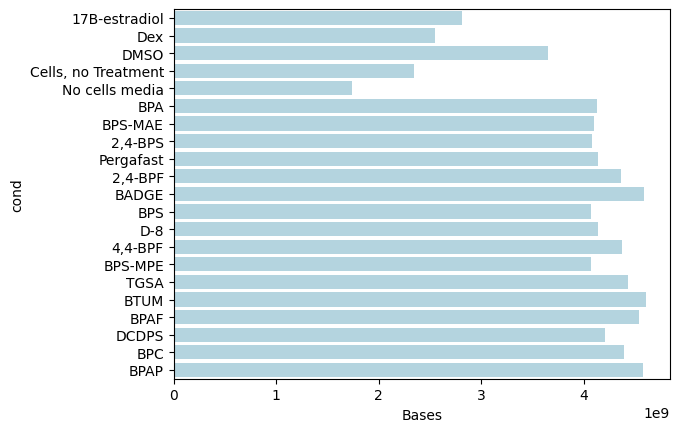

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/SraRunTable.csv")
df = df.drop(columns = b)
#df.Sample = df.Sample.str.replace("SC", "")
cond = pd.read_csv("condition.csv")
cond["conc"] = cond.condition.str.split('_').str[-1].str.replace("[", "").str.replace("]", "")
cond["cond"] = cond.condition.str.split('_').str[0]
a = cond.merge(df, how="outer", left_on='x', right_on='Run')
a = a.dropna()
#a['total'] = a['Unique Reads']+a['Duplicate Reads']
a = a.replace("No", "No cells media")
a = a.replace("cells,", "Cells, no Treatment")
a = a.replace("Bisphenol", "BPS")
a = a.replace("Bis", "DCDPS")
cond_order = ['17B-estradiol','Dex','DMSO','Cells, no Treatment','No cells media', 'BPA','BPS-MAE', '2,4-BPS','Pergafast', '2,4-BPF', 'BADGE','BPS','D-8', '4,4-BPF', 'BPA', 'BPS-MPE', 'TGSA', 'BTUM','BPAF', 'DCDPS', 'BPC', 'BPAP']
import pandas as pd
import matplotlib.pyplot as plt

# Group and average
grouped_avg = a.groupby("cond")[["Bases"]].sum()
sns.barplot(x="Bases", y="cond", data=grouped_avg, order = cond_order, color='lightblue')

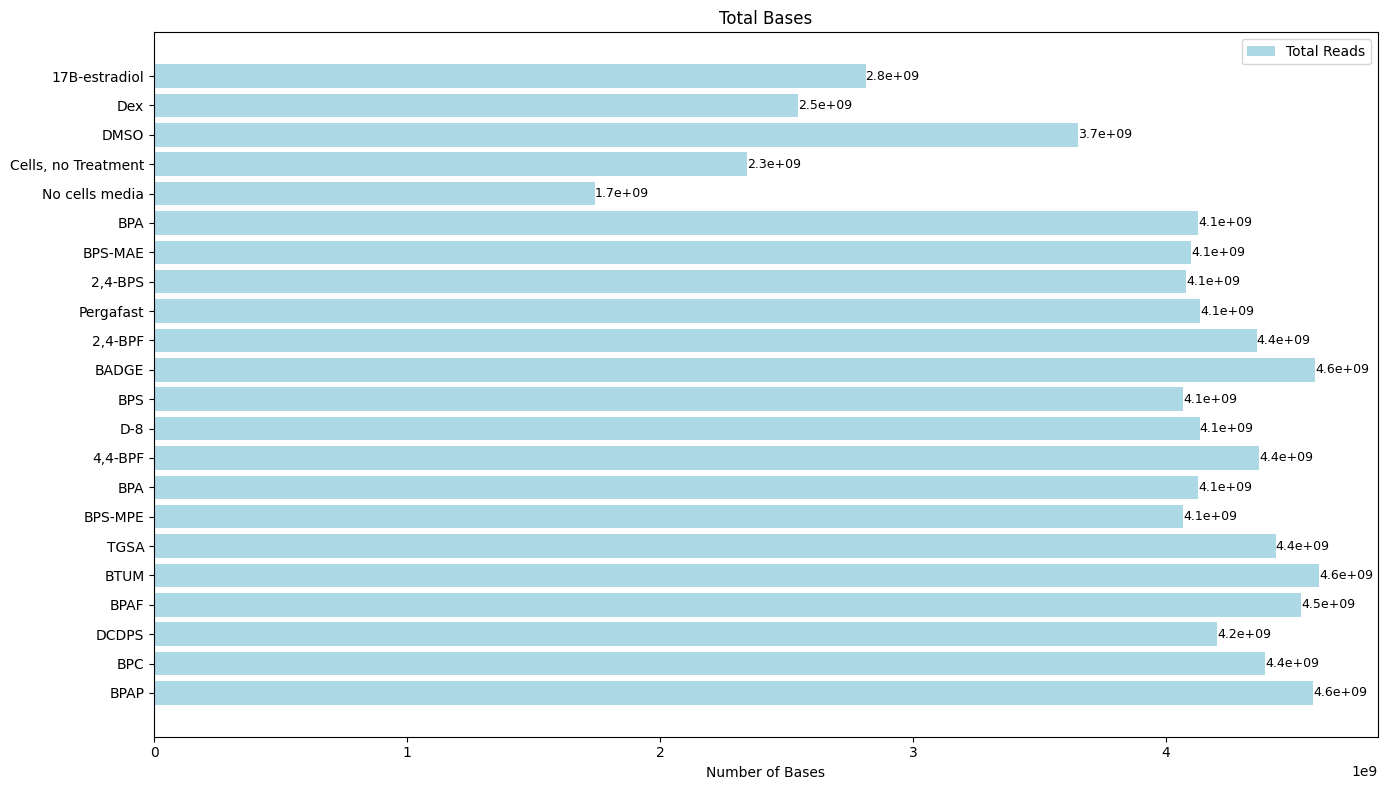

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
grouped_avg = grouped_avg.loc[cond_order[::-1]]
fig, ax = plt.subplots(figsize=(14, 8))
y_pos = range(len(grouped_avg))
ax.barh(y=y_pos, width=grouped_avg["Bases"], color="lightblue", label="Total Reads")
for i, (total, percent) in enumerate(zip(grouped_avg["Bases"], grouped_avg["Bases"])):
    ax.text(total, i,f"{percent:.1e}", va='center', ha='left', fontsize=9)
ax.set_yticks(y_pos)
ax.set_yticklabels(grouped_avg.index)
ax.set_xlabel("Number of Bases")
ax.set_title("Total Bases")
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
files = ["1.csv", "2.csv", "3.csv", "4.csv", "5.csv", "6.csv"]
dfs = []
for file in files:
    df = pd.read_csv(file)
    #df_subset = pd.concat([df.iloc[:1806, :], df.iloc[-1806:, :]])
    df = df.drop_duplicates(subset='gene', keep='first')
    dfs.append(df)

a, b, c, d, e, f = dfs

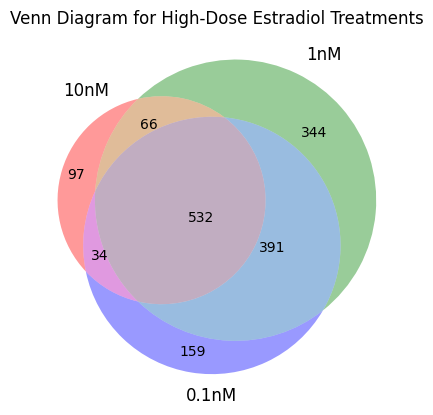

In [ ]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

venn3(
    [set(a['gene']), set(b['gene']), set(c['gene'])],
    set_labels=('10 nM', '1 nM', '0.1 nM')
)
plt.title("Venn Diagram for High-Dose Estradiol Treatments")
plt.show()

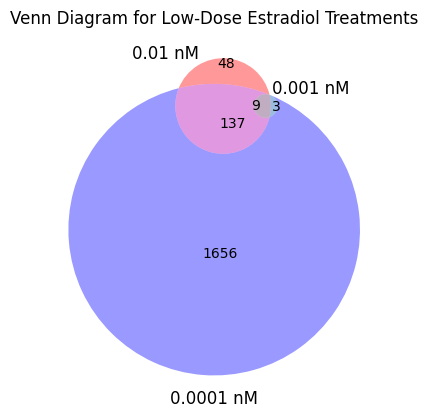

In [ ]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

venn3(
    [set(d['gene']), set(e['gene']), set(f['gene'])],
    set_labels=('0.01 nM', '0.001 nM', '0.0001 nM')
)
plt.title("Venn Diagram for Low-Dose Estradiol Treatments")
plt.show()

In [ ]:
import pandas as pd
files = ["/content/sigGenes_estra10000.csv","/content/sigGenes_estra1000.csv", "/content/sigGenes_estra100.csv", "/content/sigGenes_estra10.csv", "/content/sigGenes_estra1.csv", "/content/sigGenes_estra0.1.csv"]

dfs = []
for file in files:
    print(file)
    df_subset = pd.read_csv(file)
    dfs.append(df_subset)

a, b, c, d, e, f = dfs
a

/content/sigGenes_estra10000.csv
/content/sigGenes_estra1000.csv
/content/sigGenes_estra100.csv
/content/sigGenes_estra10.csv
/content/sigGenes_estra1.csv
/content/sigGenes_estra0.1.csv


gene       ensembl_id          stat  log2FoldChange
0      GREB1  ENSG00000196208  1.375984e-81        3.027825
1       TFF1  ENSG00000160182  2.651725e-46        1.927939
2      KRT81  ENSG00000205426  3.602865e-45       -2.182609
3      PRR11  ENSG00000068489  1.334492e-30        1.968982
4      MYBL1  ENSG00000185697  1.483223e-28        2.951807
..       ...              ...           ...             ...
724    WDR54  ENSG00000005448  4.855868e-02        1.185737
725     CMC4  ENSG00000182712  4.886506e-02        0.513361
726    USP32  ENSG00000170832  4.896710e-02        0.341456
727   DAZAP1  ENSG00000071626  4.929058e-02       -0.787171
728  NADSYN1  ENSG00000172890  4.938187e-02        0.552105

[729 rows x 4 columns]

In [ ]:
e=e.iloc[0:11, :]
e

gene       ensembl_id      stat  log2FoldChange
0             GREB1  ENSG00000196208  0.000132        1.065858
1           POGLUT3  ENSG00000178202  0.000132       -1.297732
2             SNRPC  ENSG00000124562  0.003239       -0.974842
3              BRD2  ENSG00000204256  0.004923       -0.910800
4             P4HA1  ENSG00000122884  0.004923        1.426931
5             HSPA5  ENSG00000044574  0.006331        0.739163
6            LGALS3  ENSG00000131981  0.011767       -0.654436
7   ENSG00000215271  ENSG00000215271  0.015049        1.153112
8             DDIT3  ENSG00000175197  0.018722        0.643638
9            ZFAND5  ENSG00000107372  0.023924       -1.045821
10              ID2  ENSG00000115738  0.025994       -0.671791

In [ ]:
a = a.rename(columns=lambda x: f"estradiol_10_{x}" if x != 'gene' else x)
b = b.rename(columns=lambda x: f"estradiol_1_{x}" if x != 'gene' else x)
c = c.rename(columns=lambda x: f"estradiol_0.1_{x}" if x != 'gene' else x)
d = d.rename(columns=lambda x: f"estradiol_0.01_{x}" if x != 'gene' else x)
e = e.rename(columns=lambda x: f"estradiol_0.001_{x}" if x != 'gene' else x)
f = f.rename(columns=lambda x: f"estradiol_0.0001_{x}" if x != 'gene' else x)

merged = a.merge(b, on='gene', how='inner') \
          .merge(c, on='gene', how='inner') \
          .merge(d, on='gene', how='inner') \
          .merge(e, on='gene', how='inner') \
          .merge(f, on='gene', how='inner')
merged['gene'] = merged['gene'].replace("ENSG00000215271", "HOMEZ")
merged

gene estradiol_10_ensembl_id  estradiol_10_stat  \
0    GREB1         ENSG00000196208       1.375984e-81   
1  POGLUT3         ENSG00000178202       2.241909e-16   
2      ID2         ENSG00000115738       2.075003e-12   
3    HSPA5         ENSG00000044574       1.969510e-06   
4    P4HA1         ENSG00000122884       2.026660e-05   
5    HOMEZ         ENSG00000215271       2.629667e-04   
6    SNRPC         ENSG00000124562       2.901130e-04   
7   LGALS3         ENSG00000131981       6.888372e-04   
8     BRD2         ENSG00000204256       7.611960e-04   

   estradiol_10_log2FoldChange estradiol_1_ensembl_id  estradiol_1_stat  \
0                     3.027825        ENSG00000196208      9.677457e-71   
1                    -2.456476        ENSG00000178202      1.164835e-28   
2                    -1.640221        ENSG00000115738      3.947023e-19   
3                     0.847643        ENSG00000044574      1.191430e-06   
4                     1.654929        ENSG00000122884      4.138246e-07   
5                     1.196711        ENSG00000215271      6.113376e-05   
6                    -0.877232        ENSG00000124562      7.947667e-07   
7                    -0.779455        ENSG00000131981      8.658036e-09   
8                    -0.795636        ENSG00000204256      1.912194e-07   

   estradiol_1_log2FoldChange estradiol_0.1_ensembl_id  estradiol_0.1_stat  \
0                    3.246570          ENSG00000196208        2.086024e-71   
1                   -3.005106          ENSG00000178202        4.441126e-28   
2                   -1.887187          ENSG00000115738        5.833036e-14   
3                    0.745226          ENSG00000044574        4.460017e-09   
4                    1.657862          ENSG00000122884        1.796077e-07   
5                    1.184690          ENSG00000215271        2.570409e-05   
6                   -1.076803          ENSG00000124562        8.407756e-08   
7                   -0.982458          ENSG00000131981        4.025030e-08   
8                   -1.241814          ENSG00000204256        1.037960e-08   

   estradiol_0.1_log2FoldChange estradiol_0.01_ensembl_id  \
0                      2.974213           ENSG00000196208   
1                     -2.724769           ENSG00000178202   
2                     -1.463247           ENSG00000115738   
3                      0.835253           ENSG00000044574   
4                      1.673433           ENSG00000122884   
5                      1.166209           ENSG00000215271   
6                     -0.960901           ENSG00000124562   
7                     -0.803174           ENSG00000131981   
8                     -1.091517           ENSG00000204256   

   estradiol_0.01_stat  estradiol_0.01_log2FoldChange  \
0         7.446124e-27                       2.682796   
1         4.628481e-08                      -2.093087   
2         1.177170e-06                      -1.209322   
3         1.214865e-03                       0.783441   
4         1.685985e-04                       1.719655   
5         1.230942e-02                       1.048476   
6         2.667485e-03                      -1.006336   
7         7.054308e-03                      -0.767366   
8         1.513243e-02                      -0.902900   

  estradiol_0.001_ensembl_id  estradiol_0.001_stat  \
0            ENSG00000196208              0.000132   
1            ENSG00000178202              0.000132   
2            ENSG00000115738              0.025994   
3            ENSG00000044574              0.006331   
4            ENSG00000122884              0.004923   
5            ENSG00000215271              0.015049   
6            ENSG00000124562              0.003239   
7            ENSG00000131981              0.011767   
8            ENSG00000204256              0.004923   

   estradiol_0.001_log2FoldChange estradiol_0.0001_ensembl_id  \
0                        1.065858             ENSG00000196208   
1                       -1.297732             ENSG

In [ ]:
log2fc_columns = [col for col in merged.columns if 'log2FoldChange' in col]
merged_log2fc = merged.loc[:, ['gene'] + log2fc_columns]
merged_log2fc.columns = ["gene symbols", "E2_10_log2FC", "E2_1_log2FC", "E2_0.1_log2FC", "E2_0.01_log2FC", "E2_0.001_log2FC","E2_0.0001_log2FC"]
merged_log2fc.set_index("gene symbols", inplace=True)
merged_log2fc

E2_10_log2FC  E2_1_log2FC  E2_0.1_log2FC  E2_0.01_log2FC  \
gene symbols                                                             
GREB1             3.027825     3.246570       2.974213        2.682796   
POGLUT3          -2.456476    -3.005106      -2.724769       -2.093087   
ID2              -1.640221    -1.887187      -1.463247       -1.209322   
HSPA5             0.847643     0.745226       0.835253        0.783441   
P4HA1             1.654929     1.657862       1.673433        1.719655   
HOMEZ             1.196711     1.184690       1.166209        1.048476   
SNRPC            -0.877232    -1.076803      -0.960901       -1.006336   
LGALS3           -0.779455    -0.982458      -0.803174       -0.767366   
BRD2             -0.795636    -1.241814      -1.091517       -0.902900   

              E2_0.001_log2FC  E2_0.0001_log2FC  
gene symbols                                     
GREB1                1.065858          2.134072  
POGLUT3             -1.297732         -2.451514  
ID2                 -0.671791         -1.400532  
HSPA5                0.739163          0.978312  
P4HA1                1.426931          1.681708  
HOMEZ                1.153112          1.376778  
SNRPC               -0.974842         -1.526447  
LGALS3              -0.654436         -0.973641  
BRD2                -0.910800         -1.167291

In [ ]:
gene_sets = [set(df['gene']) for df in dfs]

common_genes = set.intersection(*gene_sets)
print(f"Number of common genes: {len(common_genes)}")
print("Example genes:", list(common_genes)[:10])

Number of common genes: 9
Example genes: ['HSPA5', 'ENSG00000215271', 'GREB1', 'POGLUT3', 'SNRPC', 'BRD2', 'LGALS3', 'P4HA1', 'ID2']


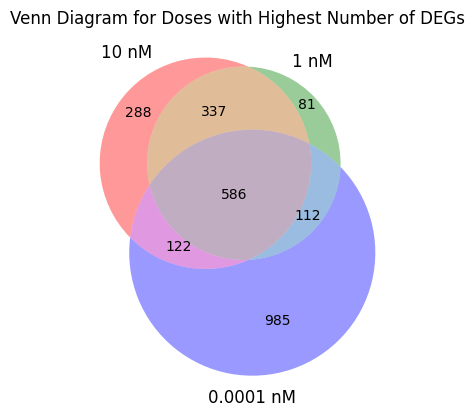

In [ ]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

venn3(
    [set(b['gene']), set(c['gene']), set(f['gene'])],
    set_labels=('10 nM', '1 nM', '0.0001 nM')
)
plt.title("Venn Diagram for Doses with Highest Number of DEGs")
plt.show()

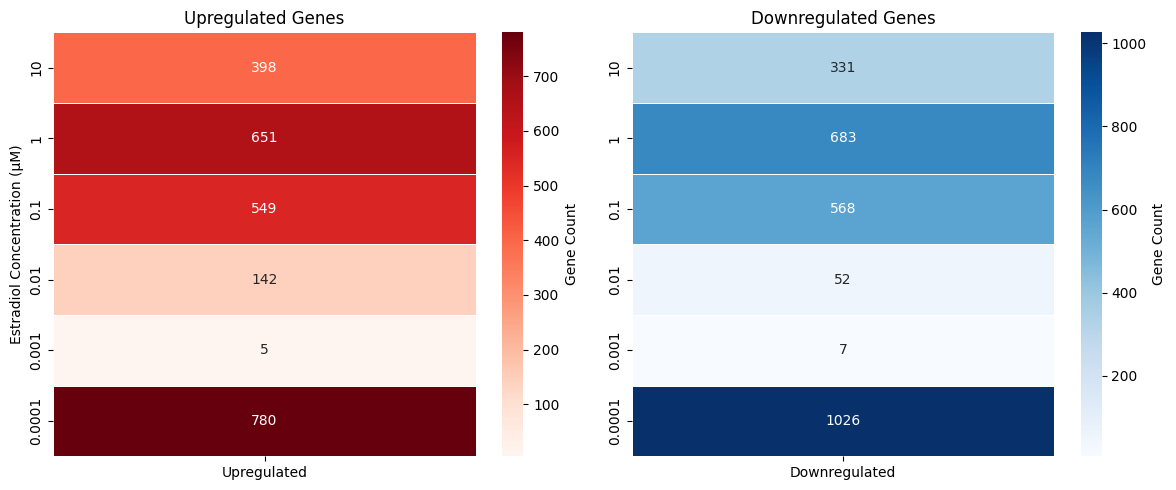

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.float_format", "{:.0f}".format)
data = {
    "Concentration (µM)": ["10", "1", "0.1", "0.01", "0.001", "0.0001"],
    "Upregulated": [398, 651, 549, 142, 5, 780],
    "Downregulated": [331, 683, 568, 52, 7, 1026]
}

df = pd.DataFrame(data)
df.set_index("Concentration (µM)", inplace=True)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(df[["Upregulated"]], ax=axes[0], annot=True, cmap="Reds",
            linewidths=0.5, cbar_kws={"label": "Gene Count"}, fmt='d')
axes[0].set_title("Upregulated Genes")
axes[0].set_xlabel("")
axes[0].set_ylabel("Estradiol Concentration (µM)")
sns.heatmap(df[["Downregulated"]], ax=axes[1], annot=True, cmap="Blues",
            linewidths=0.5, cbar_kws={"label": "Gene Count"}, fmt='d')
axes[1].set_title("Downregulated Genes")
axes[1].set_xlabel("")
axes[1].set_ylabel("")
plt.tight_layout()
plt.show()

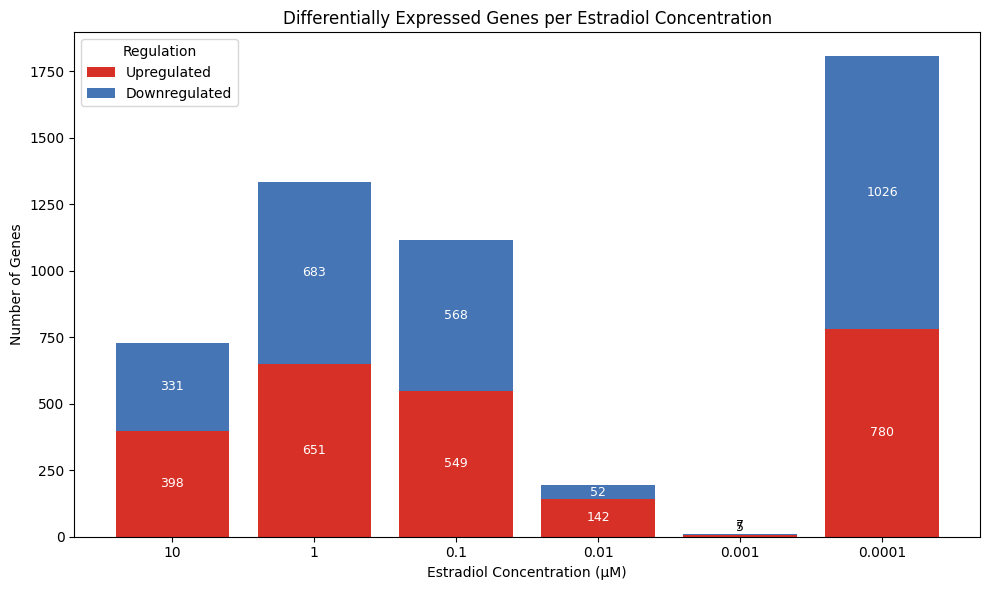

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Concentration (µM)": ["10", "1", "0.1", "0.01", "0.001", "0.0001"],
    "Upregulated": [398, 651, 549, 142, 5, 780],
    "Downregulated": [331, 683, 568, 52, 7, 1026]
}

df = pd.DataFrame(data)
df.set_index("Concentration (µM)", inplace=True)

fig, ax = plt.subplots(figsize=(10, 6))
bars_up = ax.bar(df.index, df["Upregulated"], label="Upregulated", color="#d73027")
bars_down = ax.bar(df.index, df["Downregulated"], bottom=df["Upregulated"], label="Downregulated", color="#4575b4")
for i in range(len(df)):
    up = df["Upregulated"].iloc[i]
    down = df["Downregulated"].iloc[i]
    total = up + down
    threshold = 20
    if up > threshold:
        ax.text(i, up / 2, str(up), ha='center', va='center', color='white', fontsize=9)
    else:
        ax.text(i, up + 5, str(up), ha='center', va='bottom', color='black', fontsize=9)
    if down > threshold:
        ax.text(i, up + down / 2, str(down), ha='center', va='center', color='white', fontsize=9)
    else:
        ax.text(i, up + down + 5, str(down), ha='center', va='bottom', color='black', fontsize=9)

ax.set_title("Differentially Expressed Genes per Estradiol Concentration")
ax.set_ylabel("Number of Genes")
ax.set_xlabel("Estradiol Concentration (µM)")
ax.legend(title="Regulation")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# UPDATE the values for the other chemicals !!!!!

<ipython-input-2-3f4ea9bbaf65>:52: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_up = annot_up.applymap(lambda x: 'N/A' if pd.isna(x) else f"{int(x)}")
<ipython-input-2-3f4ea9bbaf65>:53: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_down = annot_down.applymap(lambda x: 'N/A' if pd.isna(x) else f"{int(x)}")


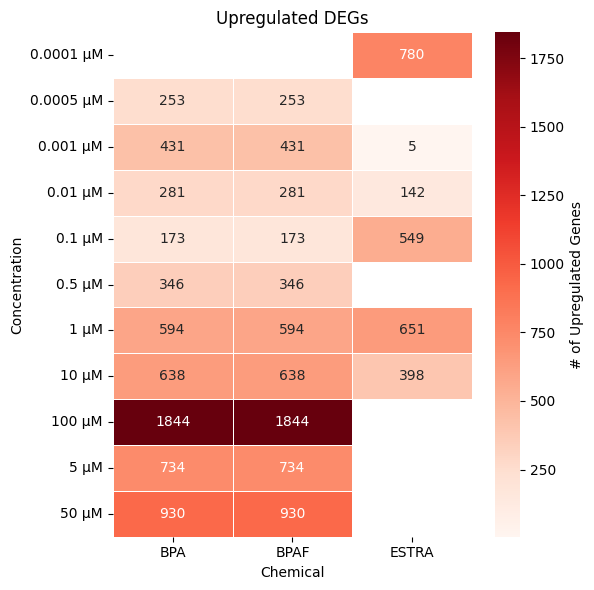

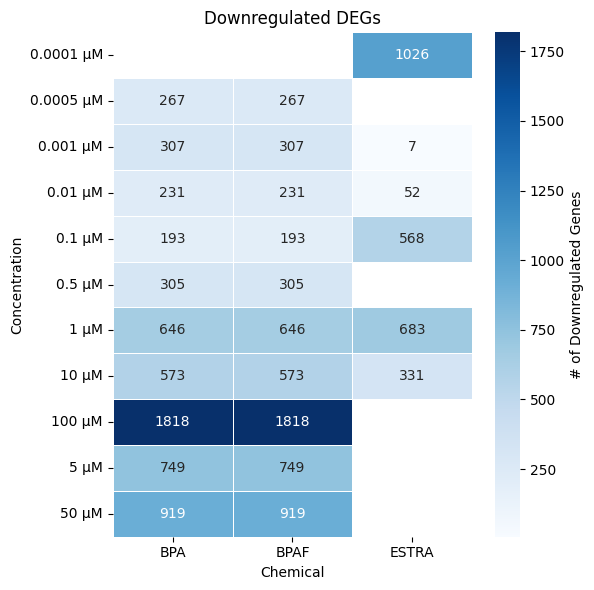

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = [
    ['ESTRA', '10 µM', 398, 331],
    ['ESTRA', '1 µM', 651, 683],
    ['ESTRA', '0.1 µM', 549, 568],
    ['ESTRA', '0.01 µM', 142, 52],
    ['ESTRA', '0.001 µM', 5, 7],
    ['ESTRA', '0.0001 µM', 780, 1026],

    ['BPA', '100 µM', 1844, 1818],
    ['BPA', '50 µM', 930, 919],
    ['BPA', '10 µM', 638, 573],
    ['BPA', '5 µM', 734, 749],
    ['BPA', '1 µM', 594, 646],
    ['BPA', '0.5 µM', 346, 305],
    ['BPA', '0.1 µM', 173, 193],
    ['BPA', '0.01 µM', 281, 231],
    ['BPA', '0.001 µM', 431, 307],
    ['BPA', '0.0005 µM', 253, 267],

    ['BPAF', '100 µM', 1844, 1818],
    ['BPAF', '50 µM', 930, 919],
    ['BPAF', '10 µM', 638, 573],
    ['BPAF', '5 µM', 734, 749],
    ['BPAF', '1 µM', 594, 646],
    ['BPAF', '0.5 µM', 346, 305],
    ['BPAF', '0.1 µM', 173, 193],
    ['BPAF', '0.01 µM', 281, 231],
    ['BPAF', '0.001 µM', 431, 307],
    ['BPAF', '0.0005 µM', 253, 267],

    ['BPAP', '100 µM', 1844, 1818],
    ['BPAP', '50 µM', 930, 919],
    ['BPAP', '10 µM', 638, 573],
    ['BPAP', '5 µM', 734, 749],
    ['BPAP', '1 µM', 594, 646],
    ['BPAP', '0.5 µM', 346, 305],
    ['BPAP', '0.1 µM', 173, 193],
    ['BPAP', '0.01 µM', 281, 231],
    ['BPAP', '0.001 µM', 431, 307],
    ['BPAP', '0.0005 µM', 253, 267],

    ['TGSA', '100 µM', 1844, 1818],
    ['TGSA', '50 µM', 930, 919],
    ['TGSA', '10 µM', 638, 573],
    ['TGSA', '5 µM', 734, 749],
    ['TGSA', '1 µM', 594, 646],
    ['TGSA', '0.5 µM', 346, 305],
    ['TGSA', '0.1 µM', 173, 193],
    ['TGSA', '0.01 µM', 281, 231],
    ['TGSA', '0.001 µM', 431, 307],
    ['TGSA', '0.0005 µM', 253, 267],

    ['BPC', '100 µM', 1844, 1818],
    ['BPC', '50 µM', 930, 919],
    ['BPC', '10 µM', 638, 573],
    ['BPC', '5 µM', 734, 749],
    ['BPC', '1 µM', 594, 646],
    ['BPC', '0.5 µM', 346, 305],
    ['BPC', '0.1 µM', 173, 193],
    ['BPC', '0.01 µM', 281, 231],
    ['BPC', '0.001 µM', 431, 307],
    ['BPC', '0.0005 µM', 253, 267],

]

df = pd.DataFrame(data, columns=['Chemical', 'Concentration', 'Upregulated', 'Downregulated'])
df['Conc_numeric'] = df['Concentration'].str.replace(' µM', '').astype(float)
df.sort_values(['Chemical', 'Conc_numeric'], ascending=[True, False], inplace=True)
heatmap_up = df.pivot(index='Concentration', columns='Chemical', values='Upregulated')
heatmap_down = df.pivot(index='Concentration', columns='Chemical', values='Downregulated')
annot_up = heatmap_up.copy()
annot_down = heatmap_down.copy()
annot_up = annot_up.applymap(lambda x: 'N/A' if pd.isna(x) else f"{int(x)}")
annot_down = annot_down.applymap(lambda x: 'N/A' if pd.isna(x) else f"{int(x)}")
plt.figure(figsize=(6, 6))
sns.heatmap(heatmap_up, annot=annot_up, fmt="", cmap="Reds", cbar_kws={'label': '# of Upregulated Genes'}, linewidths=0.5)
plt.title("Upregulated DEGs")
plt.xlabel("Chemical")
plt.ylabel("Concentration")
plt.tight_layout()
plt.show()
plt.figure(figsize=(6, 6))
sns.heatmap(heatmap_down, annot=annot_down, fmt="", cmap="Blues", cbar_kws={'label': '# of Downregulated Genes'}, linewidths=0.5)
plt.title("Downregulated DEGs")
plt.xlabel("Chemical")
plt.ylabel("Concentration")
plt.tight_layout()
plt.show()


CREATING A GRAPH FOR THE ESTROGEN BIOMARKER FOR THE ESTRADIOL TREATED SAMPLES

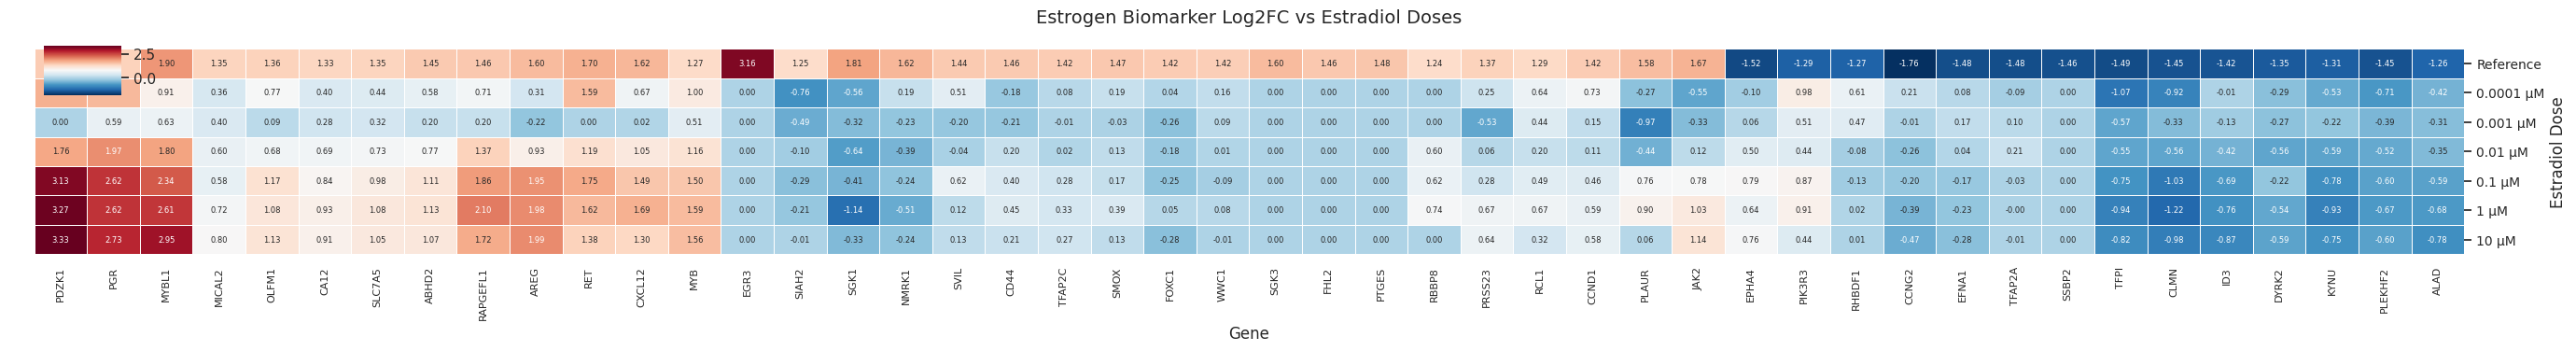

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("lfc_matrix.csv", index_col=0)
#df = df.sub(df.mean(axis=1), axis=0).div(df.std(axis=1), axis=0)

fig_width = df.shape[1] * 0.6  #
fig_height = df.shape[0] * 0.5  #
g = sns.clustermap(
    df,
    cmap="RdBu_r",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 6},
    linewidths=0.5,
    col_cluster=True,
    row_cluster=False,
    dendrogram_ratio=(0.01, 0.01),
    tree_kws={"linewidths": 0},
    figsize=(fig_width, fig_height),
    cbar_pos=(0.02, 0.8, 0.03, 0.15)
)

g.ax_heatmap.set_title("Estrogen Biomarker Log2FC vs Estradiol Doses", fontsize=14, pad=20)
g.ax_heatmap.set_xlabel("Gene", fontsize=12)
g.ax_heatmap.set_ylabel("Estradiol Dose", fontsize=12)

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=90, fontsize=8)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=10)

plt.savefig("heatmap_cleaned_up.png", dpi=300, bbox_inches="tight")
plt.show()

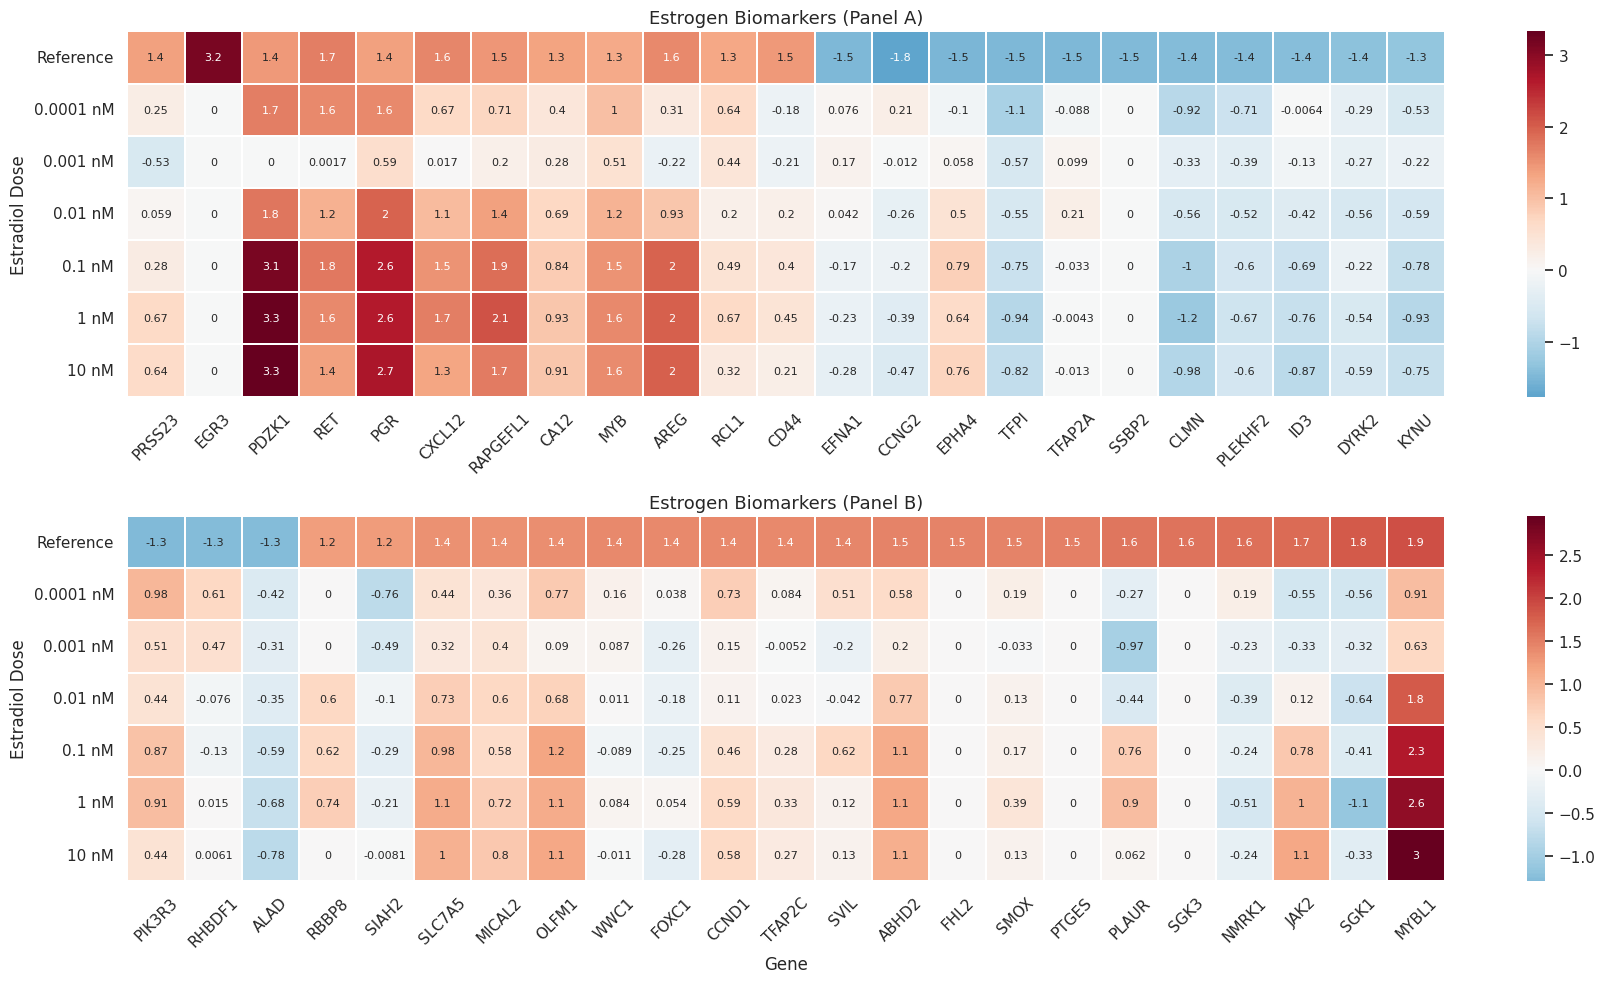

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("lfc_matrix.csv", index_col=0)

num_genes = df.shape[1]
mid = num_genes // 2
df_panelA = df.iloc[:, :mid]
df_panelB = df.iloc[:, mid:]

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 10), sharey=True)


sns.heatmap(df_panelA,
            ax=axes[0], annot=True, fmt=".2g", cmap="RdBu_r", center=0, linewidths=0.3,
            annot_kws={"size": 8})
axes[0].set_title("Estrogen Biomarkers (Panel A)", fontsize=13)
axes[0].set_ylabel("Estradiol Dose")
axes[0].tick_params(axis='x', labelrotation=45)


sns.heatmap(df_panelB,
            ax=axes[1], annot=True, fmt=".2g", cmap="RdBu_r", center=0, linewidths=0.3,
            annot_kws={"size": 8}, cbar=True)
axes[1].set_title("Estrogen Biomarkers (Panel B)", fontsize=13)
axes[1].set_ylabel("Estradiol Dose")
axes[1].set_xlabel("Gene")
axes[1].tick_params(axis='x', labelrotation=45)


plt.tight_layout()
plt.savefig("estrogen_biomarker_split_panels_all_genes.png", dpi=300)
plt.show()

In [ ]:
import pandas as pd

files = ["/content/sigGenes_Dex0.1.csv","/content/sigGenes_Dex1.csv", "/content/sigGenes_Dex10.csv", "/content/sigGenes_Dex100.csv", "/content/sigGenes_Dex1000.csv"]

dfs = []
for file in files:
    print(file)
    df_subset = pd.read_csv(file)
    dfs.append(df_subset)

a, b, c, d, e = dfs
a

/content/sigGenes_Dex0.1.csv
/content/sigGenes_Dex1.csv
/content/sigGenes_Dex10.csv
/content/sigGenes_Dex100.csv
/content/sigGenes_Dex1000.csv


Empty DataFrame
Columns: [gene, ensembl_id, stat, log2FoldChange]
Index: []

In [ ]:
gene_sets = [set(df['gene']) for df in [e,d,c]]
common_genes = set.intersection(*gene_sets)

print(f"Number of common genes: {len(common_genes)}")
print("Some common genes:", list(common_genes)[:10])

Number of common genes: 97
Some common genes: ['RPN1', 'TRIQK', 'JUN', 'ISCU', 'DSP', 'DDX39B', 'CALML5', 'CAB39L', 'IMPDH2', 'JUNB']


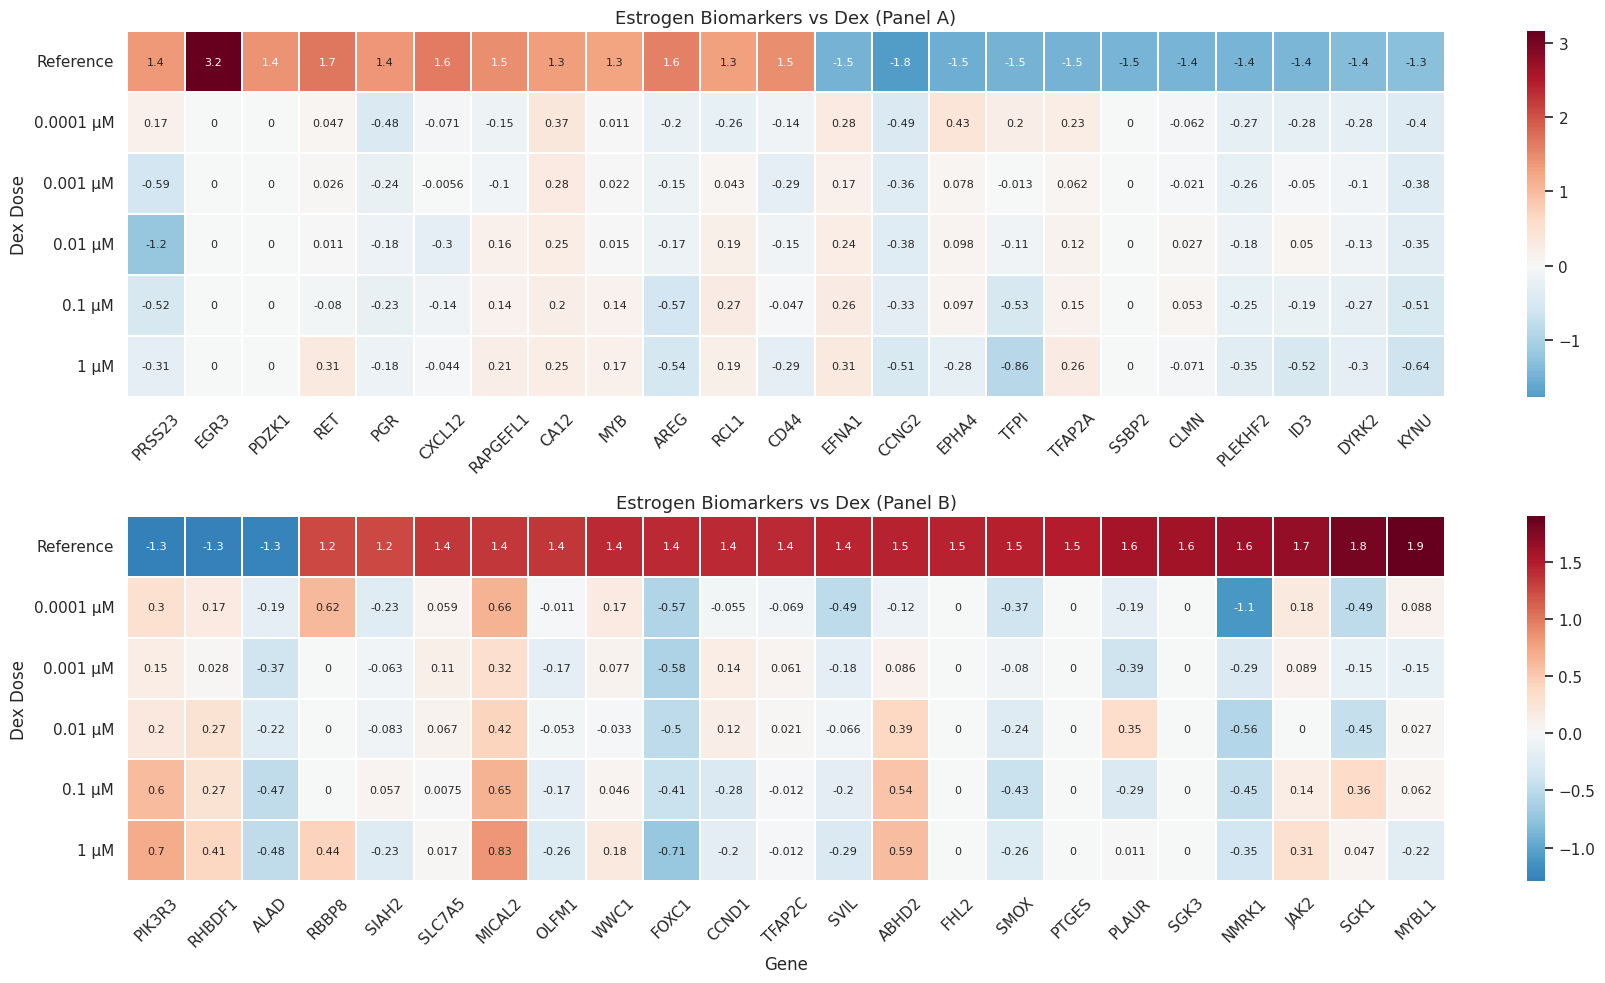

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Mat.csv", index_col=0)
num_genes = df.shape[1]
mid = num_genes // 2
df_panelA = df.iloc[:, :mid]
df_panelB = df.iloc[:, mid:]

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 10), sharey=True)

sns.heatmap(df_panelA,
            ax=axes[0], annot=True, fmt=".2g", cmap="RdBu_r", center=0, linewidths=0.3,
            annot_kws={"size": 8})
axes[0].set_title("Estrogen Biomarkers vs Dex (Panel A)", fontsize=13)
axes[0].set_ylabel("Dex Dose")
axes[0].tick_params(axis='x', labelrotation=45)

sns.heatmap(df_panelB,
            ax=axes[1], annot=True, fmt=".2g", cmap="RdBu_r", center=0, linewidths=0.3,
            annot_kws={"size": 8}, cbar=True)
axes[1].set_title("Estrogen Biomarkers vs Dex (Panel B)", fontsize=13)
axes[1].set_ylabel("Dex Dose")
axes[1].set_xlabel("Gene")
axes[1].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.savefig("estrogen_biomarker_split_panels_dex.png", dpi=300)
plt.show()

lets look at all the DEGs across all the chemicals:    
BPA    
BPA 100 no 1bg -> 3662 de genes 1844 1818    
BPA 50 no 1bg -> 1849 de genes 930 919    
BPA 10 no 1bg -> 1210 de genes 638 573    
BPA 5 no 1bg -> 1483 de genes 734 749    
BPA 1 no 1bg -> 1240 de genes 594 646    
BPA 0.5 no 1bg -> 651 de genes 346 305    
BPA 0.1 no 1bg -> 366 de genes 173 193    
BPA 0.01 no 1bg -> 512 de genes 281 231    
BPA 0.001 no 1bg -> 738 de genes 431 307    
BPA 0.0005 no 1bg -> 520 de genes 253 267    
BPS:    
BPS 100 no 1bg -> 761 de genes    
BPS 50 no 1bg -> 533 de genes    
BPS 10 no 1bg -> 539 de genes    
BPS 5 no 1bg -> 182 de genes    
BPS 1 no 1bg -> 256 de genes    
BPS 0.5 no 1bg -> 587 de genes    
BPS 0.1 no 1bg -> 43 de genes    
BPS 0.01 no 1bg -> 95 de genes    
BPS 0.001 no 1bg -> 183 de genes    
BPS 0.0005 no 1bg -> 7 de genes    
BPF:    
BPf 100 no 1bg -> 1012 de genes    
BPf 50 no 1bg -> 1141 de genes    
BPf 10 no 1bg -> 533 de genes    
BPf 5 no 1bg -> 513 de genes    
BPf 1 no 1bg -> 167 de genes    
BPf 0.5 no 1bg -> 154 de genes    
BPf 0.1 no 1bg -> 275 de genes    
BPf 0.01 no 1bg -> 0 de genes    
BPf 0.001 no 1bg -> 0 de genes    
BPf 0.0005 no 1bg -> 3 de genes    
BPAP:    
BPap 100 no 1bg -> 5123 de genes   
BPap 50 no 1bg -> 2229 de genes   
BPap 10 no 1bg -> 848 de genes   
BPap 5 no 1bg -> 901 de genes   
BPap 1 no 1bg -> 842 de genes   
BPap 0.5 no 1bg -> 894 de genes   
BPap 0.1 no 1bg -> 503 de genes   
BPap 0.01 no 1bg -> 378 de genes   
BPap 0.001 no 1bg -> 674 de genes   
BPap 0.0005 no 1bg -> 516 de genes    
BADGE    
BADGE 100 no 1bg -> 3965 de genes    
BADGE 50 no 1bg -> 133 de genes    
BADGE 10 no 1bg -> 251 de genes       
BADGE 5 no 1bg -> 260 de genes       
BADGE 1 no 1bg -> 77 de genes   
BADGE 0.5 no 1bg -> 113 de genes   
BADGE 0.1 no 1bg -> 124 de genes   
BADGE 0.01 no 1bg -> 195 de genes   
BADGE 0.001 no 1bg -> 135 de genes       
BADGE 0.0005 no 1bg -> 516 de genes     
Sulfone    
Sulfone 100 no 1bg -> 317 de genes   
Sulfone 50 no 1bg -> 583 de genes   
Sulfone 10 no 1bg -> 556 de genes   
Sulfone 5 no 1bg -> 472 de genes   
Sulfone 1 no 1bg -> 20 de genes   
Sulfone 0.5 no 1bg -> 545 de genes   
Sulfone 0.1 no 1bg -> 490 de genes   
Sulfone 0.01 no 1bg -> 277 de genes   
Sulfone 0.001 no 1bg -> 406 de genes   
Sulfone 0.0005 no 1bg -> 522 de genes   
BPAF          
BPAF 100 no 1bg -> 5473 de genes          
BPAF 50 no 1bg -> 1760 de genes          
BPAF 10 no 1bg -> 1244 de genes       
BPAF 5 no 1bg -> 1109 de genes       
BPAF 1 no 1bg -> 390 de genes       
BPAF 0.5 no 1bg -> 750 de genes       
BPAF 0.1 no 1bg -> 576 de genes       
BPAF 0.01 no 1bg -> 368 de genes       
BPAF 0.001 no 1bg -> 213 de genes       
BPAF 0.0005 no 1bg -> 456 de genes       
BPS-MAE   
BPS-MAE 100 no 1bg -> 3057 de genes   
BPS-MAE 50 no 1bg -> 1338 de genes   
BPS-MAE 10 no 1bg -> 392 de genes   
BPS-MAE 5 no 1bg -> 0 de genes   
BPS-MAE 1 no 1bg -> 38 de genes    
BPS-MAE 0.5 no 1bg -> 695 de genes    
BPS-MAE 0.1 no 1bg -> 2 de genes   
BPS-MAE 0.01 no 1bg -> 334 de genes   
BPS-MAE 0.001 no 1bg -> 50 de genes   
BPS-MAE 0.0005 no 1bg -> 1 de genes   
BTUM     
BTUM 100 no 1bg -> 95 de genes   
BTUM 50 no 1bg -> 751 de genes   
BTUM 10 no 1bg -> 410 de genes   
BTUM 5 no 1bg -> 251 de genes   
BTUM 1 no 1bg -> 252 de genes   
BTUM 0.5 no 1bg -> 471 de genes    
BTUM 0.1 no 1bg -> 273 de genes   
BTUM 0.01 no 1bg -> 319 de genes   
BTUM 0.001 no 1bg -> 369 de genes   
BTUM 0.0005 no 1bg -> 195 de genes   
D8     
D8 100 no 1bg -> 3799 de genes     
D8 50 no 1bg -> 2716 de genes     
D8 10 no 1bg -> 365 de genes     
D8 5 no 1bg -> 57 de genes     
D8 1 no 1bg -> 252 de genes     
D8 0.5 no 1bg -> 36 de genes      
D8 0.1 no 1bg -> 58 de genes     
D8 0.01 no 1bg -> 55 de genes     
D8 0.001 no 1bg -> 5 de genes     
D8 0.0005 no 1bg -> 0 de genes     
Pergafast     
Pergafast 100 no 1bg -> 710 de genes     
Pergafast 50 no 1bg -> 407 de genes     
Pergafast 10 no 1bg -> 404 de genes     
Pergafast 5 no 1bg -> 15 de genes     
Pergafast 1 no 1bg -> 34 de genes     
Pergafast 0.5 no 1bg -> 286 de genes      
Pergafast 0.1 no 1bg -> 112 de genes     
Pergafast 0.01 no 1bg -> 30 de genes     
Pergafast 0.001 no 1bg -> 255 de genes     
Pergafast 0.0005 no 1bg -> 0 de genes     
24bps     
24bps 100 no 1bg -> 832 de genes     
24bps 50 no 1bg -> 517 de genes     
24bps 10 no 1bg -> 178 de genes     
24bps 5 no 1bg -> 115 de genes     
24bps 1 no 1bg -> 75 de genes     
24bps 0.5 no 1bg -> 90 de genes           
24bps 0.1 no 1bg -> 104 de genes          
24bps 0.01 no 1bg -> 464 de genes          
24bps 0.001 no 1bg -> 33 de genes     
24bps 0.0005 no 1bg -> 109  de genes     
TGSA     
TGSA 100 no 1bg -> 4728 de genes     
TGSA 50 no 1bg -> 2404 de genes     
TGSA 10 no 1bg -> 482 de genes     
TGSA 5 no 1bg -> 217 de genes     
TGSA 1 no 1bg -> 318 de genes     
TGSA 0.5 no 1bg -> 234 de genes           
TGSA 0.1 no 1bg -> 112 de genes     
TGSA 0.01 no 1bg -> 30 de genes     
TGSA 0.001 no 1bg -> 644 de genes     
TGSA 0.0005 no 1bg -> 199 de genes
BPC    
BPC 100 no 1bg -> 4860 de genes    
BPC 50 no 1bg -> 2368 de genes    
BPC 10 no 1bg -> 1547 de genes    
BPC 5 no 1bg -> 855 de genes    
BPC 1 no 1bg -> 550 de genes    
BPC 0.5 no 1bg -> 1117 de genes     
BPC 0.1 no 1bg -> 480 de genes        
BPC 0.01 no 1bg -> 236 de genes    
BPC 0.001 no 1bg -> 609 de genes    
BPC 0.0005 no 1bg -> 576  de genes    
BPFanalog    
BPFanalog 100 no 1bg -> 834 de genes    
BPFanalog 50 no 1bg -> 788 de genes    
BPFanalog 10 no 1bg -> 563 de genes    
BPFanalog 5 no 1bg -> 334 de genes    
BPFanalog 1 no 1bg -> 115 de genes    
BPFanalog 0.5 no 1bg -> 115 de genes     
BPFanalog 0.1 no 1bg -> 339 de genes    
BPFanalog 0.01 no 1bg -> 447 de genes    
BPFanalog 0.001 no 1bg -> 580 de genes    
BPFanalog 0.0005 no 1bg -> 0  de genes     
BPsMPE     
BPsMPE 100 no 1bg -> 3538 de genes    
BPsMPE 50 no 1bg -> 2999 de genes    
BPsMPE 10 no 1bg -> 222 de genes    
BPsMPE 5 no 1bg -> 108 de genes    
BPsMPE 1 no 1bg -> 283 de genes    
BPsMPE 0.5 no 1bg -> 520 de genes     
BPsMPE 0.1 no 1bg -> 290 de genes    
BPsMPE 0.01 no 1bg -> 395 de genes    
BPsMPE 0.001 no 1bg -> 167 de genes    
BPsMPE 0.0005 no 1bg -> 205  de genes        





In [ ]:
a = [a.strip() for a in open("/content/allBPA_BPS.txt").readlines()]

['BPA',
 'BPA 100 no 1bg -> 3662 de genes 1844 1818',
 'BPA 50 no 1bg -> 1849 de genes 930 919',
 'BPA 10 no 1bg -> 1210 de genes 638 573',
 'BPA 5 no 1bg -> 1483 de genes 734 749',
 'BPA 1 no 1bg -> 1240 de genes 594 646',
 'BPA 0.5 no 1bg -> 651 de genes 346 305',
 'BPA 0.1 no 1bg -> 366 de genes 173 193',
 'BPA 0.01 no 1bg -> 512 de genes 281 231',
 'BPA 0.001 no 1bg -> 738 de genes 431 307',
 'BPA 0.0005 no 1bg -> 520 de genes 253 267',
 'BPS:',
 'BPS 100 no 1bg -> 761 de genes',
 'BPS 50 no 1bg -> 533 de genes',
 'BPS 10 no 1bg -> 539 de genes',
 'BPS 5 no 1bg -> 182 de genes',
 'BPS 1 no 1bg -> 256 de genes',
 'BPS 0.5 no 1bg -> 587 de genes',
 'BPS 0.1 no 1bg -> 43 de genes',
 'BPS 0.01 no 1bg -> 95 de genes',
 'BPS 0.001 no 1bg -> 183 de genes',
 'BPS 0.0005 no 1bg -> 7 de genes',
 'BPF:',
 'BPf 100 no 1bg -> 1012 de genes',
 'BPf 50 no 1bg -> 1141 de genes',
 'BPf 10 no 1bg -> 533 de genes',
 'BPf 5 no 1bg -> 513 de genes',
 'BPf 1 no 1bg -> 167 de genes',
 'BPf 0.5 no 1bg -> 

In [ ]:
df.chemical.unique()

array(['BPA', 'BPS', 'BPF', 'BPAP', 'BADGE', 'Sulfone', 'BPAF', 'BPS-MAE',
       'BTUM', 'Pergafast', 'TGSA', 'BPC', 'BPFanalog', 'BPsMPE'],
      dtype=object)

In [ ]:
data = '''BPA
BPA 100 no 1bg -> 3662 de genes 1844 1818
BPA 50 no 1bg -> 1849 de genes 930 919
BPA 10 no 1bg -> 1210 de genes 638 573
BPA 5 no 1bg -> 1483 de genes 734 749
BPA 1 no 1bg -> 1240 de genes 594 646
BPA 0.5 no 1bg -> 651 de genes 346 305
BPA 0.1 no 1bg -> 366 de genes 173 193
BPA 0.01 no 1bg -> 512 de genes 281 231
BPA 0.001 no 1bg -> 738 de genes 431 307
BPA 0.0005 no 1bg -> 520 de genes 253 267
BPS:
BPS 100 no 1bg -> 761 de genes
BPS 50 no 1bg -> 533 de genes
BPS 10 no 1bg -> 539 de genes
BPS 5 no 1bg -> 182 de genes
BPS 1 no 1bg -> 256 de genes
BPS 0.5 no 1bg -> 587 de genes
BPS 0.1 no 1bg -> 43 de genes
BPS 0.01 no 1bg -> 95 de genes
BPS 0.001 no 1bg -> 183 de genes
BPS 0.0005 no 1bg -> 7 de genes
BPF:
BPf 100 no 1bg -> 1012 de genes
BPf 50 no 1bg -> 1141 de genes
BPf 10 no 1bg -> 533 de genes
BPf 5 no 1bg -> 513 de genes
BPf 1 no 1bg -> 167 de genes
BPf 0.5 no 1bg -> 154 de genes
BPf 0.1 no 1bg -> 275 de genes
BPf 0.01 no 1bg -> 0 de genes
BPf 0.001 no 1bg -> 0 de genes
BPf 0.0005 no 1bg -> 3 de genes
BPAP:
BPap 100 no 1bg -> 5123 de genes
BPap 50 no 1bg -> 2229 de genes
BPap 10 no 1bg -> 848 de genes
BPap 5 no 1bg -> 901 de genes
BPap 1 no 1bg -> 842 de genes
BPap 0.5 no 1bg -> 894 de genes
BPap 0.1 no 1bg -> 503 de genes
BPap 0.01 no 1bg -> 378 de genes
BPap 0.001 no 1bg -> 674 de genes
BPap 0.0005 no 1bg -> 516 de genes
BADGE
BADGE 100 no 1bg -> 3965 de genes
BADGE 50 no 1bg -> 133 de genes
BADGE 10 no 1bg -> 251 de genes
BADGE 5 no 1bg -> 260 de genes
BADGE 1 no 1bg -> 77 de genes
BADGE 0.5 no 1bg -> 113 de genes
BADGE 0.1 no 1bg -> 124 de genes
BADGE 0.01 no 1bg -> 195 de genes
BADGE 0.001 no 1bg -> 135 de genes
BADGE 0.0005 no 1bg -> 516 de genes
Sulfone
Sulfone 100 no 1bg -> 317 de genes
Sulfone 50 no 1bg -> 583 de genes
Sulfone 10 no 1bg -> 556 de genes
Sulfone 5 no 1bg -> 472 de genes
Sulfone 1 no 1bg -> 20 de genes
Sulfone 0.5 no 1bg -> 545 de genes
Sulfone 0.1 no 1bg -> 490 de genes
Sulfone 0.01 no 1bg -> 277 de genes
Sulfone 0.001 no 1bg -> 406 de genes
Sulfone 0.0005 no 1bg -> 522 de genes
BPAF
BPAF 100 no 1bg -> 5473 de genes
BPAF 50 no 1bg -> 1760 de genes
BPAF 10 no 1bg -> 1244 de genes
BPAF 5 no 1bg -> 1109 de genes
BPAF 1 no 1bg -> 390 de genes
BPAF 0.5 no 1bg -> 750 de genes
BPAF 0.1 no 1bg -> 576 de genes
BPAF 0.01 no 1bg -> 368 de genes
BPAF 0.001 no 1bg -> 213 de genes
BPAF 0.0005 no 1bg -> 456 de genes
BPS-MAE
BPS-MAE 100 no 1bg -> 3057 de genes
BPS-MAE 50 no 1bg -> 1338 de genes
BPS-MAE 10 no 1bg -> 392 de genes
BPS-MAE 5 no 1bg -> 0 de genes
BPS-MAE 1 no 1bg -> 38 de genes
BPS-MAE 0.5 no 1bg -> 695 de genes
BPS-MAE 0.1 no 1bg -> 2 de genes
BPS-MAE 0.01 no 1bg -> 334 de genes
BPS-MAE 0.001 no 1bg -> 50 de genes
BPS-MAE 0.0005 no 1bg -> 1 de genes
BTUM
BTUM 100 no 1bg -> 95 de genes
BTUM 50 no 1bg -> 751 de genes
BTUM 10 no 1bg -> 410 de genes
BTUM 5 no 1bg -> 251 de genes
BTUM 1 no 1bg -> 252 de genes
BTUM 0.5 no 1bg -> 471 de genes
BTUM 0.1 no 1bg -> 273 de genes
BTUM 0.01 no 1bg -> 319 de genes
BTUM 0.001 no 1bg -> 369 de genes
BTUM 0.0005 no 1bg -> 195 de genes
D8
D8 100 no 1bg -> 3799 de genes
D8 50 no 1bg -> 2716 de genes
D8 10 no 1bg -> 365 de genes
D8 5 no 1bg -> 57 de genes
D8 1 no 1bg -> 252 de genes
D8 0.5 no 1bg -> 36 de genes
D8 0.1 no 1bg -> 58 de genes
D8 0.01 no 1bg -> 55 de genes
D8 0.001 no 1bg -> 5 de genes
D8 0.0005 no 1bg -> 0 de genes
Pergafast
Pergafast 100 no 1bg -> 710 de genes
Pergafast 50 no 1bg -> 407 de genes
Pergafast 10 no 1bg -> 404 de genes
Pergafast 5 no 1bg -> 15 de genes
Pergafast 1 no 1bg -> 34 de genes
Pergafast 0.5 no 1bg -> 286 de genes
Pergafast 0.1 no 1bg -> 112 de genes
Pergafast 0.01 no 1bg -> 30 de genes
Pergafast 0.001 no 1bg -> 255 de genes
Pergafast 0.0005 no 1bg -> 0 de genes
24bps
24bps 100 no 1bg -> 832 de genes
24bps 50 no 1bg -> 517 de genes
24bps 10 no 1bg -> 178 de genes
24bps 5 no 1bg -> 115 de genes
24bps 1 no 1bg -> 75 de genes
24bps 0.5 no 1bg -> 90 de genes
24bps 0.1 no 1bg -> 104 de genes
24bps 0.01 no 1bg -> 464 de genes
24bps 0.001 no 1bg -> 33 de genes
24bps 0.0005 no 1bg -> 109 de genes
TGSA
TGSA 100 no 1bg -> 4728 de genes
TGSA 50 no 1bg -> 2404 de genes
TGSA 10 no 1bg -> 482 de genes
TGSA 5 no 1bg -> 217 de genes
TGSA 1 no 1bg -> 318 de genes
TGSA 0.5 no 1bg -> 234 de genes
TGSA 0.1 no 1bg -> 112 de genes
TGSA 0.01 no 1bg -> 30 de genes
TGSA 0.001 no 1bg -> 644 de genes
TGSA 0.0005 no 1bg -> 199 de genes
BPC
BPC 100 no 1bg -> 4860 de genes
BPC 50 no 1bg -> 2368 de genes
BPC 10 no 1bg -> 1547 de genes
BPC 5 no 1bg -> 855 de genes
BPC 1 no 1bg -> 550 de genes
BPC 0.5 no 1bg -> 1117 de genes
BPC 0.1 no 1bg -> 480 de genes
BPC 0.01 no 1bg -> 236 de genes
BPC 0.001 no 1bg -> 609 de genes
BPC 0.0005 no 1bg -> 576 de genes
BPFanalog
BPFanalog 100 no 1bg -> 834 de genes
BPFanalog 50 no 1bg -> 788 de genes
BPFanalog 10 no 1bg -> 563 de genes
BPFanalog 5 no 1bg -> 334 de genes
BPFanalog 1 no 1bg -> 115 de genes
BPFanalog 0.5 no 1bg -> 115 de genes
BPFanalog 0.1 no 1bg -> 339 de genes
BPFanalog 0.01 no 1bg -> 447 de genes
BPFanalog 0.001 no 1bg -> 580 de genes
BPFanalog 0.0005 no 1bg -> 0 de genes
BPsMPE
BPsMPE 100 no 1bg -> 3538 de genes
BPsMPE 50 no 1bg -> 2999 de genes
BPsMPE 10 no 1bg -> 222 de genes
BPsMPE 5 no 1bg -> 108 de genes
BPsMPE 1 no 1bg -> 283 de genes
BPsMPE 0.5 no 1bg -> 520 de genes
BPsMPE 0.1 no 1bg -> 290 de genes
BPsMPE 0.01 no 1bg -> 395 de genes
BPsMPE 0.001 no 1bg -> 167 de genes
BPsMPE 0.0005 no 1bg -> 205 de genes'''

In [ ]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
lines = data.strip().split('\n')

records = []
i = 0
while i < len(lines):
    chem_name = lines[i].strip().replace(':', '')
    for j in range(1, 11):
        line = lines[i + j]
        match = re.match(r'[A-Za-z0-9\-]+ ([\d\.]+) no 1bg -> (\d+)', line)
        if match:
            conc, count = match.groups()
            records.append({
                'chemical': chem_name,
                'concentration': float(conc),
                'count': int(count)
            })
    i += 11

df = pd.DataFrame(records)

print(f"Parsed {df['chemical'].nunique()} chemicals")

Parsed 16 chemicals


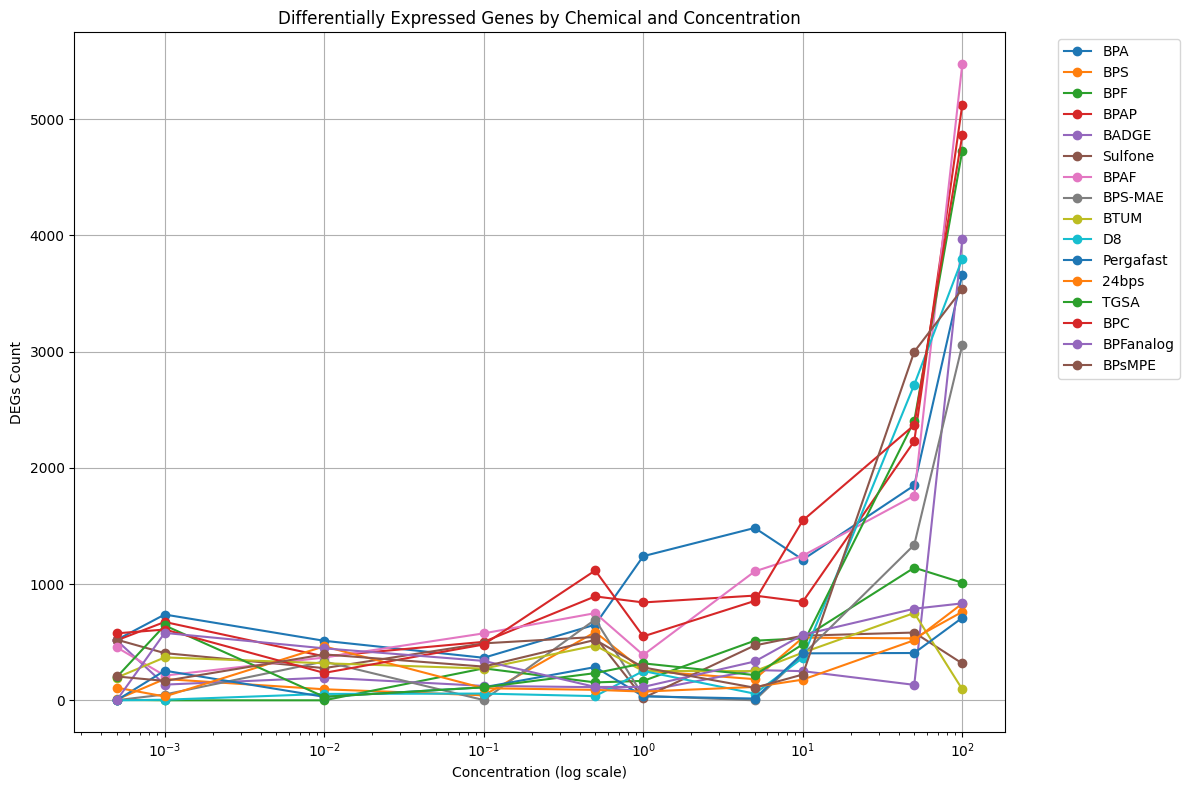

In [ ]:
plt.figure(figsize=(12, 8))
for chem in df['chemical'].unique():
    subset = df[df['chemical'] == chem].sort_values(by='concentration', ascending=False)
    plt.plot(subset['concentration'], subset['count'], marker='o', label=chem)

plt.xscale('log') #-> to make them spread out nicely
plt.xlabel('Concentration (log scale)')
plt.ylabel('DEGs Count')
plt.title('Differentially Expressed Genes by Chemical and Concentration')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

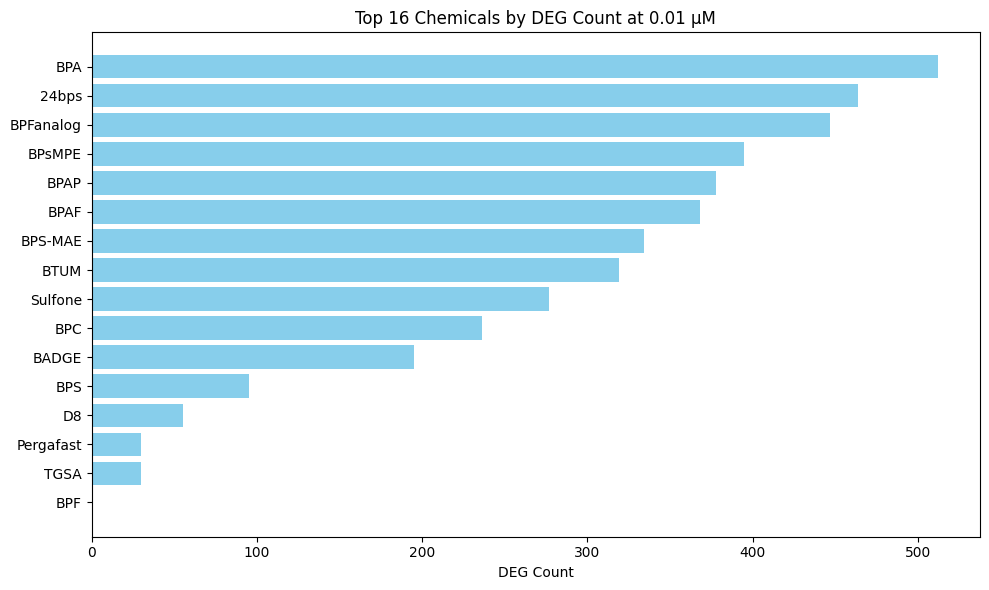

In [ ]:
top_conc = 0.01
subset = df[df['concentration'] == top_conc].sort_values(by='count', ascending=False)

top_n = 16
subset_top = subset.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(subset_top['chemical'], subset_top['count'], color='skyblue')
plt.xlabel('DEG Count')
plt.title(f'Top {top_n} Chemicals by DEG Count at {top_conc} µM')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

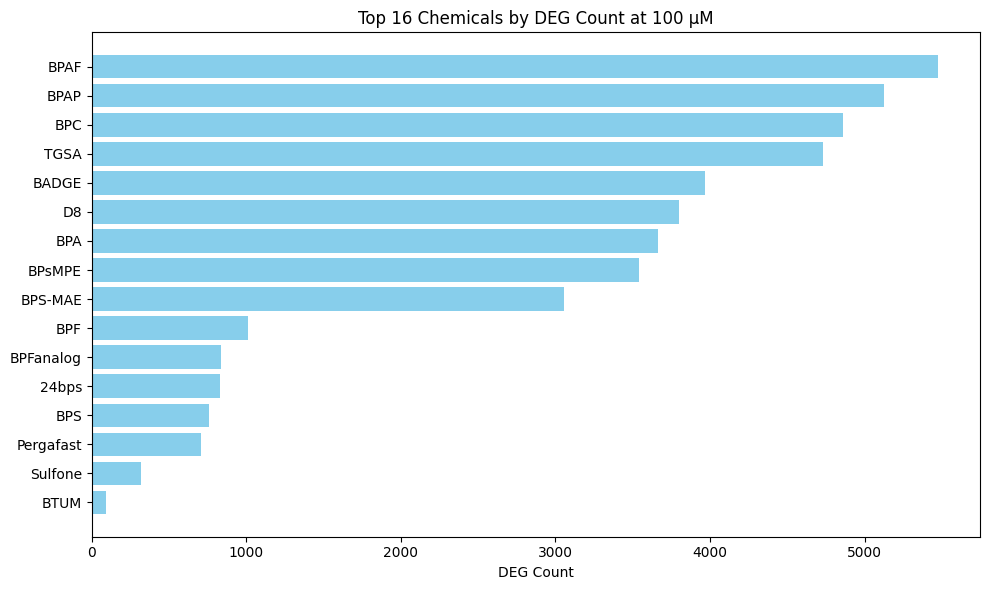

In [ ]:
top_conc = 100
subset = df[df['concentration'] == top_conc].sort_values(by='count', ascending=False)
top_n = 16
subset_top = subset.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(subset_top['chemical'], subset_top['count'], color='skyblue')
plt.xlabel('DEG Count')
plt.title(f'Top {top_n} Chemicals by DEG Count at {top_conc} µM')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

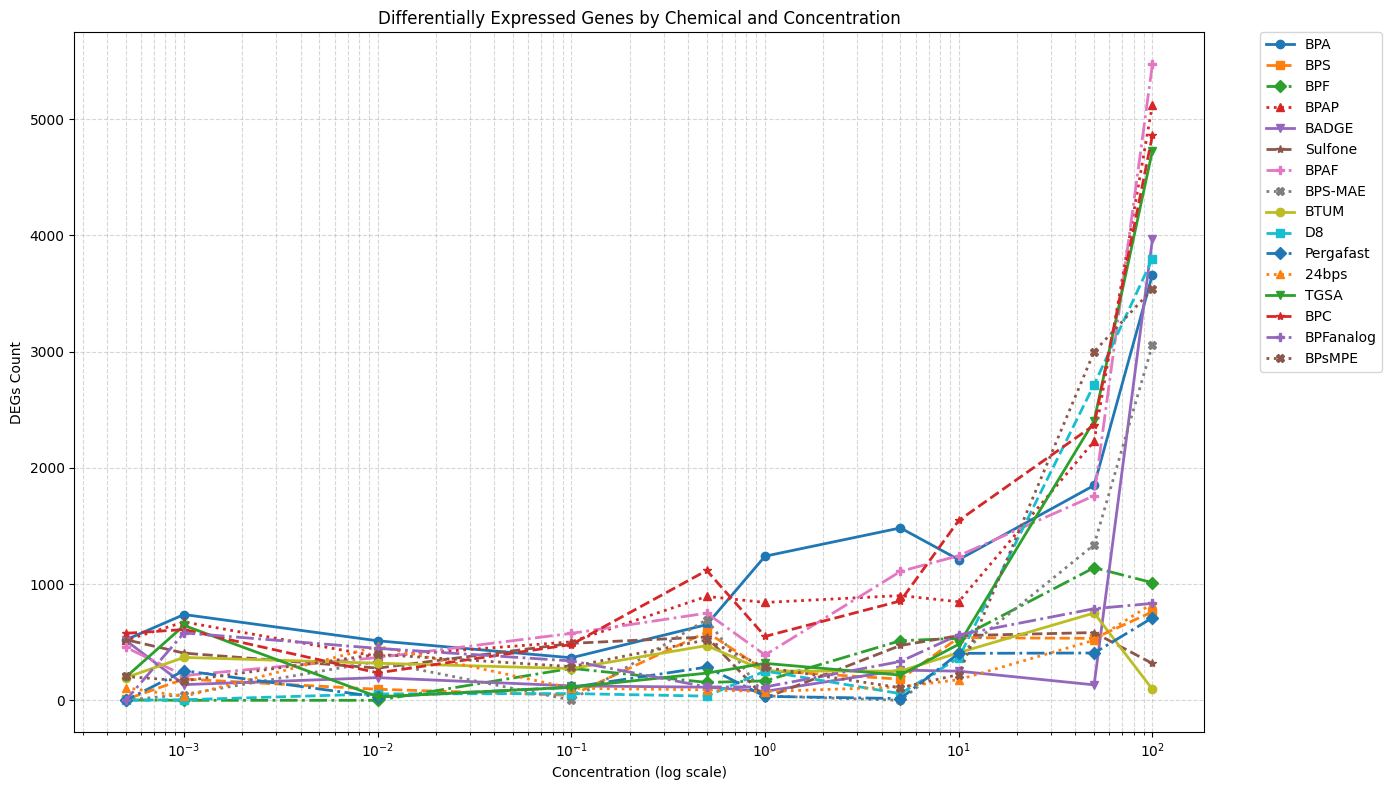

In [ ]:
import matplotlib.pyplot as plt
import itertools

plt.figure(figsize=(14, 8))
markers = itertools.cycle(('o', 's', 'D', '^', 'v', '*', 'P', 'X'))
linestyles = itertools.cycle(('-', '--', '-.', ':'))

for chem in df['chemical'].unique():
    subset = df[df['chemical'] == chem].sort_values(by='concentration', ascending=False)
    plt.plot(subset['concentration'], subset['count'],
             marker=next(markers),
             linestyle=next(linestyles),
             label=chem,
             linewidth=2)

plt.xscale('log')
plt.xlabel('Concentration (log scale)')
plt.ylabel('DEGs Count')
plt.title('Differentially Expressed Genes by Chemical and Concentration')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

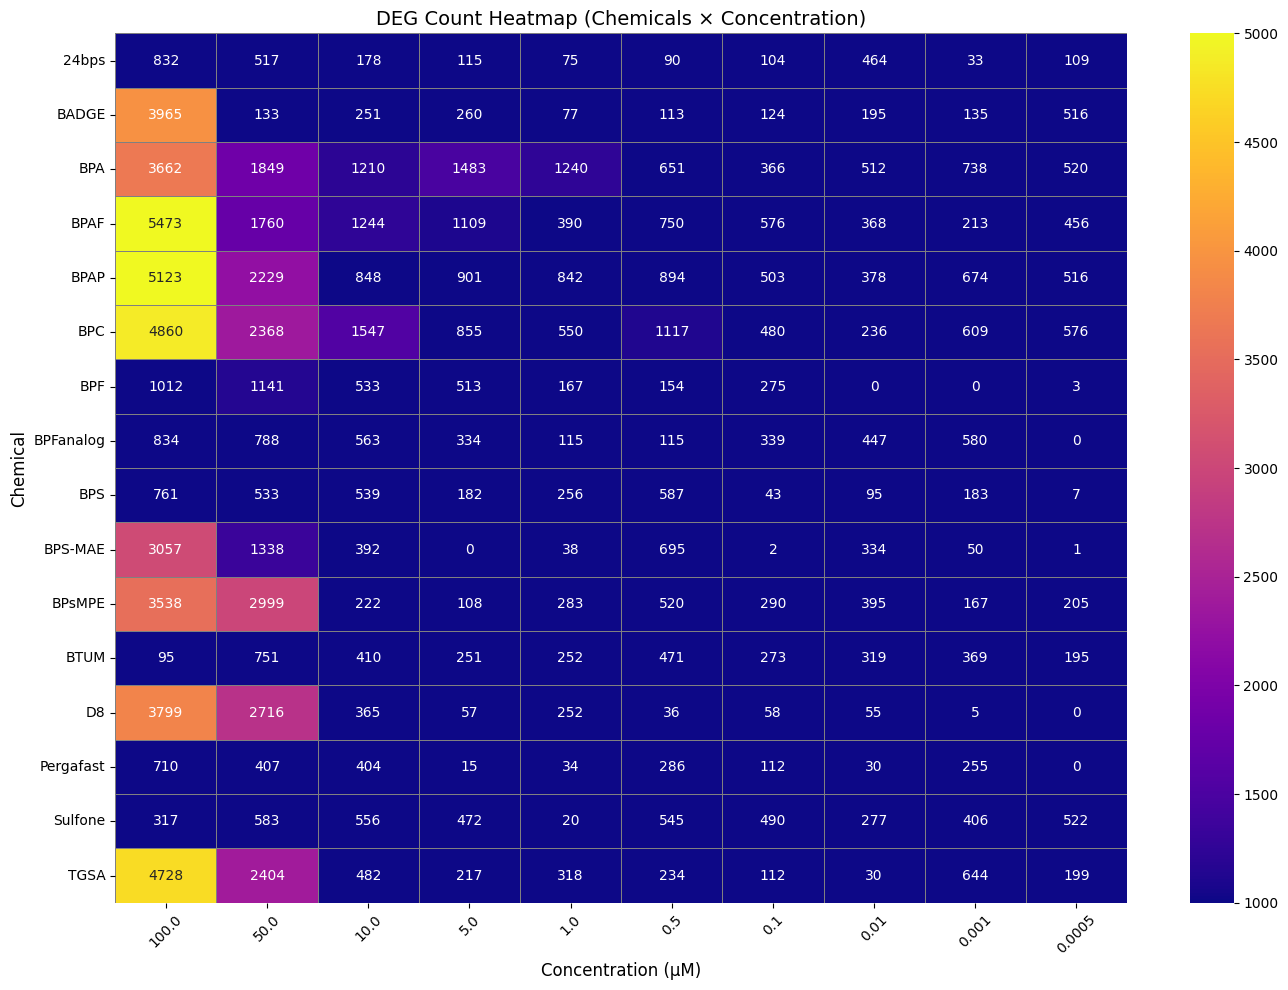

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

pivot_df = df.pivot_table(index='chemical', columns='concentration', values='count', aggfunc='mean')

pivot_df = pivot_df[sorted(pivot_df.columns, reverse=True)]

norm = Normalize(vmin=1000, vmax=5000)

plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_df,
    cmap="plasma",
    norm=norm,
    annot=True,
    fmt=".0f",
    linewidths=0.5,
    linecolor='gray'
)

plt.title('DEG Count Heatmap (Chemicals × Concentration)', fontsize=14)
plt.xlabel('Concentration (µM)', fontsize=12)
plt.ylabel('Chemical', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df["concentration2"] =df['concentration'].astype(str)

chemical  concentration  count concentration2
0        BPA       100.0000   3662          100.0
1        BPA        50.0000   1849           50.0
2        BPA        10.0000   1210           10.0
3        BPA         5.0000   1483            5.0
4        BPA         1.0000   1240            1.0
..       ...            ...    ...            ...
155  BPS-MPE         0.5000    520            0.5
156  BPS-MPE         0.1000    290            0.1
157  BPS-MPE         0.0100    395           0.01
158  BPS-MPE         0.0010    167          0.001
159  BPS-MPE         0.0005    205         0.0005

[160 rows x 4 columns]

In [ ]:
df=df.replace("BPsMPE", "BPS-MPE")
df=df.replace("BPFanalog", "2,4-BPF")
df=df.replace("Sulfone", "DCDPS")
df=df.replace("24bps", "2,4-BPF")
df=df.replace("BPF", "4,4-BPF")
df=df.replace("0.0005", ".0005")
df=df.replace("0.001", ".001")

<ipython-input-8-83744da53bd0>:2: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_data = df.groupby('chemical').apply(lambda g: trapz(y=g.sort_values('concentration')['count'],
<ipython-input-8-83744da53bd0>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  auc_data = df.groupby('chemical').apply(lambda g: trapz(y=g.sort_values('concentration')['count'],


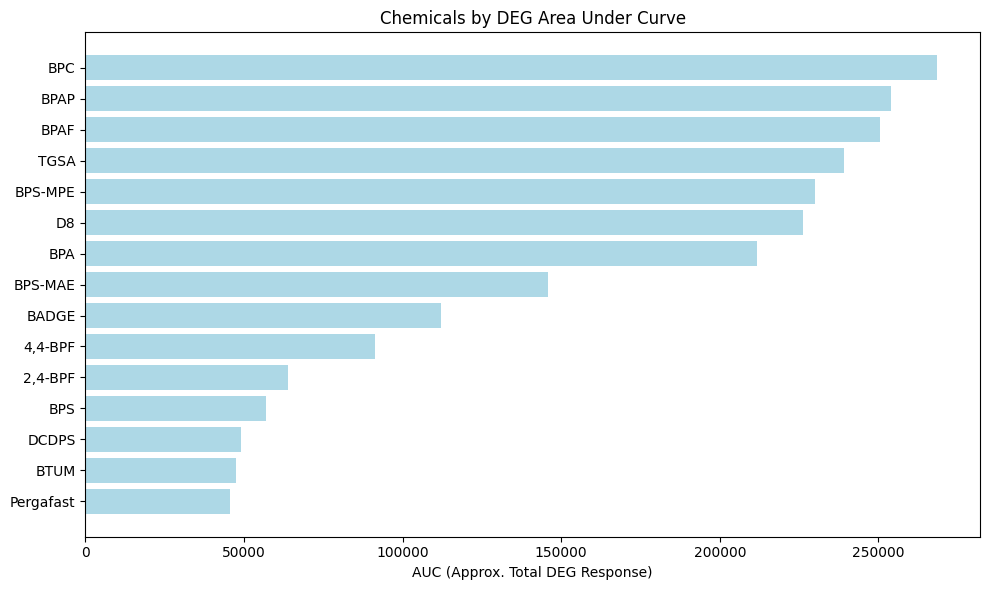

In [ ]:
from numpy import trapz
auc_data = df.groupby('chemical').apply(lambda g: trapz(y=g.sort_values('concentration')['count'],
                                                        x=g.sort_values('concentration')['concentration']))
auc_df = auc_data.reset_index(name='AUC')
top_auc = auc_df.sort_values('AUC', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(top_auc['chemical'], top_auc['AUC'], color='lightblue')
plt.xlabel('AUC (Approx. Total DEG Response)')
plt.title('Chemicals by DEG Area Under Curve')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

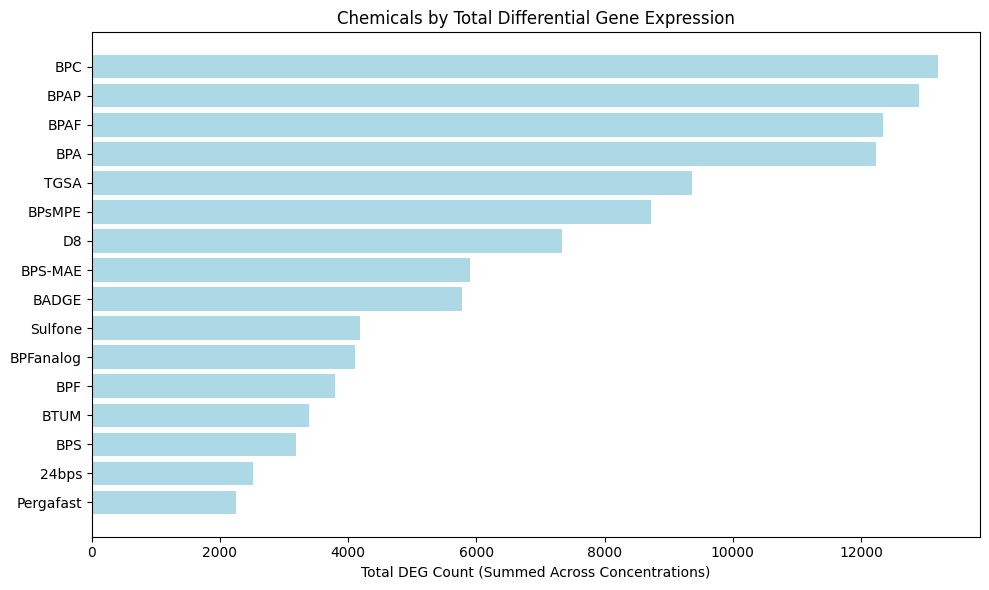

In [ ]:
sum_data = df.groupby('chemical')['count'].sum().reset_index(name='Total_DEGs')

top_deg = sum_data.sort_values('Total_DEGs', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(top_deg['chemical'], top_deg['Total_DEGs'], color='lightblue')
plt.xlabel('Total DEG Count (Summed Across Concentrations)')
plt.title('Chemicals by Total Differential Gene Expression')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

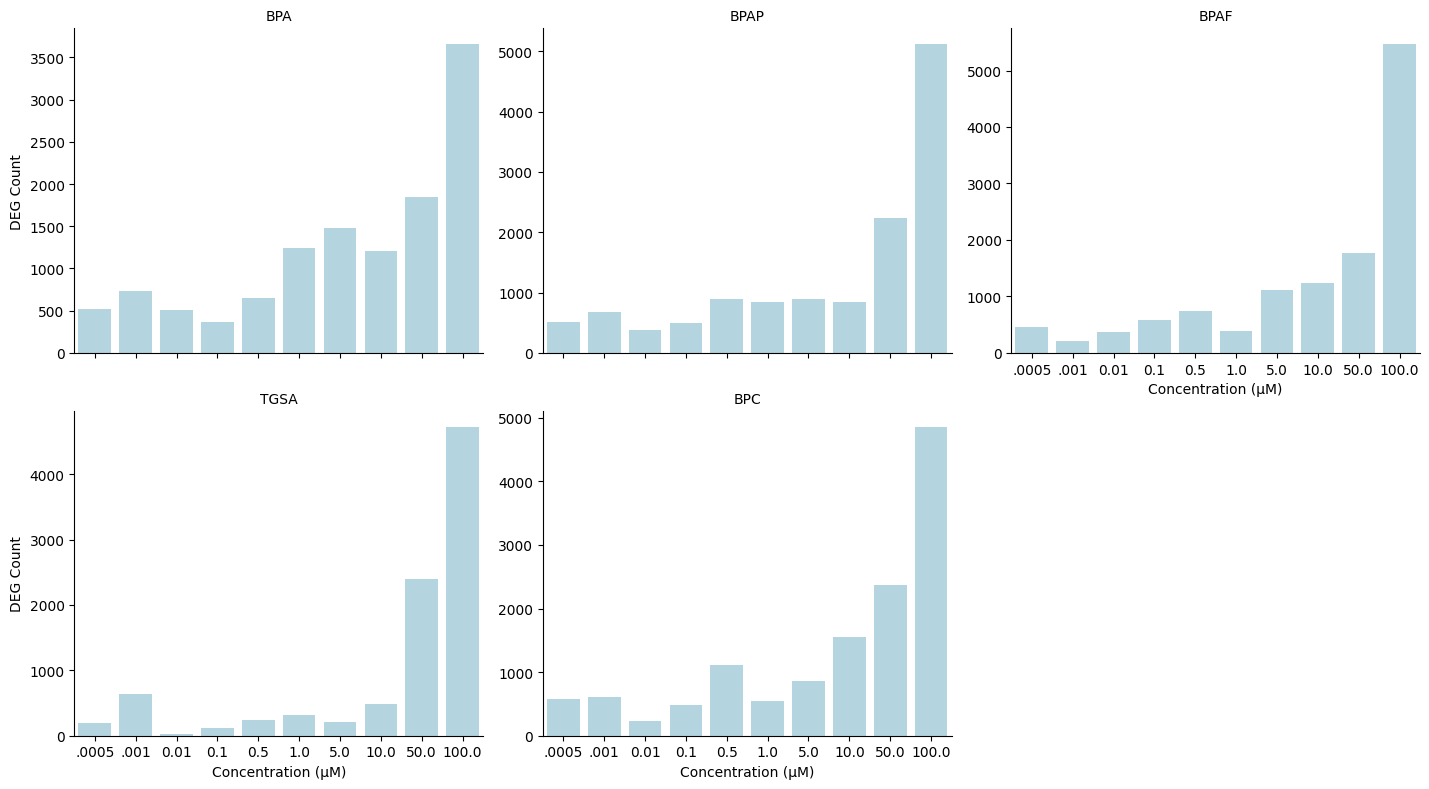

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_chems = ['BPC', 'BPAP', 'BPAF', 'TGSA', 'BPA']

plot_df = df[df['chemical'].isin(selected_chems)].copy()

plot_df['concentration'] = plot_df['concentration'].astype(float)
plot_df.sort_values('concentration', ascending=True, inplace=True)

g = sns.FacetGrid(
    plot_df,
    col='chemical',
    col_wrap=3,
    sharey=False,
    height=4,
    aspect=1.2
)
g.map_dataframe(sns.barplot, x='concentration2', y='count', color='lightblue')
g.set_titles(col_template="{col_name}")
g.set_xlabels('Concentration (µM)')
g.set_ylabels('DEG Count')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = [
    # BPA
    ["BPA", 100, 93], ["BPA", 50, 77], ["BPA", 10, 76], ["BPA", 5, 76], ["BPA", 1, 75],
    ["BPA", 0.5, 57], ["BPA", 0.1, 53], ["BPA", 0.01, 51], ["BPA", 0.001, 55], ["BPA", 0.0005, 54],
    # BPAF
    ["BPAF", 100, 98], ["BPAF", 50, 79], ["BPAF", 10, 68], ["BPAF", 5, 68], ["BPAF", 1, 65],
    ["BPAF", 0.5, 56], ["BPAF", 0.1, 69], ["BPAF", 0.01, 48], ["BPAF", 0.001, 84], ["BPAF", 0.0005, 56],
    # BPAP
    ["BPAP", 100, 97], ["BPAP", 50, 85], ["BPAP", 10, 68], ["BPAP", 5, 65], ["BPAP", 1, 55],
    ["BPAP", 0.5, 81], ["BPAP", 0.1, 59], ["BPAP", 0.01, 53], ["BPAP", 0.001, 60], ["BPAP", 0.0005, 52],
    # TGSA
    ["TGSA", 100, 96], ["TGSA", 50, 85], ["TGSA", 10, 55], ["TGSA", 5, 39], ["TGSA", 1, 51],
    ["TGSA", 0.5, 68], ["TGSA", 0.1, 55], ["TGSA", 0.01, 44], ["TGSA", 0.001, 60], ["TGSA", 0.0005, 46],
    # BPC
    ["BPC", 100, 97], ["BPC", 50, 90], ["BPC", 10, 75], ["BPC", 5, 62], ["BPC", 1, 54],
    ["BPC", 0.5, 68], ["BPC", 0.1, 53], ["BPC", 0.01, 48], ["BPC", 0.001, 53], ["BPC", 0.0005, 56]
]

df = pd.DataFrame(data, columns=["chemical", "concentration", "PC1"])

df = df.sort_values(by=["chemical", "concentration"])
df

chemical  concentration  PC1
9       BPA         0.0005   54
8       BPA         0.0010   55
7       BPA         0.0100   51
6       BPA         0.1000   53
5       BPA         0.5000   57
4       BPA         1.0000   75
3       BPA         5.0000   76
2       BPA        10.0000   76
1       BPA        50.0000   77
0       BPA       100.0000   93
19     BPAF         0.0005   56
18     BPAF         0.0010   84
17     BPAF         0.0100   48
16     BPAF         0.1000   69
15     BPAF         0.5000   56
14     BPAF         1.0000   65
13     BPAF         5.0000   68
12     BPAF        10.0000   68
11     BPAF        50.0000   79
10     BPAF       100.0000   98
29     BPAP         0.0005   52
28     BPAP         0.0010   60
27     BPAP         0.0100   53
26     BPAP         0.1000   59
25     BPAP         0.5000   81
24     BPAP         1.0000   55
23     BPAP         5.0000   65
22     BPAP        10.0000   68
21     BPAP        50.0000   85
20     BPAP       100.0000   97
49      BPC         0.0005   56
48      BPC         0.0010   53
47      BPC         0.0100   48
46      BPC         0.1000   53
45      BPC         0.5000   68
44      BPC         1.0000   54
43      BPC         5.0000   62
42      BPC        10.0000   75
41      BPC        50.0000   90
40      BPC       100.0000   97
39     TGSA         0.0005   46
38     TGSA         0.0010   60
37     TGSA         0.0100   44
36     TGSA         0.1000   55
35     TGSA         0.5000   68
34     TGSA         1.0000   51
33     TGSA         5.0000   39
32     TGSA        10.0000   55
31     TGSA        50.0000   85
30     TGSA       100.0000   96

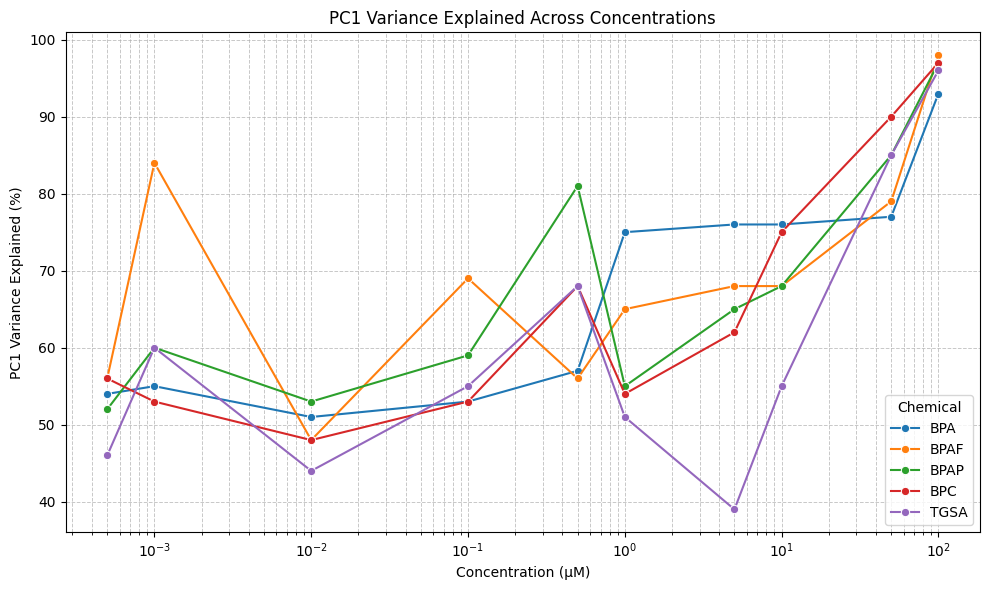

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="concentration", y="PC1", hue="chemical", marker="o")
plt.xscale("log")
plt.xlabel("Concentration (µM)")
plt.ylabel("PC1 Variance Explained (%)")
plt.title("PC1 Variance Explained Across Concentrations")
plt.legend(title="Chemical")

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

files = ["/content/sigGenes_BPA100.csv","/content/sigGenes_BPAF100.csv", "/content/sigGenes_BPAP100.csv", "/content/sigGenes_BPC100.csv", "/content/sigGenes_TGSA100.csv"]

dfs = []
for file in files:
    print(file)
    df_subset = pd.read_csv(file)
    print(df_subset.shape)
    dfs.append(df_subset)

a, b, c, d, e= dfs
a

a = a.rename(columns=lambda x: f"BPA_{x}" if x != 'gene' else x)
b = b.rename(columns=lambda x: f"BPAF_{x}" if x != 'gene' else x)
c = c.rename(columns=lambda x: f"BPAP_{x}" if x != 'gene' else x)
d = d.rename(columns=lambda x: f"BPC_{x}" if x != 'gene' else x)
e = e.rename(columns=lambda x: f"TGSA_{x}" if x != 'gene' else x)

merged = a.merge(b, on='gene', how='inner') \
          .merge(c, on='gene', how='inner') \
          .merge(d, on='gene', how='inner') \
          .merge(e, on='gene', how='inner')
merged['gene'] = merged['gene'].replace("ENSG00000215271", "HOMEZ")
print("Merged shape:",merged.shape)
print(len(merged.gene.unique()))

/content/sigGenes_BPA100.csv
(3662, 4)
/content/sigGenes_BPAF100.csv
(5473, 4)
/content/sigGenes_BPAP100.csv
(5123, 4)
/content/sigGenes_BPC100.csv
(4860, 4)
/content/sigGenes_TGSA100.csv
(4728, 4)
Merged shape: (2213, 16)
2182


In [ ]:
common_genes = set(a['gene']) & set(b['gene']) & set(c['gene']) & set(d['gene']) & set(e['gene'])

print(len(common_genes))

2182


In [ ]:
merged_genes = set(merged['gene'])
# expected common genes
expected_common_genes = set(common_genes)

# What genes are in merged but not in your intersect set?
extra_genes = merged_genes - expected_common_genes
print(f"Extra genes in merged: {len(extra_genes)}")
print(extra_genes)

Extra genes in merged: 0
set()


In [ ]:
for df, name in zip([a, b, c, d, e], ['BPA', 'BPAF', 'BPAP', 'BPC', 'TGSA']):
    dupes = df['gene'][df['gene'].duplicated()]
    print(f"{name}: {len(dupes)} duplicated gene entries")

BPA: 1 duplicated gene entries
BPAF: 2 duplicated gene entries
BPAP: 2 duplicated gene entries
BPC: 1 duplicated gene entries
TGSA: 2 duplicated gene entries


In [ ]:
common_genes = set(a['gene']) & set(b['gene']) & set(c['gene']) & set(d['gene']) & set(e['gene'])

a_common = a[a['gene'].isin(common_genes)]
b_common = b[b['gene'].isin(common_genes)]
c_common = c[c['gene'].isin(common_genes)]
d_common = d[d['gene'].isin(common_genes)]
e_common = e[e['gene'].isin(common_genes)]

merged = a_common.merge(b_common, on='gene')\
                 .merge(c_common, on='gene')\
                 .merge(d_common, on='gene')\
                 .merge(e_common, on='gene')

print("Merged shape:", merged.shape)

Merged shape: (2213, 16)


gene   BPA_ensembl_id       BPA_stat  BPA_log2FoldChange  \
0        LCN2  ENSG00000148346   0.000000e+00            5.137927   
1        WSB1  ENSG00000109046  8.141630e-189            3.036667   
2        ESR1  ENSG00000091831  2.363918e-175           -3.146771   
3     SLC12A2  ENSG00000064651  2.200931e-131           -2.542262   
4       NPY1R  ENSG00000164128  4.348155e-116           -2.887273   
...       ...              ...            ...                 ...   
2208    VAMP3  ENSG00000049245   4.966151e-02            0.330209   
2209    UTP18  ENSG00000011260   4.968470e-02           -0.313873   
2210      BMF  ENSG00000104081   4.968472e-02           -0.439893   
2211      MFF  ENSG00000168958   4.968472e-02           -0.273271   
2212   ZNF681  ENSG00000196172   4.983415e-02           -0.471634   

      BPAF_ensembl_id      BPAF_stat  BPAF_log2FoldChange  BPAP_ensembl_id  \
0     ENSG00000148346   0.000000e+00             5.626782  ENSG00000148346   
1     ENSG00000109046  2.910539e-184             2.524613  ENSG00000109046   
2     ENSG00000091831  7.109068e-216            -2.997763  ENSG00000091831   
3     ENSG00000064651  1.252977e-267            -3.428600  ENSG00000064651   
4     ENSG00000164128  4.680531e-111            -2.489326  ENSG00000164128   
...               ...            ...                  ...              ...   
2208  ENSG00000049245   1.589979e-05             0.439176  ENSG00000049245   
2209  ENSG00000011260   3.095855e-13            -1.075786  ENSG00000011260   
2210  ENSG00000104081   6.020213e-08            -1.211529  ENSG00000104081   
2211  ENSG00000168958   1.152629e-04            -0.406194  ENSG00000168958   
2212  ENSG00000196172   3.760333e-07            -1.179885  ENSG00000196172   

          BPAP_stat  BPAP_log2FoldChange   BPC_ensembl_id       BPC_stat  \
0      0.000000e+00             5.093377  ENSG00000148346   0.000000e+00   
1     4.756666e-131             2.616111  ENSG00000109046  1.385154e-200   
2     1.489927e-161            -2.820124  ENSG00000091831  2.318512e-193   
3     2.256661e-147            -3.005485  ENSG00000064651  6.037019e-195   
4      3.728549e-97            -2.751208  ENSG00000164128  2.180385e-107   
...             ...                  ...              ...            ...   
2208   2.366778e-04             0.435327  ENSG00000049245   6.165008e-04   
2209   3.168803e-10            -1.057204  ENSG00000011260   1.571552e-04   
2210   7.162249e-08            -1.308746  ENSG00000104081   1.046118e-07   
2211   1.155765e-11            -0.774172  ENSG00000168958   9.029039e-04   
2212   6.906121e-08            -1.537165  ENSG00000196172   7.305948e-03   

      BPC_log2FoldChange  TGSA_ensembl_id      TGSA_stat  TGSA_log2FoldChange  
0               5.887796  ENSG00000148346  1.278095e-127             2.728266  
1               2.946266  ENSG00000109046  6.192007e-249             2.998446  
2              -3.199994  ENSG00000091831  6.704726e-215            -3.142587  
3              -2.938621  ENSG00000064651  6.196630e-143            -2.330507  
4              -2.731292  ENSG00000164128  8.971026e-140            -3.205765  
...                  ...              ...            ...                  ...  
2208            0.504613  ENSG00000049245   2.215393e-10             0.736985  
2209           -0.617116  ENSG00000011260   1.298479e-16            -1.238142  
2210           -1.181168  ENSG00000104081   1.527137e-10            -1.538041  
2211           -0.381772  ENSG00000168958   3.670516e-06            -0.497309  
2212           -0.609199  ENSG00000196172   4.340424e-04            -0.774149  

[2213 rows x 16 columns]

In [ ]:
log_cols = [col for col in merged.columns if 'log2FoldChange' in col]
log_data = merged[log_cols]
import numpy as np

# Check sign of each row: 1 if all positive, -1 if all negative, 0 if mixed
signs = np.sign(log_data)
consistent_sign = (signs.min(axis=1) == signs.max(axis=1))
merged['sign_consistent'] = consistent_sign
consistent_merged = merged[merged['sign_consistent']]
print(f"Genes with consistent log2FC direction: {consistent_merged.shape[0]}")

Genes with consistent log2FC direction: 2172


In [ ]:
consistent_merged.sort_values(by='BPA_log2FoldChange', ascending=False)
print(consistent_merged[consistent_merged["BPA_log2FoldChange"]>5]["gene"])
print(consistent_merged[consistent_merged["BPAF_log2FoldChange"]>5]["gene"])
print(consistent_merged[consistent_merged["BPAP_log2FoldChange"]>5]["gene"])
print(consistent_merged[consistent_merged["BPC_log2FoldChange"]>5]["gene"])
print(consistent_merged[consistent_merged["TGSA_log2FoldChange"]>5]["gene"])

0    LCN2
Name: gene, dtype: object
0        LCN2
69      HMOX1
1506     IL32
Name: gene, dtype: object
0        LCN2
69      HMOX1
1506     IL32
Name: gene, dtype: object
0    LCN2
Name: gene, dtype: object
Series([], Name: gene, dtype: object)


In [ ]:
print(consistent_merged[consistent_merged["BPC_log2FoldChange"]>5]["gene"])

0    LCN2
Name: gene, dtype: object


In [ ]:
print(consistent_merged[consistent_merged["TGSA_log2FoldChange"]]["gene"])

2          ESR1
3       SLC12A2
4         NPY1R
7         KITLG
9         DCDC2
         ...   
2206     TCEAL4
2209      UTP18
2210        BMF
2211        MFF
2212     ZNF681
Name: gene, Length: 1035, dtype: object


In [ ]:
inconsistent = merged[~merged['sign_consistent']]
print("Example of inconsistent rows:")
print(inconsistent.head())

Example of inconsistent rows:
        gene   BPA_ensembl_id      BPA_stat  BPA_log2FoldChange  \
79    TENT5A  ENSG00000112773  1.437431e-31            0.970026   
120    DUSP4  ENSG00000120875  2.551719e-24            1.432915   
149   CYP1B1  ENSG00000138061  9.627783e-22            1.329312   
330    HSPA8  ENSG00000109971  3.833498e-13           -0.654737   
361  S100A14  ENSG00000189334  2.279179e-12           -0.699747   

     BPAF_ensembl_id     BPAF_stat  BPAF_log2FoldChange  BPAP_ensembl_id  \
79   ENSG00000112773  2.554470e-56            -1.336390  ENSG00000112773   
120  ENSG00000120875  1.157467e-08            -0.947660  ENSG00000120875   
149  ENSG00000138061  4.217872e-07             0.637062  ENSG00000138061   
330  ENSG00000109971  1.126831e-19             0.590769  ENSG00000109971   
361  ENSG00000189334  4.302446e-03             0.222858  ENSG00000189334   

        BPAP_stat  BPAP_log2FoldChange   BPC_ensembl_id      BPC_stat  \
79   7.476669e-55            -1.87070

In [ ]:
import pandas as pd
dfs = []
conc = ["0.0005", "0.001", "0.01", "0.1", "0.5", "1", "5", "10", "50", "100"]
for a in conc:
  dfs.append(pd.read_csv("sigGenes_"+"TGSA"+a+".csv").dropna())
a, b, c, d, e, f, g, h, i, j = dfs
a

gene       ensembl_id      stat  log2FoldChange
1       RPS4X  ENSG00000198034  0.000001        0.627339
2      ATG101  ENSG00000123395  0.000002        0.783305
3    HSP90AB1  ENSG00000096384  0.000003        0.458236
4        RPL6  ENSG00000089009  0.000006        0.596065
5       LMAN2  ENSG00000169223  0.000006        0.562639
..        ...              ...       ...             ...
194    MRPS14  ENSG00000120333  0.047343        0.360872
195     REEP5  ENSG00000129625  0.048124        0.372795
196     FOXP2  ENSG00000128573  0.048487       -0.364834
197     TAF15  ENSG00000270647  0.049556       -0.357608
198   FAM162A  ENSG00000114023  0.049707        0.338142

[198 rows x 4 columns]

In [ ]:
common_genes = (
    set(a['gene']) &
    set(b['gene']) &
    set(c['gene']) &
    set(d['gene']) &
    set(e['gene']) &
    set(f['gene']) &
    set(g['gene']) &
    set(h['gene']) &
    set(i['gene']) &
    set(j['gene'])
)
common_genes

{'ALKBH5',
 'ATF7IP',
 'ATG101',
 'ATOSA',
 'BCAP29',
 'CETN2',
 'DDIT3',
 'DENR',
 'EEF1E1',
 'FAM107B',
 'HSP90AB1',
 'HSPA5',
 'INTS3',
 'ISCU',
 'LACTB',
 'NOC2L',
 'OTUD1',
 'PPIAL4A',
 'PSME4',
 'RBBP4',
 'RPL6',
 'RPL9',
 'RPS15',
 'RPS4X',
 'SCAMP1',
 'SRSF1',
 'TSPAN6',
 'UBAP2L',
 'UBP1',
 'VEGFA',
 'ZNF638'}

In [ ]:
common_BPAF_genes = {'ABAT',
 'ALKBH5',
 'ATF7IP',
 'ATG101',
 'BCAP29',
 'CCNT1',
 'DHX15',
 'EIF3L',
 'ELOB',
 'FASTKD2',
 'FOXP2',
 'HIF1A',
 'HSPA5',
 'LMAN2',
 'MTA3',
 'NAPA',
 'OS9',
 'PDIA6',
 'RPL12',
 'RPL6',
 'RPL9',
 'RPS15',
 'RPS4X',
 'UBE2R2',
 'UBP1',
 'USP5'}
common_BPA_genes = {'ABAT',
 'AGR2',
 'AHSA1',
 'ALKBH5',
 'AP1S1',
 'APOD',
 'ATG101',
 'CA5B',
 'CALCR',
 'CBX4',
 'CBX6',
 'CCT5',
 'CETN2',
 'CLMN',
 'CTSA',
 'DEPTOR',
 'DSP',
 'E2F5',
 'EIF4A1',
 'ELOB',
 'EPS15L1',
 'FAM107B',
 'FASTKD2',
 'FBXO45',
 'GREB1',
 'HIF1A',
 'HSP90AB1',
 'INPPL1',
 'INTS3',
 'ISCU',
 'KAT2B',
 'KRT15',
 'KYNU',
 'LACTB',
 'LCMT1',
 'LMAN2',
 'MAGED1',
 'MAGEF1',
 'MDH2',
 'MEF2D',
 'NEDD4',
 'NOC2L',
 'OS9',
 'OTUD1',
 'P4HTM',
 'PDIA6',
 'PIGP',
 'PLEKHF2',
 'POGLUT3',
 'PPP1R21',
 'PRPF38B',
 'PRR11',
 'RBBP4',
 'RPL18A',
 'RPL6',
 'RPL9',
 'RPN1',
 'RPS15',
 'RPS4X',
 'SCUBE2',
 'SLC25A43',
 'SNX17',
 'STAM2',
 'SYTL2',
 'TBC1D9',
 'TBCA',
 'TFF1',
 'TPD52L1',
 'UBAP2L',
 'UBE2R2',
 'UBP1',
 'ULK1',
 'ZFAND3',
 'ZFP36L2',
 'ZNF703',
 'ZWILCH'}
common_BPAP_genes = {'ALKBH5',
 'ATG101',
 'BCAP29',
 'BRD2',
 'CSTB',
 'CYP51A1',
 'DENR',
 'ELOB',
 'EMC4',
 'ETFA',
 'GOLGA6L9',
 'HIF1A',
 'INTS3',
 'IQGAP1',
 'LMNA',
 'MAGED1',
 'MDH2',
 'NOC2L',
 'NPIPB4',
 'PIGP',
 'PPIAL4A',
 'PPP1R21',
 'PREX1',
 'RBBP4',
 'RPL6',
 'RPS15',
 'RPS27',
 'RPS4X',
 'SCAMP1',
 'SLC25A43',
 'UBP1',
 'USP5',
 'VDAC3',
 'ZNF721'}
BPC_common_genes = {'ABHD17C',
 'ATF7IP',
 'ATG101',
 'ATOSA',
 'CETN2',
 'FAM107B',
 'FOXP2',
 'HMGCS1',
 'INPPL1',
 'INTS3',
 'LACTB',
 'LMAN2',
 'MTA3',
 'NOC2L',
 'OS9',
 'PDIA6',
 'PIGP',
 'PPIAL4A',
 'RBBP4',
 'RPL6',
 'RPL9',
 'RPN1',
 'RPS15',
 'RPS4X',
 'SCAMP1',
 'U2AF1',
 'UBAP2L',
 'UBP1'}
common_gene_TGSA = {'ALKBH5',
 'ATF7IP',
 'ATG101',
 'ATOSA',
 'BCAP29',
 'CETN2',
 'DDIT3',
 'DENR',
 'EEF1E1',
 'FAM107B',
 'HSP90AB1',
 'HSPA5',
 'INTS3',
 'ISCU',
 'LACTB',
 'NOC2L',
 'OTUD1',
 'PPIAL4A',
 'PSME4',
 'RBBP4',
 'RPL6',
 'RPL9',
 'RPS15',
 'RPS4X',
 'SCAMP1',
 'SRSF1',
 'TSPAN6',
 'UBAP2L',
 'UBP1',
 'VEGFA',
 'ZNF638'}

In [ ]:
common_all = (
    common_BPAF_genes &
    common_BPA_genes &
    common_BPAP_genes &
    BPC_common_genes &
    common_gene_TGSA
)
print(f"Genes common across all five chemicals at all concentrations: {len(common_all)}")
print(sorted(common_all))

Genes common across all five chemicals at all concentrations: 5
['ATG101', 'RPL6', 'RPS15', 'RPS4X', 'UBP1']


In [ ]:
print(len(common_BPAF_genes))
print(len(common_BPA_genes))
print(len(common_BPAP_genes))
print(len(BPC_common_genes))
print(len(common_gene_TGSA))

26
76
34
28
31


In [ ]:
common_two = (
    common_BPAF_genes &
    common_BPAP_genes)
len(common_two)

10

In [ ]:
common_two = (
    common_BPAF_genes &
    common_BPA_genes)
len(common_two)

15

In [ ]:
common_two = (
    BPC_common_genes &
    common_BPA_genes)
len(common_two)

19

In [ ]:
common_two = (
    common_BPAP_genes &
    common_BPA_genes)
len(common_two)

16

Data from desktip gsea for Estradiol:

Creating plots for estradiol exposed gene sets vs concentration

0.1
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.41
2. HALLMARK_G2M_CHECKPOINT 1.44
3. HALLMARK_ESTROGEN_RESPONSE_LATE 1.38
4. HALLMARK_MITOTIC_SPINDLE 1.37
5. HALLMARK_SPERMATOGENESIS 0.97
6. HALLMARK_E2F_TARGETS 1.37

1
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.34
2. HALLMARK_ESTROGEN_RESPONSE_LATE 1.07
3. HALLMARK_E2F_TARGETS 0.97
4. HALLMARK_G2M_CHECKPOINT 1.16
5. HALLMARK_MITOTIC_SPINDLE 1.11
6. HALLMARK_SPERMATOGENESIS 1.10

10
1. HALLMARK_G2M_CHECKPOINT 1.82
2. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.73
3. HALLMARK_E2F_TARGETS 1.67
4. HALLMARK_ESTROGEN_RESPONSE_LATE 1.74
5. HALLMARK_SPERMATOGENESIS 1.89
6. HALLMARK_MITOTIC_SPINDLE 1.68

100
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.56
2. HALLMARK_ESTROGEN_RESPONSE_LATE 1.54
3. HALLMARK_G2M_CHECKPOINT 1.54
4. HALLMARK_MITOTIC_SPINDLE 1.67
5. HALLMARK_E2F_TARGETS 1.53
6. HALLMARK_SPERMATOGENESIS 1.58

1000
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.51
2. HALLMARK_ESTROGEN_RESPONSE_LATE 1.48
3. HALLMARK_G2M_CHECKPOINT 1.57
4. HALLMARK_MITOTIC_SPINDLE 1.53
5. HALLMARK_E2F_TARGETS 1.35
6. HALLMARK_SPERMATOGENESIS 1.59

10000
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.63
2. HALLMARK_ESTROGEN_RESPONSE_LATE 1.61
3. HALLMARK_G2M_CHECKPOINT 1.64
4. HALLMARK_MITOTIC_SPINDLE 1.93
5. HALLMARK_E2F_TARGETS 1.63
6. HALLMARK_SPERMATOGENESIS 1.68

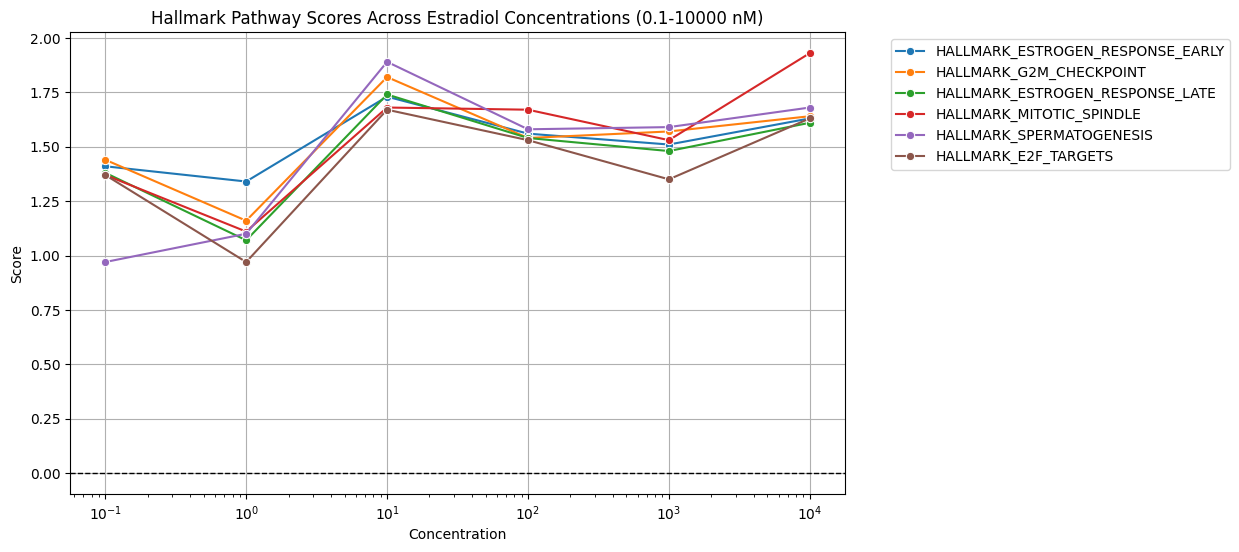

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/content/a.txt"
data = []
current_concentration = None

with open(file_path, "r") as file:
    for line in file:
        line = line.strip()
        if not line:
            continue

        parts = line.split()
        try:
            concentration = float(parts[0])
            current_concentration = concentration
        except ValueError:

            hallmark = parts[0]
            score = float(parts[1])
            data.append([current_concentration, hallmark, score])


df = pd.DataFrame(data, columns=["Concentration", "Hallmark", "Score"])

df_pivot = df.pivot(index="Concentration", columns="Hallmark", values="Score")
df = pd.DataFrame(data, columns=["Concentration", "Hallmark", "Score"])
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Concentration", y="Score", hue="Hallmark", marker="o")

plt.axhline(0, color="black", linestyle="--", linewidth=1)

plt.xscale("log")  # Log scale for better visualization otherwise it looked weird
plt.xlabel("Concentration")
plt.ylabel("Score")
plt.title("Hallmark Pathway Scores Across Estradiol Concentrations (0.1-10000 nM)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

Data from desktip gsea for BPA:

Creating plots for BPA exposed gene sets vs concentration

0.0005
1. HALLMARK_G2M_CHECKPOINT 1.79
2. HALLMARK_E2F_TARGETS 1.62
3. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.62
4. HALLMARK_ESTROGEN_RESPONSE_LATE 1.62
5. HALLMARK_SPERMATOGENESIS 1.43
6. HALLMARK_MITOTIC_SPINDLE 1.41

0.001
1. HALLMARK_G2M_CHECKPOINT 2.90
2. HALLMARK_ESTROGEN_RESPONSE_EARLY 2.89
3. HALLMARK_E2F_TARGETS 2.89
4. HALLMARK_ESTROGEN_RESPONSE_LATE 2.85
5. HALLMARK_MITOTIC_SPINDLE 2.27
6. HALLMARK_SPERMATOGENESIS 2.14

0.01
1. HALLMARK_E2F_TARGETS 2.78
2. HALLMARK_ESTROGEN_RESPONSE_EARLY 2.75
3. HALLMARK_G2M_CHECKPOINT 2.65
4. HALLMARK_ESTROGEN_RESPONSE_LATE 2.50
5. HALLMARK_MITOTIC_SPINDLE 2.16
6. HALLMARK_SPERMATOGENESIS 2.01

0.1
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.88
2. HALLMARK_G2M_CHECKPOINT 1.67
3. HALLMARK_ESTROGEN_RESPONSE_LATE 1.65
4. HALLMARK_MITOTIC_SPINDLE (16) 1.16 --
5. HALLMARK_SPERMATOGENESIS (12) 1.26 --
6. HALLMARK_E2F_TARGETS 1.47

0.5
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.87
2. HALLMARK_SPERMATOGENESIS 1.86
3. HALLMARK_ESTROGEN_RESPONSE_LATE 1.85
4. HALLMARK_G2M_CHECKPOINT 1.84
5. HALLMARK_MITOTIC_SPINDLE 1.83
6. HALLMARK_E2F_TARGETS 1.74

1
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 3.05
2. HALLMARK_ESTROGEN_RESPONSE_LATE 2.89
3. HALLMARK_E2F_TARGETS 2.89
4. HALLMARK_G2M_CHECKPOINT 2.84
5. HALLMARK_MITOTIC_SPINDLE 2.26
6. HALLMARK_SPERMATOGENESIS 1.96

5
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.92
2. HALLMARK_G2M_CHECKPOINT 1.90
3. HALLMARK_ESTROGEN_RESPONSE_LATE 1.88
4. HALLMARK_MITOTIC_SPINDLE 1.84
5. HALLMARK_SPERMATOGENESIS 1.84
6. HALLMARK_E2F_TARGETS 1.78

10
1. HALLMARK_G2M_CHECKPOINT 2.03
2. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.98
3. HALLMARK_E2F_TARGETS 1.95
4. HALLMARK_ESTROGEN_RESPONSE_LATE 1.92
5. HALLMARK_SPERMATOGENESIS 1.86
6. HALLMARK_MITOTIC_SPINDLE 1.81

50
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.91
2. HALLMARK_ESTROGEN_RESPONSE_LATE 1.88
3. HALLMARK_G2M_CHECKPOINT 1.83
4. HALLMARK_E2F_TARGETS 1.76
5. HALLMARK_MITOTIC_SPINDLE 1.76
6. HALLMARK_SPERMATOGENESIS 1.61

100
1. HALLMARK_ESTROGEN_RESPONSE_EARLY -1.68
2. HALLMARK_ESTROGEN_RESPONSE_LATE (4) -1.49
3. HALLMARK_G2M_CHECKPOINT (5) -1.38
4. HALLMARK_MITOTIC_SPINDLE (6) -1.37
5. HALLMARK_E2F_TARGETS (7) -1.35
6. HALLMARK_SPERMATOGENESIS (8) -1.33


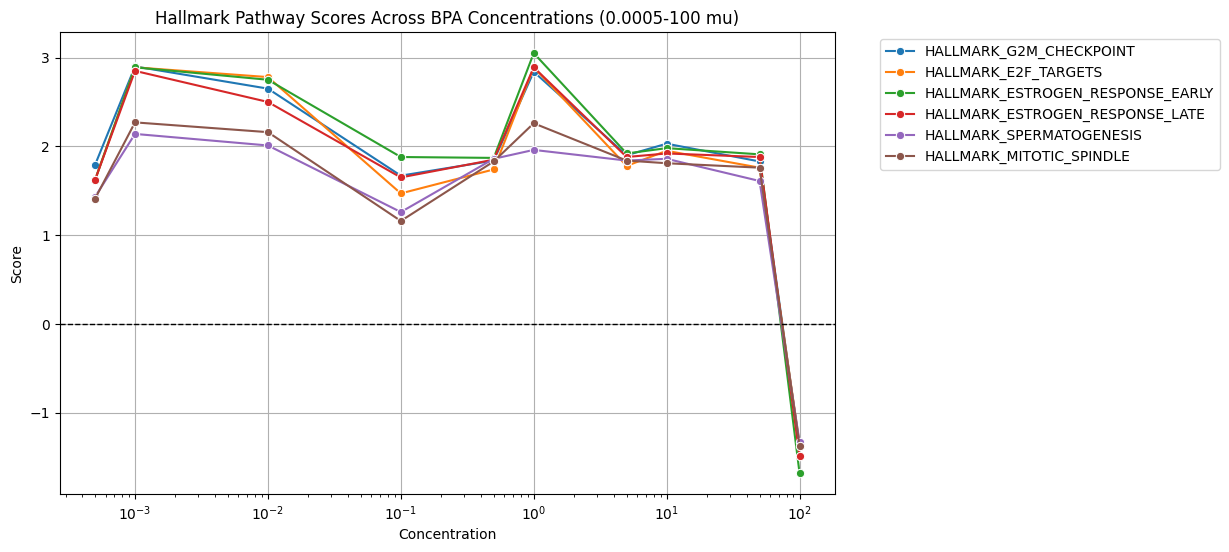

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/content/a.txt"

data = []
current_concentration = None

with open(file_path, "r") as file:
    for line in file:
        line = line.strip()
        if not line:
            continue

        parts = line.split()
        try:
            concentration = float(parts[0])
            current_concentration = concentration
        except ValueError:
            hallmark = parts[0]
            score = float(parts[1])
            data.append([current_concentration, hallmark, score])

df = pd.DataFrame(data, columns=["Concentration", "Hallmark", "Score"])

df_pivot = df.pivot(index="Concentration", columns="Hallmark", values="Score")
df = pd.DataFrame(data, columns=["Concentration", "Hallmark", "Score"])
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Concentration", y="Score", hue="Hallmark", marker="o")

plt.axhline(0, color="black", linestyle="--", linewidth=1)

plt.xscale("log")
plt.xlabel("Concentration")
plt.ylabel("Score")
plt.title("Hallmark Pathway Scores Across BPA Concentrations (0.0005-100 mu)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

BPAF

0.5
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.59
2. HALLMARK_SPERMATOGENESIS 1.56
3. HALLMARK_ESTROGEN_RESPONSE_LATE 1.59
4. HALLMARK_G2M_CHECKPOINT 1.72
5. HALLMARK_MITOTIC_SPINDLE 1.60
6. HALLMARK_E2F_TARGETS 1.67

1
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.67
2. HALLMARK_ESTROGEN_RESPONSE_LATE 1.67
3. HALLMARK_E2F_TARGETS 1.63
4. HALLMARK_G2M_CHECKPOINT 1.81
5. HALLMARK_MITOTIC_SPINDLE 1.58
6. HALLMARK_SPERMATOGENESIS 1.70

5
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.93
2. HALLMARK_G2M_CHECKPOINT 1.79
3. HALLMARK_ESTROGEN_RESPONSE_LATE 2.00
4. HALLMARK_MITOTIC_SPINDLE 1.72
5. HALLMARK_SPERMATOGENESIS 1.86
6. HALLMARK_E2F_TARGETS 1.80

10
1. HALLMARK_G2M_CHECKPOINT 1.99
2. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.77
3. HALLMARK_E2F_TARGETS 1.98
4. HALLMARK_ESTROGEN_RESPONSE_LATE 1.73
5. HALLMARK_SPERMATOGENESIS 1.82
6. HALLMARK_MITOTIC_SPINDLE 1.89

50
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.18
2. HALLMARK_ESTROGEN_RESPONSE_LATE 1.21
3. HALLMARK_G2M_CHECKPOINT 1.30
4. HALLMARK_E2F_TARGETS 0.76
5. HALLMARK_MITOTIC_SPINDLE 1.36
6. HALLMARK_SPERMATOGENESIS 0.99

100
1. HALLMARK_ESTROGEN_RESPONSE_EARLY -1.70
2. HALLMARK_ESTROGEN_RESPONSE_LATE -1.53
3. HALLMARK_G2M_CHECKPOINT 1.01
4. HALLMARK_MITOTIC_SPINDLE -1.15
5. HALLMARK_E2F_TARGETS -0.71
6. HALLMARK_SPERMATOGENESIS -1.00

BPAP:

1
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.56
2. HALLMARK_ESTROGEN_RESPONSE_LATE 1.43
3. HALLMARK_E2F_TARGETS 1.39
4. HALLMARK_G2M_CHECKPOINT 1.59
5. HALLMARK_MITOTIC_SPINDLE 1.48
6. HALLMARK_SPERMATOGENESIS 1.20

5
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 2.07
2. HALLMARK_G2M_CHECKPOINT 1.97
3. HALLMARK_ESTROGEN_RESPONSE_LATE 1.93
4. HALLMARK_MITOTIC_SPINDLE 1.81
5. HALLMARK_SPERMATOGENESIS 1.58
6. HALLMARK_E2F_TARGETS 1.79

10
1. HALLMARK_G2M_CHECKPOINT 1.86
2. HALLMARK_ESTROGEN_RESPONSE_EARLY 2.00
3. HALLMARK_E2F_TARGETS 1.61
4. HALLMARK_ESTROGEN_RESPONSE_LATE 1.95
5. HALLMARK_SPERMATOGENESIS 1.62
6. HALLMARK_MITOTIC_SPINDLE 1.76

50
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.29
2. HALLMARK_ESTROGEN_RESPONSE_LATE 1.12
3. HALLMARK_G2M_CHECKPOINT 1.24
4. HALLMARK_E2F_TARGETS 0.70
5. HALLMARK_MITOTIC_SPINDLE -0.75
6. HALLMARK_SPERMATOGENESIS -0.92

100
1. HALLMARK_ESTROGEN_RESPONSE_EARLY -1.74
2. HALLMARK_ESTROGEN_RESPONSE_LATE -1.54
3. HALLMARK_G2M_CHECKPOINT 0.87
4. HALLMARK_MITOTIC_SPINDLE -0.90
5. HALLMARK_E2F_TARGETS 0.91
6. HALLMARK_SPERMATOGENESIS -0.78


BPC

0.5
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.74
2. HALLMARK_SPERMATOGENESIS 1.64
3. HALLMARK_ESTROGEN_RESPONSE_LATE 1.66
4. HALLMARK_G2M_CHECKPOINT 1.83
5. HALLMARK_MITOTIC_SPINDLE 1.72
6. HALLMARK_E2F_TARGETS 1.67

1
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 2.04
2. HALLMARK_ESTROGEN_RESPONSE_LATE 2.07
3. HALLMARK_E2F_TARGETS 1.91
4. HALLMARK_G2M_CHECKPOINT 2.08
5. HALLMARK_MITOTIC_SPINDLE 1.79
6. HALLMARK_SPERMATOGENESIS 1.79

5
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 2.11
2. HALLMARK_G2M_CHECKPOINT 2.06
3. HALLMARK_ESTROGEN_RESPONSE_LATE 1.90
4. HALLMARK_MITOTIC_SPINDLE 1.91
5. HALLMARK_SPERMATOGENESIS 1.89
6. HALLMARK_E2F_TARGETS 2.02

10
1. HALLMARK_G2M_CHECKPOINT 1.93
2. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.96
3. HALLMARK_E2F_TARGETS 1.95
4. HALLMARK_ESTROGEN_RESPONSE_LATE 1.92
5. HALLMARK_SPERMATOGENESIS 1.92
6. HALLMARK_MITOTIC_SPINDLE 1.94

50
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.18
2. HALLMARK_ESTROGEN_RESPONSE_LATE 1.26
3. HALLMARK_G2M_CHECKPOINT 0.94
4. HALLMARK_E2F_TARGETS 0.86
5. HALLMARK_MITOTIC_SPINDLE -1.14
6. HALLMARK_SPERMATOGENESIS -0.84

100
1. HALLMARK_ESTROGEN_RESPONSE_EARLY -1.82
2. HALLMARK_ESTROGEN_RESPONSE_LATE -1.64
3. HALLMARK_G2M_CHECKPOINT -0.89
4. HALLMARK_MITOTIC_SPINDLE -1.31
5. HALLMARK_E2F_TARGETS 0.82
6. HALLMARK_SPERMATOGENESIS -1.20

TGSA:
100    
HALLMARK_ESTROGEN_RESPONSE_EARLY 1.59    
HALLMARK_ESTROGEN_RESPONSE_LATE 1.59    
HALLMARK_G2M_CHECKPOINT 1.12    
HALLMARK_MITOTIC_SPINDLE 1.10    
HALLMARK_E2F_TARGETS 0.91    
HALLMARK_SPERMATOGENESIS 1.11    

BPS

1

HALLMARK_ESTROGEN_RESPONSE_EARLY 1.29    
HALLMARK_ESTROGEN_RESPONSE_LATE 1.13    
HALLMARK_E2F_TARGETS 1.40    
HALLMARK_G2M_CHECKPOINT 1.45    
HALLMARK_MITOTIC_SPINDLE 1.36    
HALLMARK_SPERMATOGENESIS 1.29    
5

HALLMARK_ESTROGEN_RESPONSE_EARLY 1.78    
HALLMARK_G2M_CHECKPOINT 1.76    
HALLMARK_ESTROGEN_RESPONSE_LATE 1.80    
HALLMARK_MITOTIC_SPINDLE 1.77    
HALLMARK_SPERMATOGENESIS 1.71    
HALLMARK_E2F_TARGETS 1.66    
10

HALLMARK_ESTROGEN_RESPONSE_EARLY 1.63    
HALLMARK_ESTROGEN_RESPONSE_LATE 1.59    
HALLMARK_G2M_CHECKPOINT 1.66    
HALLMARK_E2F_TARGETS 1.66    
HALLMARK_MITOTIC_SPINDLE 1.74    
HALLMARK_SPERMATOGENESIS 1.69    
50

HALLMARK_G2M_CHECKPOINT 1.61    
HALLMARK_ESTROGEN_RESPONSE_EARLY 1.65    
HALLMARK_E2F_TARGETS 1.59    
HALLMARK_ESTROGEN_RESPONSE_LATE 1.66    
HALLMARK_SPERMATOGENESIS 1.71    
HALLMARK_MITOTIC_SPINDLE 1.86    
100

HALLMARK_ESTROGEN_RESPONSE_EARLY 1.55    
HALLMARK_ESTROGEN_RESPONSE_LATE 1.54    
HALLMARK_G2M_CHECKPOINT 1.65    
HALLMARK_MITOTIC_SPINDLE 1.74    
HALLMARK_E2F_TARGETS 1.57    
HALLMARK_SPERMATOGENESIS 1.86  

BPF     

1

HALLMARK_ESTROGEN_RESPONSE_EARLY 1.71    
HALLMARK_ESTROGEN_RESPONSE_LATE 1.69    
HALLMARK_E2F_TARGETS 1.69    
HALLMARK_G2M_CHECKPOINT 1.81    
HALLMARK_MITOTIC_SPINDLE 1.75    
HALLMARK_SPERMATOGENESIS 1.68    
5

HALLMARK_ESTROGEN_RESPONSE_EARLY 1.58    
HALLMARK_G2M_CHECKPOINT 1.67    
HALLMARK_ESTROGEN_RESPONSE_LATE 1.55    
HALLMARK_MITOTIC_SPINDLE 1.93    
HALLMARK_SPERMATOGENESIS 1.85    
HALLMARK_E2F_TARGETS 1.62    
10

HALLMARK_ESTROGEN_RESPONSE_EARLY 1.65    
HALLMARK_ESTROGEN_RESPONSE_LATE 1.69    
HALLMARK_G2M_CHECKPOINT 1.66    
HALLMARK_E2F_TARGETS 1.68    
HALLMARK_MITOTIC_SPINDLE 1.75    
HALLMARK_SPERMATOGENESIS 1.95    
50

HALLMARK_G2M_CHECKPOINT 1.63    
HALLMARK_ESTROGEN_RESPONSE_EARLY 1.53    
HALLMARK_E2F_TARGETS 1.61    
HALLMARK_ESTROGEN_RESPONSE_LATE 1.56    
HALLMARK_SPERMATOGENESIS 1.67    
HALLMARK_MITOTIC_SPINDLE 1.77    
100

HALLMARK_ESTROGEN_RESPONSE_EARLY 1.51    
HALLMARK_ESTROGEN_RESPONSE_LATE 1.59    
HALLMARK_G2M_CHECKPOINT 1.56    
HALLMARK_MITOTIC_SPINDLE 1.71    
HALLMARK_E2F_TARGETS 1.57    
HALLMARK_SPERMATOGENESIS 1.86       

BPF Analog (2,4 BPF)   

1

HALLMARK_ESTROGEN_RESPONSE_EARLY -0.97    
HALLMARK_ESTROGEN_RESPONSE_LATE -1.24    
HALLMARK_E2F_TARGETS -0.71    
HALLMARK_G2M_CHECKPOINT 1.21    
HALLMARK_MITOTIC_SPINDLE 1.13     
HALLMARK_SPERMATOGENESIS 0.94    
5

HALLMARK_ESTROGEN_RESPONSE_EARLY 1.36    
HALLMARK_G2M_CHECKPOINT 1.72    
HALLMARK_ESTROGEN_RESPONSE_LATE 1.38    
HALLMARK_MITOTIC_SPINDLE 1.61    
HALLMARK_SPERMATOGENESIS 1.76    
HALLMARK_E2F_TARGETS 1.67    
10

HALLMARK_ESTROGEN_RESPONSE_EARLY 1.54    
HALLMARK_ESTROGEN_RESPONSE_LATE 1.58    
HALLMARK_G2M_CHECKPOINT 1.64    
HALLMARK_E2F_TARGETS 1.60    
HALLMARK_MITOTIC_SPINDLE 1.77    
HALLMARK_SPERMATOGENESIS 1.74    
50

HALLMARK_G2M_CHECKPOINT 1.65    
HALLMARK_ESTROGEN_RESPONSE_EARLY 1.65    
HALLMARK_E2F_TARGETS 1.57    
HALLMARK_ESTROGEN_RESPONSE_LATE 1.57    
HALLMARK_SPERMATOGENESIS 1.60    
HALLMARK_MITOTIC_SPINDLE 1.84    
100

HALLMARK_ESTROGEN_RESPONSE_EARLY 1.65    
HALLMARK_ESTROGEN_RESPONSE_LATE 1.66    
HALLMARK_G2M_CHECKPOINT 1.61    
HALLMARK_MITOTIC_SPINDLE 1.82    
HALLMARK_E2F_TARGETS 1.59    
HALLMARK_SPERMATOGENESIS 1.64    

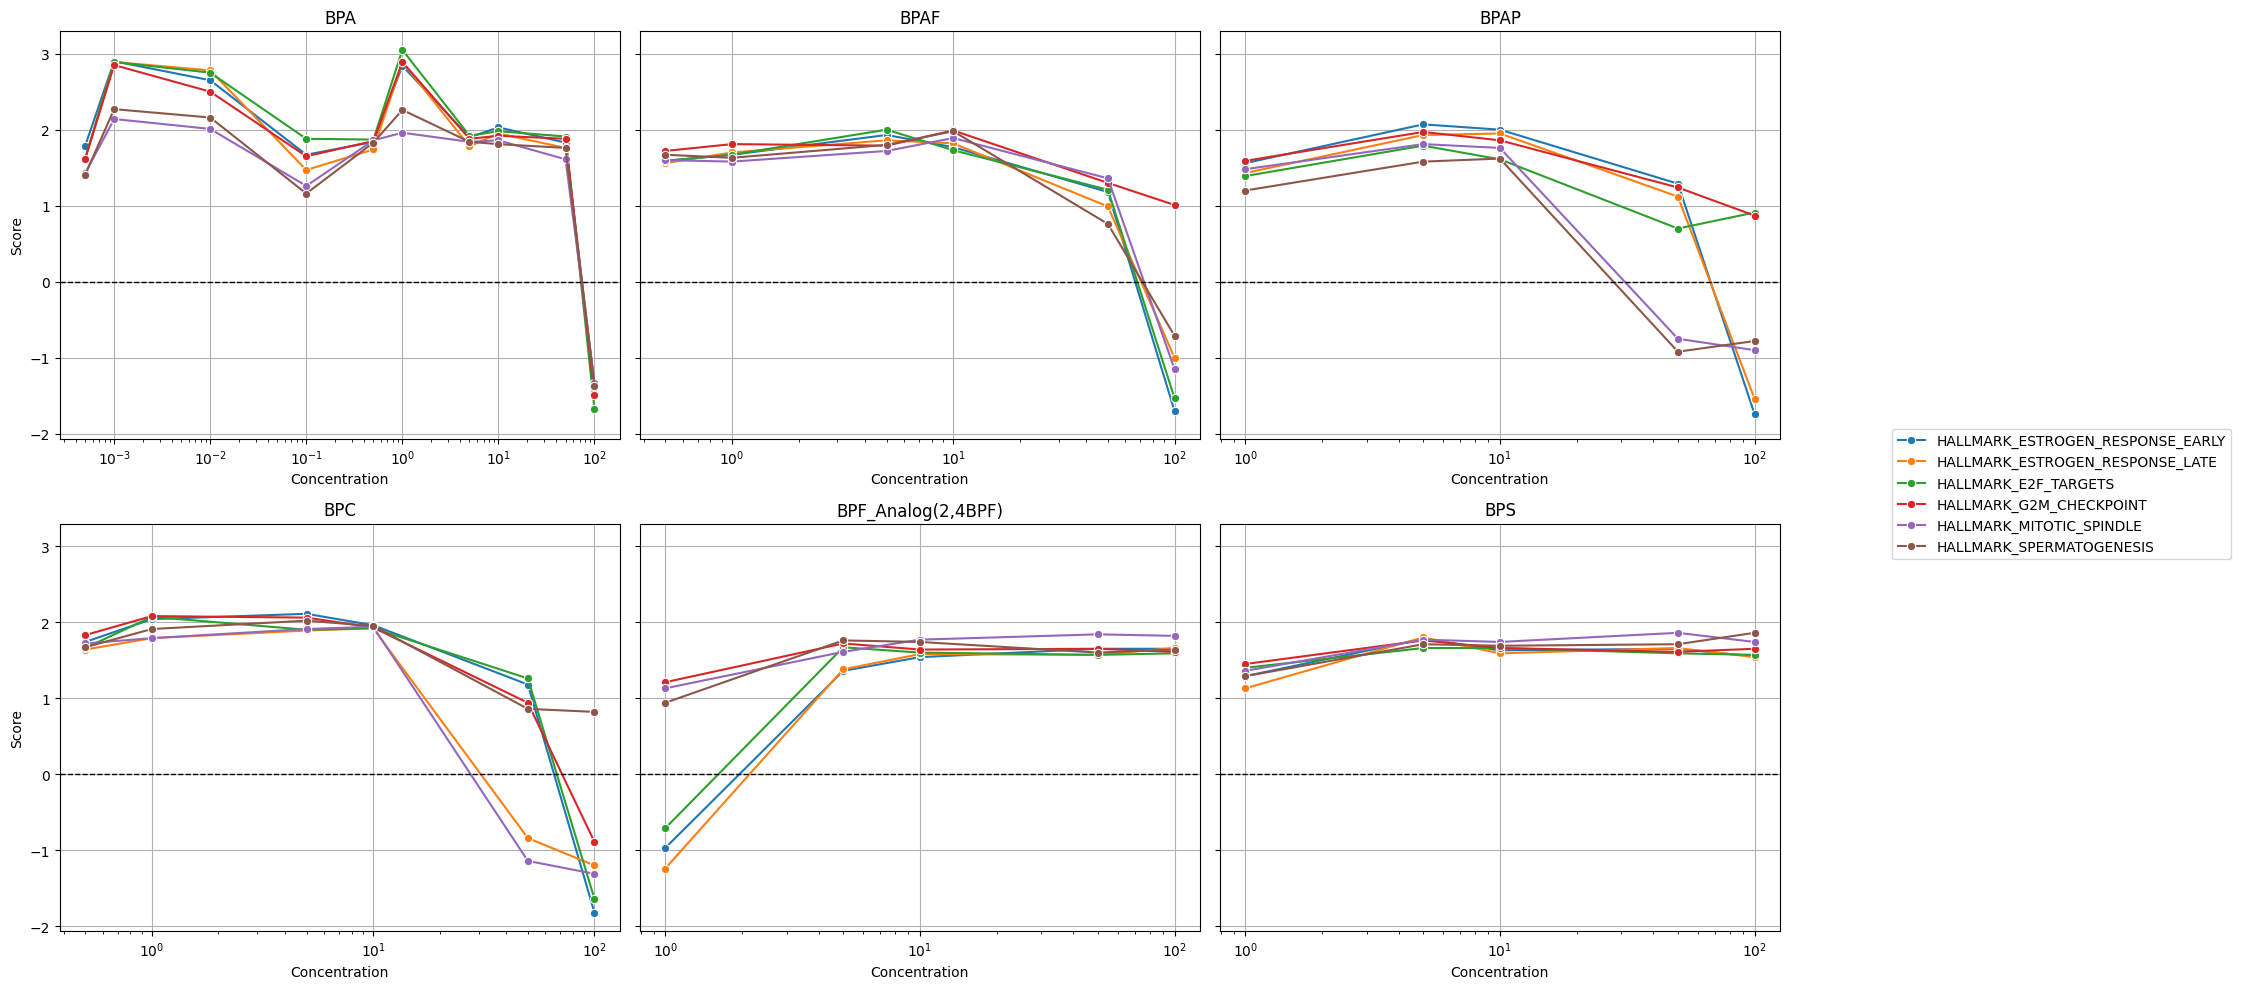

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_paths = [
    "/content/BPA.txt",
    "/content/BPAF.txt",
    "/content/BPAP.txt",
    "/content/BPC.txt",
    "/content/BPF_Analog(2,4BPF).txt",
    "/content/BPS.txt"
]


fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
axes = axes.flatten()

for ax, file_path in zip(axes, file_paths):
    data = []
    current_concentration = None

    with open(file_path, "r") as file:
        for line in file:
            line = line.strip()
            if not line:
                continue

            parts = line.split()

            try:
                concentration = float(parts[0])
                current_concentration = concentration
            except ValueError:
                hallmark = parts[0]
                score = float(parts[1])
                data.append([current_concentration, hallmark, score])

    df = pd.DataFrame(data, columns=["Concentration", "Hallmark", "Score"])

    sns.lineplot(data=df, x="Concentration", y="Score", hue="Hallmark", marker="o", ax=ax)

    ax.axhline(0, color="black", linestyle="--", linewidth=1)
    ax.set_xscale("log")
    ax.set_xlabel("Concentration")
    ax.set_ylabel("Score")
    ax.set_title(file_path.split("/")[-1].replace(".txt", ""))

    ax.grid(True)
    ax.legend().set_visible(False)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.05, 0.5), loc="center left")

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_bp = {
    "10 nM":     [2.86, 2.80, 2.80, 2.82, 2.71, -2.21, -2.07, -1.77, -2.05, -1.57],
    "1 nM":      [2.59, 2.47, 2.43, 2.46, 2.48, -2.02, -2.08, -1.75, -2.14, -1.67],
    "0.1 nM":    [2.56, 2.48, 2.53, 2.52, 2.49, -2.15, -2.24, -1.71, -2.16, -1.42],
    "0.01 nM":   [2.57, 2.48, 2.37, 2.44, 2.44, -2.01, -2.16, -1.92, -2.02,  -1.49],
    "0.0001 nM": [2.00, 2.00, 1.84, 1.93, 1.92,  0.00, 0.00, -1.7, 0.00,  0.00]
}
index_bp = [
    "Mitotic Sister Chromatid Segregation",
    "Sister Chromatid Segregation",
    "Chromosome Segregation",
    "Nuclear Chromosome Segregation",
    "Mitotic Nuclear Division",
    "Negative Regulation of Viral Process",
    "Negative Regulation of Chemokine Process",
    "Negative Regulation of Cytokine Production",
    "Negative Regulation of Viral genome",
    "Negative Regulation of Multicellular Organism"
]
df_bp = pd.DataFrame(data_bp, index=index_bp)

In [ ]:
data_cc = {
    "10 nM":     [2.61, 2.58, 2.58, 2.36, 2.39, 0.00, -1.89, -1.47, -1.72, 0.00],
    "1 nM":      [2.33, 2.37, 2.31, 2.23, 2.13, -1.90, -2.07, -1.51, -1.91, -1.97],
    "0.1 nM":    [2.46, 2.46, 2.36, 2.30, 2.22, -1.64,  0.00, -1.35, -1.65, -1.77],
    "0.01 nM":   [2.48, 2.39, 2.38, 2.22, 1.99, -1.75, -2.00, -1.59, -2.02, -1.83],
    "0.0001 nM": [1.79, 1.85, 1.78, 1.69, 1.73, 0.00, -1.76,  0.00, -1.69,  0.00]
}
index_cc = [
    "Condensed Chromosome",
    "Chromosome Centromeric Region",
    "Condensed Chromosome Centromeric Region",
    "Chromosomal Region",
    "Mitotic Spindle",
    "Actin Filament Bundle",
    "Nadh Dehydrogenase Complex",
    "Cell Leading Edge",
    "Respirasome",
    "Actomyosin"
]
df_cc = pd.DataFrame(data_cc, index=index_cc)

In [ ]:
data_mf = {
    "10 nM":     [2.19, 2.05, 2.08, 1.69, 2.03, -1.86, -1.84, -1.74, -1.76, -1.85],
    "1 nM":      [1.87, 1.78, 2.00, 0.00, 2.11, -2.09, -1.78, -1.78, -1.72, -1.81],
    "0.1 nM":    [1.95, 1.83, 2.08, 1.57, 2.28, -1.60, -1.56, -1.63, -1.53, -1.70],
    "0.01 nM":   [1.93, 1.78, 1.96, 1.53, 2.03, -1.86, -1.82, -1.92, -1.72, 0.00],
    "0.0001 nM": [0.00, 0.00, 1.60, 1.41, 0.00,  0.00, -1.50, -1.61, 0.00,  0.00]
}
index_mf = [
    "Microtubule Binding",
    "Tubulin Binding",
    "Atp Dependent Activity Acting On",
    "Atp Dependent Activity",
    "Structural Constituent Of Chromatin",
    "Proton Transmembrane Transporter Activity",
    "Active Monoatomic Ion Transmembrane Transporter",
    "Electron Transfer Activity",
    "Primary Active Transmembrane Transporter Activity",
    "Udp Glycosyltransferase Activity"
]
df_mf = pd.DataFrame(data_mf, index=index_mf)

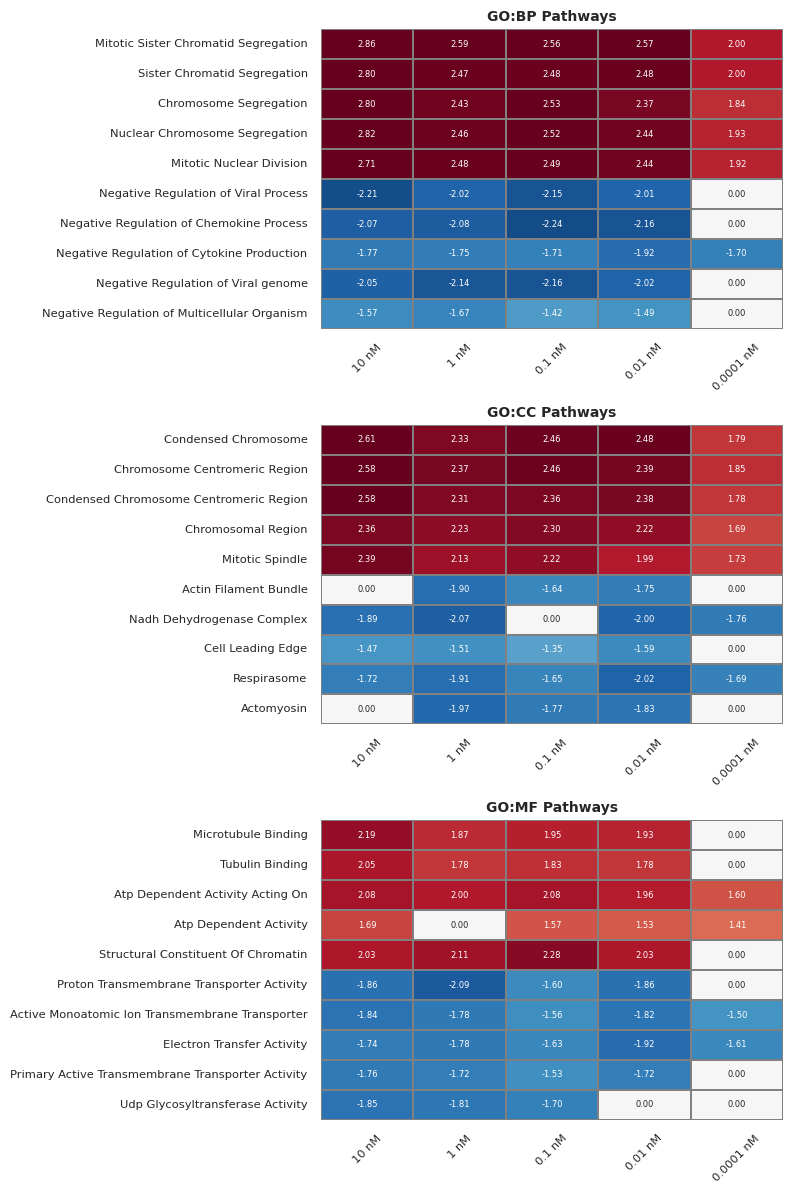

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", font_scale=0.75)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12), sharex=False)

cmap = "RdBu_r"
vmin, vmax = -2.5, 2.5

# GO:BP
sns.heatmap(df_bp, cmap=cmap, annot=True, fmt=".2f", center=0,
            vmin=vmin, vmax=vmax, linewidths=0.3, linecolor="gray",
            ax=axes[0], cbar=False, annot_kws={"size": 6})
axes[0].set_title("GO:BP Pathways", fontsize=10, weight='bold')
axes[0].tick_params(axis='x', labelrotation=45)
axes[0].set_ylabel("")
axes[0].set_xlabel("")

# GO:CC
sns.heatmap(df_cc, cmap=cmap, annot=True, fmt=".2f", center=0,
            vmin=vmin, vmax=vmax, linewidths=0.3, linecolor="gray",
            ax=axes[1], cbar=False, annot_kws={"size": 6})
axes[1].set_title("GO:CC Pathways", fontsize=10, weight='bold')
axes[1].tick_params(axis='x', labelrotation=45)
axes[1].set_ylabel("")
axes[1].set_xlabel("")

# GO:MF
sns.heatmap(df_mf, cmap=cmap, annot=True, fmt=".2f", center=0,
            vmin=vmin, vmax=vmax, linewidths=0.3, linecolor="gray",
            ax=axes[2], cbar=False, annot_kws={"size": 6})
axes[2].set_title("GO:MF Pathways", fontsize=10, weight='bold')
axes[2].tick_params(axis='x', labelrotation=45)
axes[2].set_ylabel("")
axes[2].set_xlabel("")

plt.tight_layout()
plt.show()

In [ ]:
plt.savefig("GO_BP_CC_MF_combined_row_RdBu.png", dpi=300)

<Figure size 640x480 with 0 Axes>

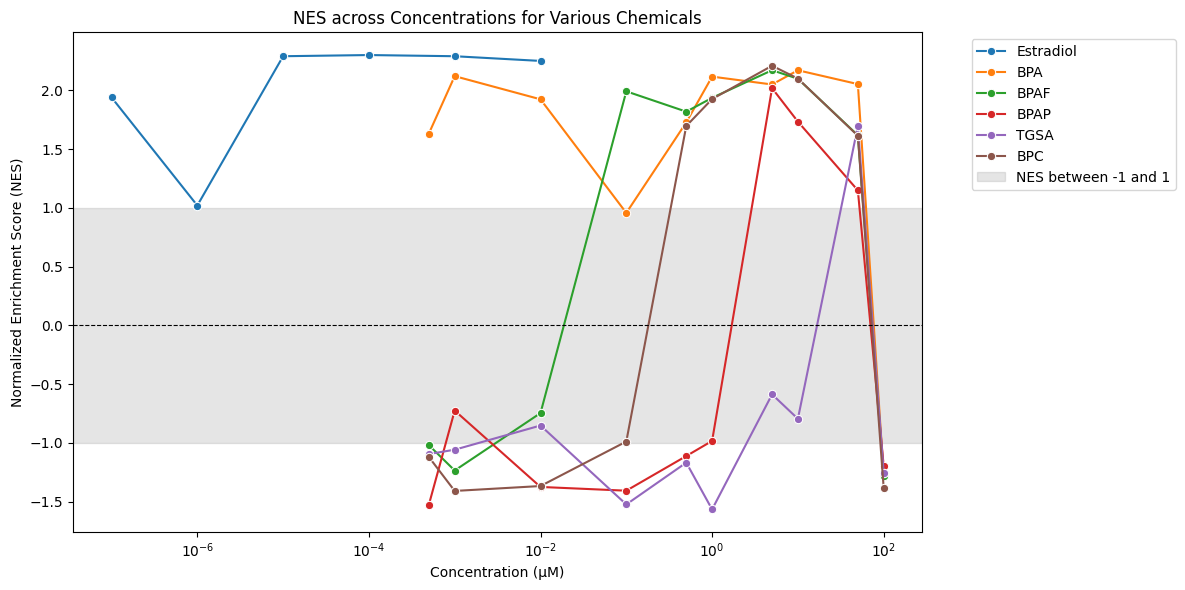

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

concentrations = [
    0.0000001, 0.000001, 0.00001, 0.0001, 0.0005, 0.001,
    0.01, 0.1, 0.5, 1, 5, 10, 50, 100
]

data = {
    "Concentration": concentrations,
    "Estradiol": [1.94, 1.02, 2.29, 2.30, None] + [2.29, 2.25]+[None]*7,
    "BPA": [None]*4 +[1.63236, 2.120522, 1.923423, 0.9569531, 1.727135, 2.116449, 2.049621, 2.170556, 2.052789, -1.278124] ,
    "BPAF": [None]*4 +[-1.018906, -1.234502, -0.7457824, 1.991429, 1.818355, 1.935886, 2.171005, 2.098308, 1.617196, -1.279265],
    "BPAP": [None]*4 +[-1.525096, -0.7245795, -1.374183, -1.406115, -1.111355, -0.9826712, 2.018211, 1.733502, 1.148707, -1.19849],
    "TGSA": [None]*4 +[-1.094021, -1.057493, -0.8516151, -1.522984, -1.167439, -1.565295, -0.5867031, -0.7944845, 1.695745, -1.252106] ,
    "BPC": [None]*4 +[-1.119518, -1.408223, -1.366483, -0.987843, 1.696521, 1.925726, 2.20894, 2.100056, 1.613492, -1.384386] ,
}

df = pd.DataFrame(data)
df_melted = df.melt(id_vars="Concentration", var_name="Chemical", value_name="NES")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x="Concentration", y="NES", hue="Chemical", marker="o")
plt.axhspan(-1, 1, color='gray', alpha=0.2, label="NES between -1 and 1")
plt.xscale("log")
plt.xlabel("Concentration (µM)")
plt.ylabel("Normalized Enrichment Score (NES)")
plt.title("NES across Concentrations for Various Chemicals")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


heatmaps for subset chemicals for the estrogen biomarker set

!for BPA

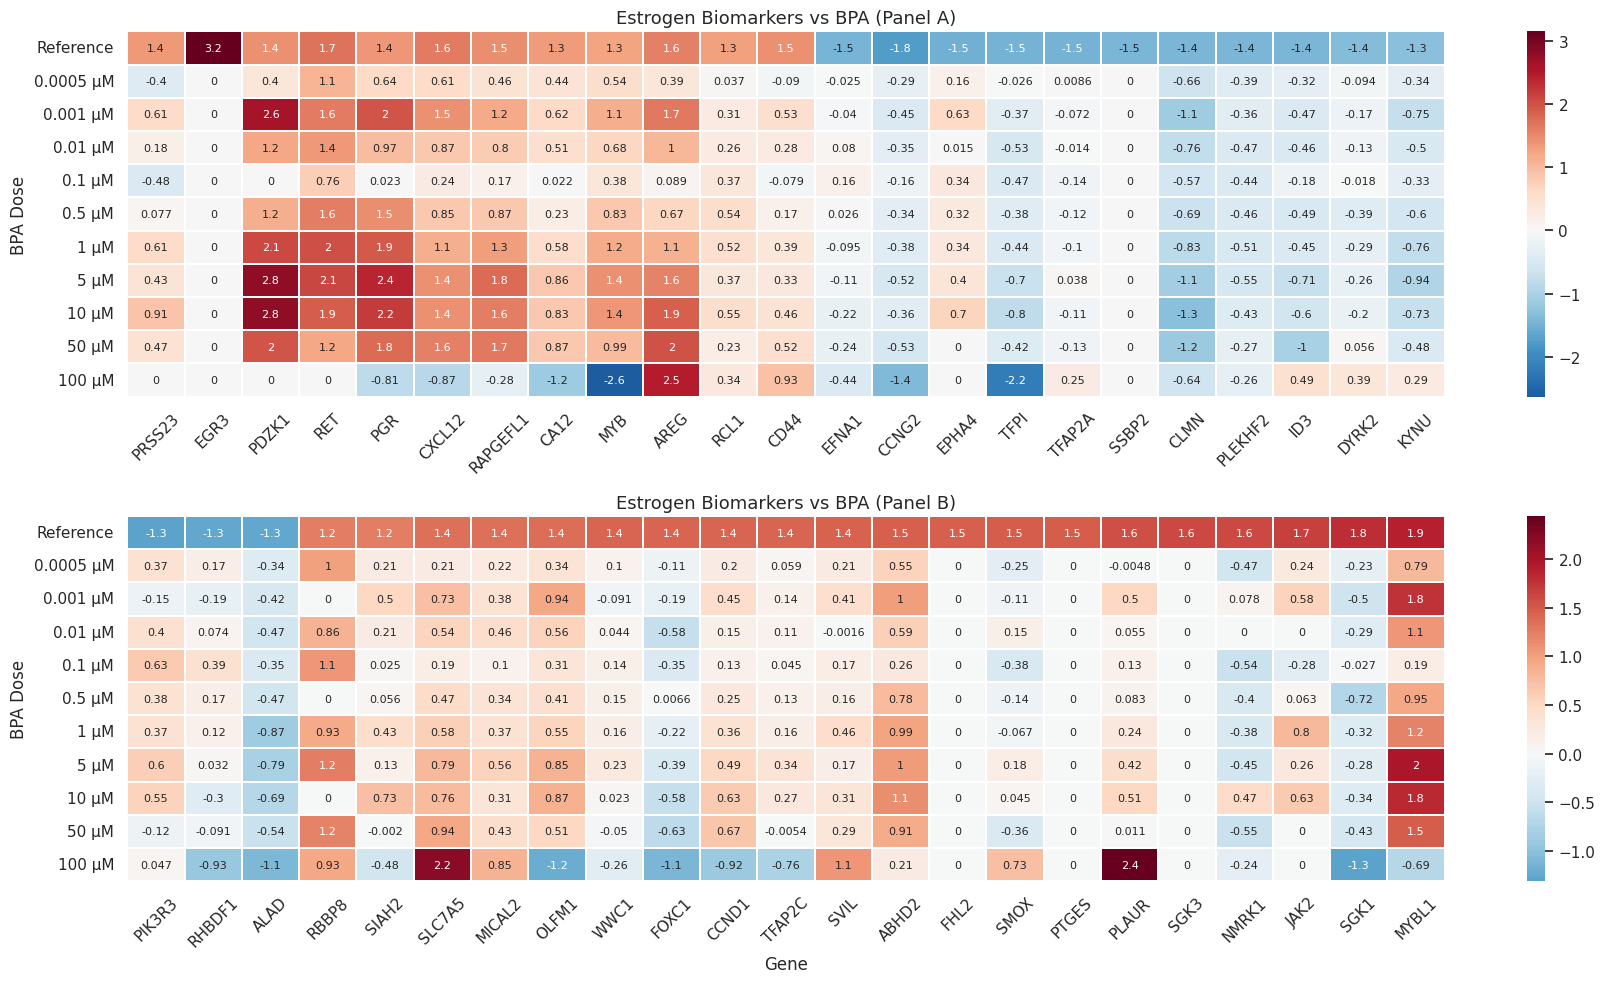

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/BPA_estroBiomarker_Mat.csv", index_col=0)
num_genes = df.shape[1]
mid = num_genes // 2
df_panelA = df.iloc[:, :mid]
df_panelB = df.iloc[:, mid:]
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 10), sharey=True)
sns.heatmap(df_panelA,
            ax=axes[0], annot=True, fmt=".2g", cmap="RdBu_r", center=0, linewidths=0.3,
            annot_kws={"size": 8})
axes[0].set_title("Estrogen Biomarkers vs BPA (Panel A)", fontsize=13)
axes[0].set_ylabel("BPA Dose")
axes[0].tick_params(axis='x', labelrotation=45)
sns.heatmap(df_panelB,
            ax=axes[1], annot=True, fmt=".2g", cmap="RdBu_r", center=0, linewidths=0.3,
            annot_kws={"size": 8}, cbar=True)
axes[1].set_title("Estrogen Biomarkers vs BPA (Panel B)", fontsize=13)
axes[1].set_ylabel("BPA Dose")
axes[1].set_xlabel("Gene")
axes[1].tick_params(axis='x', labelrotation=45)
plt.tight_layout()
plt.savefig("estrogen_biomarker_split_panels_BpA.png", dpi=300)
plt.show()

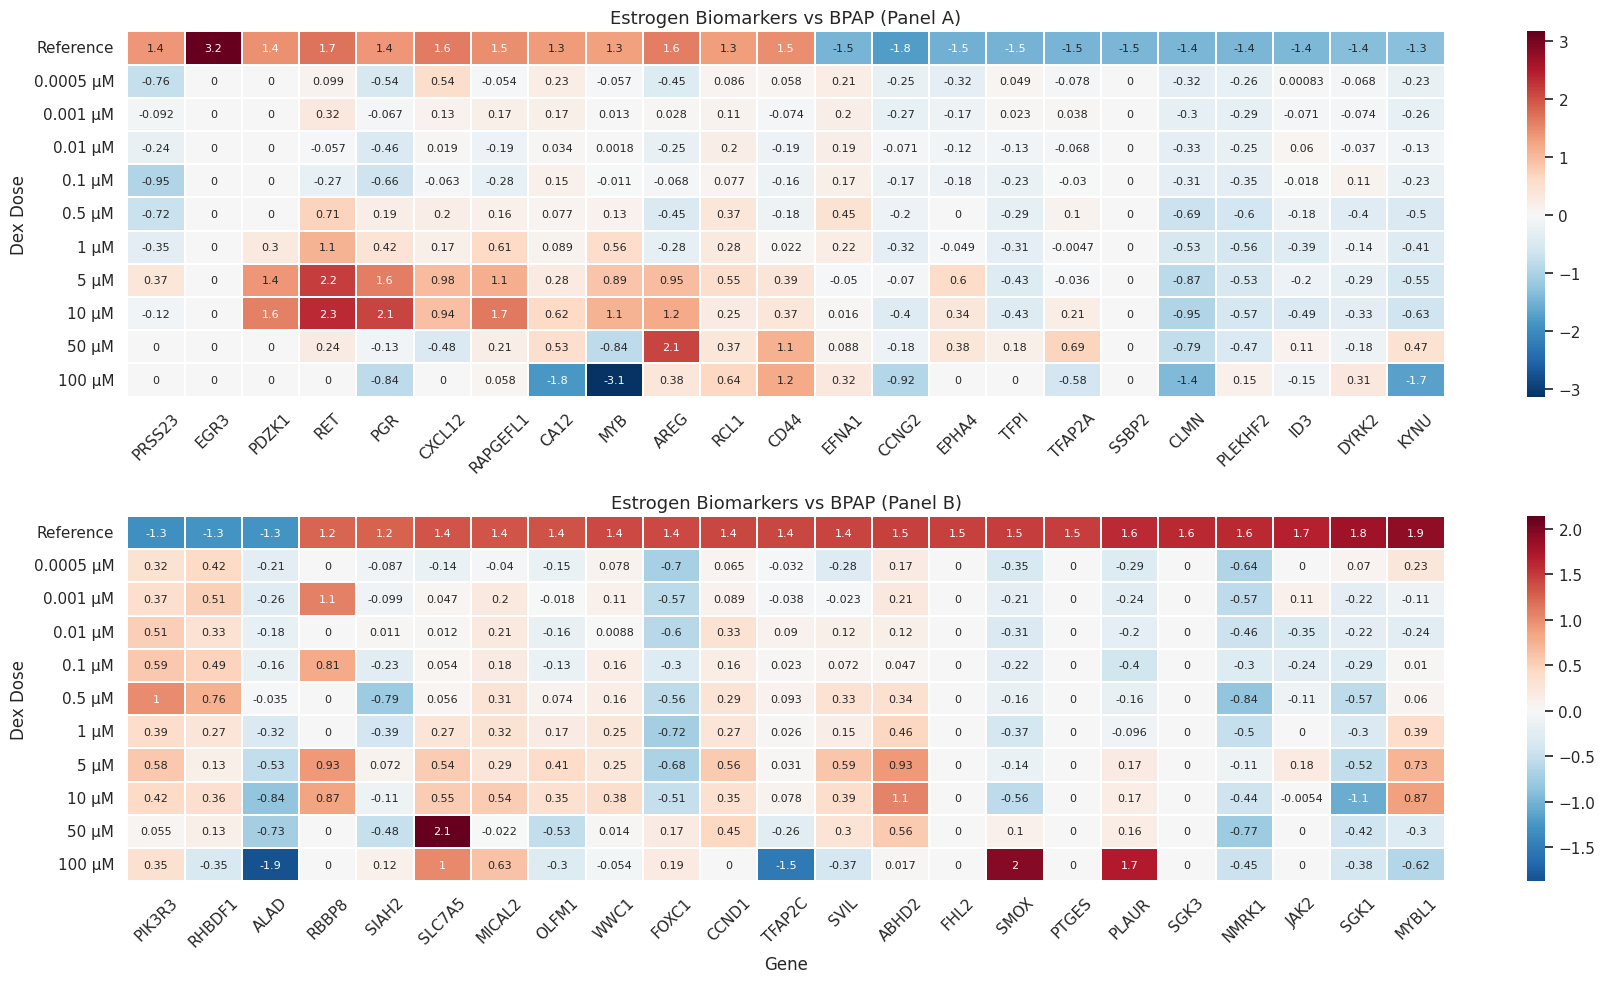

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/BPAP_estroBiomarker_Mat.csv", index_col=0)
num_genes = df.shape[1]
mid = num_genes // 2
df_panelA = df.iloc[:, :mid]
df_panelB = df.iloc[:, mid:]
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 10), sharey=True)
# Panel A
sns.heatmap(df_panelA,
            ax=axes[0], annot=True, fmt=".2g", cmap="RdBu_r", center=0, linewidths=0.3,
            annot_kws={"size": 8})
axes[0].set_title("Estrogen Biomarkers vs BPAP (Panel A)", fontsize=13)
axes[0].set_ylabel("Dex Dose")
axes[0].tick_params(axis='x', labelrotation=45)

# Panel B
sns.heatmap(df_panelB,
            ax=axes[1], annot=True, fmt=".2g", cmap="RdBu_r", center=0, linewidths=0.3,
            annot_kws={"size": 8}, cbar=True)
axes[1].set_title("Estrogen Biomarkers vs BPAP (Panel B)", fontsize=13)
axes[1].set_ylabel("Dex Dose")
axes[1].set_xlabel("Gene")
axes[1].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.savefig("estrogen_biomarker_split_panels_BPAP.png", dpi=300)
plt.show()

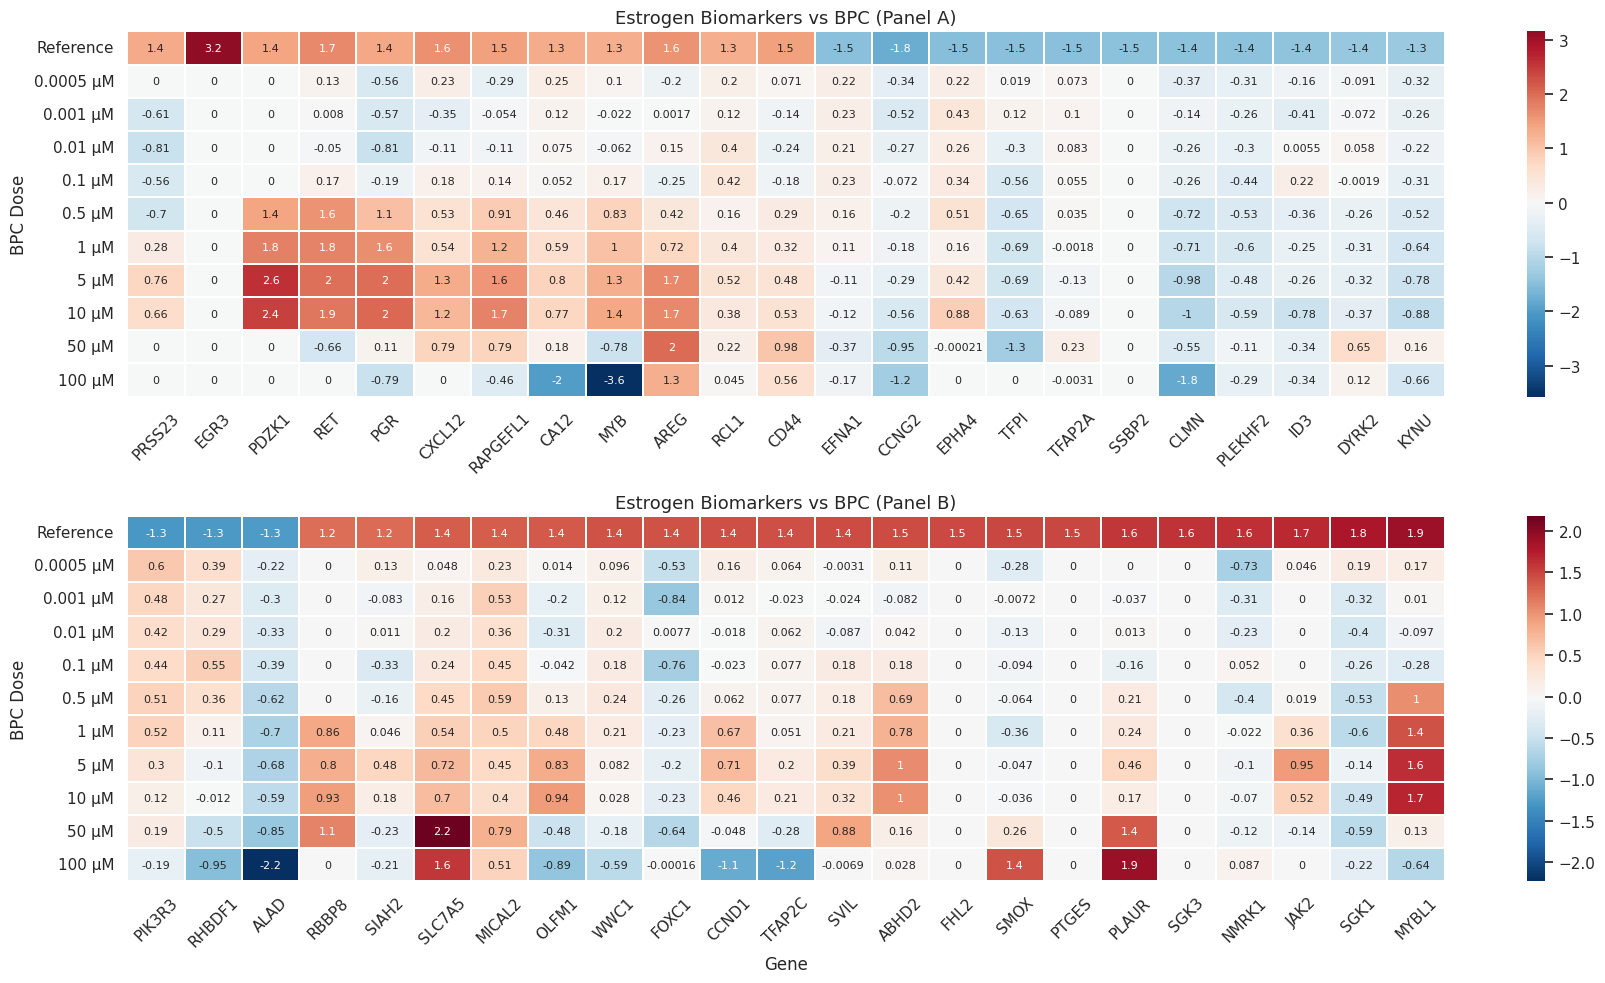

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/BPC_estroBiomarker_Mat.csv", index_col=0)
num_genes = df.shape[1]
mid = num_genes // 2
df_panelA = df.iloc[:, :mid]
df_panelB = df.iloc[:, mid:]
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 10), sharey=True)
sns.heatmap(df_panelA,
            ax=axes[0], annot=True, fmt=".2g", cmap="RdBu_r", center=0, linewidths=0.3,
            annot_kws={"size": 8})
axes[0].set_title("Estrogen Biomarkers vs BPC (Panel A)", fontsize=13)
axes[0].set_ylabel("BPC Dose")
axes[0].tick_params(axis='x', labelrotation=45)
sns.heatmap(df_panelB,
            ax=axes[1], annot=True, fmt=".2g", cmap="RdBu_r", center=0, linewidths=0.3,
            annot_kws={"size": 8}, cbar=True)
axes[1].set_title("Estrogen Biomarkers vs BPC (Panel B)", fontsize=13)
axes[1].set_ylabel("BPC Dose")
axes[1].set_xlabel("Gene")
axes[1].tick_params(axis='x', labelrotation=45)
plt.tight_layout()
plt.savefig("estrogen_biomarker_split_panels_BPC.png", dpi=300)
plt.show()

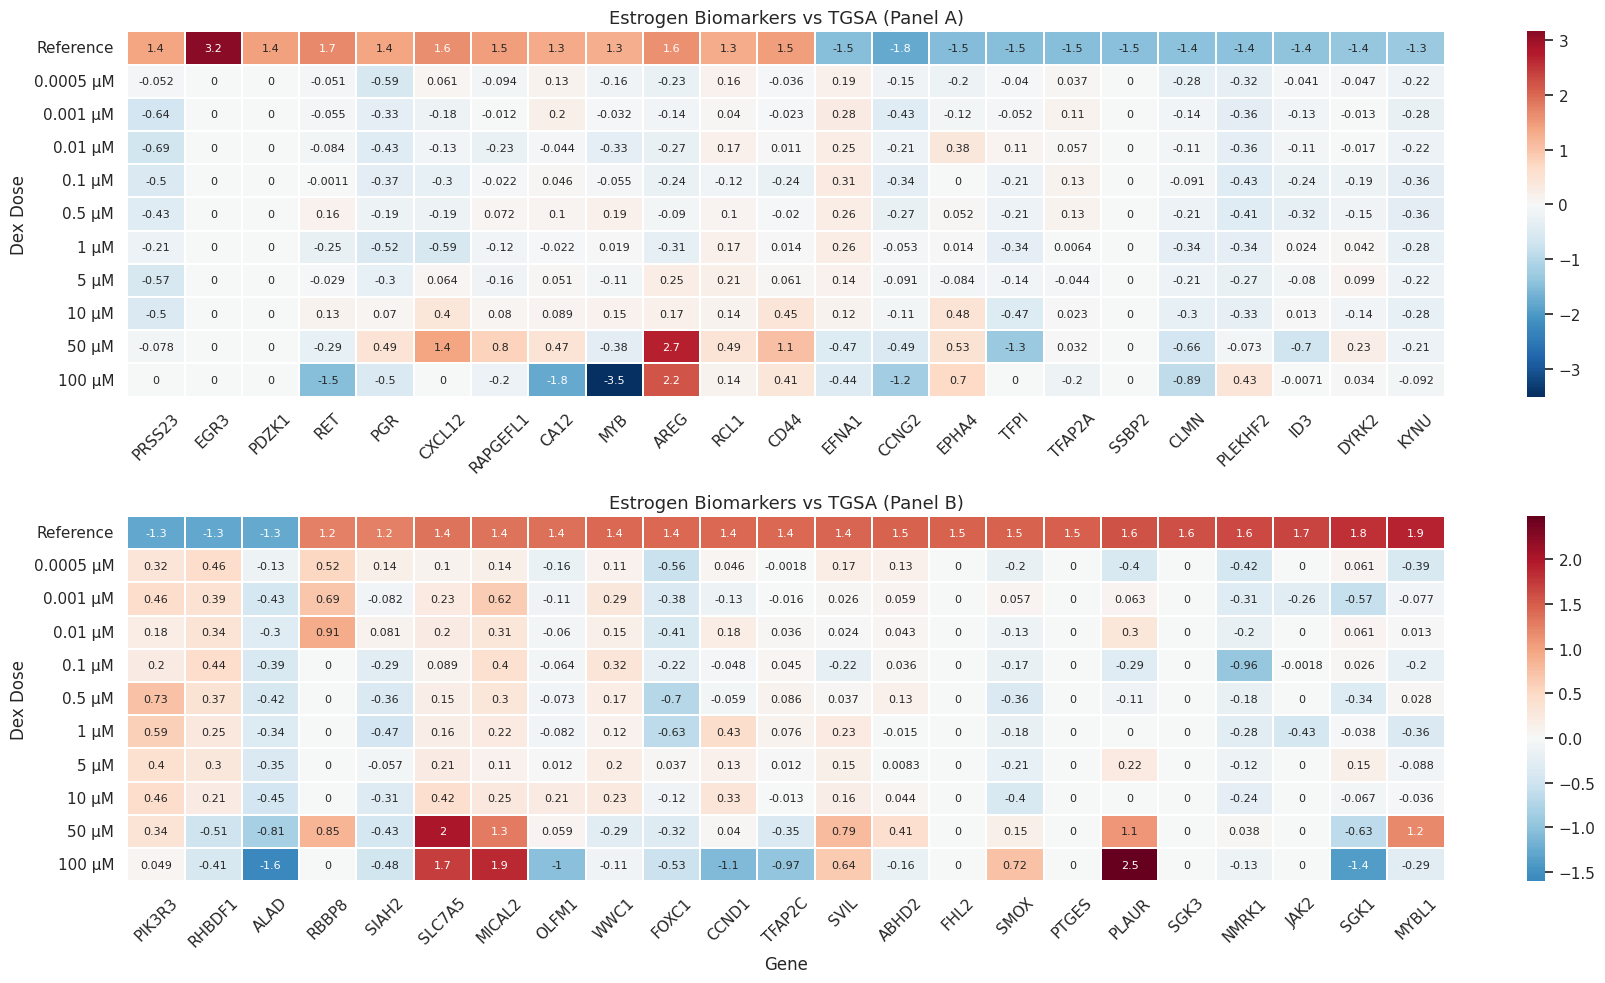

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/TGSA_estroBiomarker_Mat.csv", index_col=0)
num_genes = df.shape[1]
mid = num_genes // 2
df_panelA = df.iloc[:, :mid]
df_panelB = df.iloc[:, mid:]
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 10), sharey=True)
sns.heatmap(df_panelA,
            ax=axes[0], annot=True, fmt=".2g", cmap="RdBu_r", center=0, linewidths=0.3,
            annot_kws={"size": 8})
axes[0].set_title("Estrogen Biomarkers vs TGSA (Panel A)", fontsize=13)
axes[0].set_ylabel("Dex Dose")
axes[0].tick_params(axis='x', labelrotation=45)
sns.heatmap(df_panelB,
            ax=axes[1], annot=True, fmt=".2g", cmap="RdBu_r", center=0, linewidths=0.3,
            annot_kws={"size": 8}, cbar=True)
axes[1].set_title("Estrogen Biomarkers vs TGSA (Panel B)", fontsize=13)
axes[1].set_ylabel("Dex Dose")
axes[1].set_xlabel("Gene")
axes[1].tick_params(axis='x', labelrotation=45)
plt.tight_layout()
plt.savefig("estrogen_biomarker_split_panels_TGSA.png", dpi=300)
plt.show()

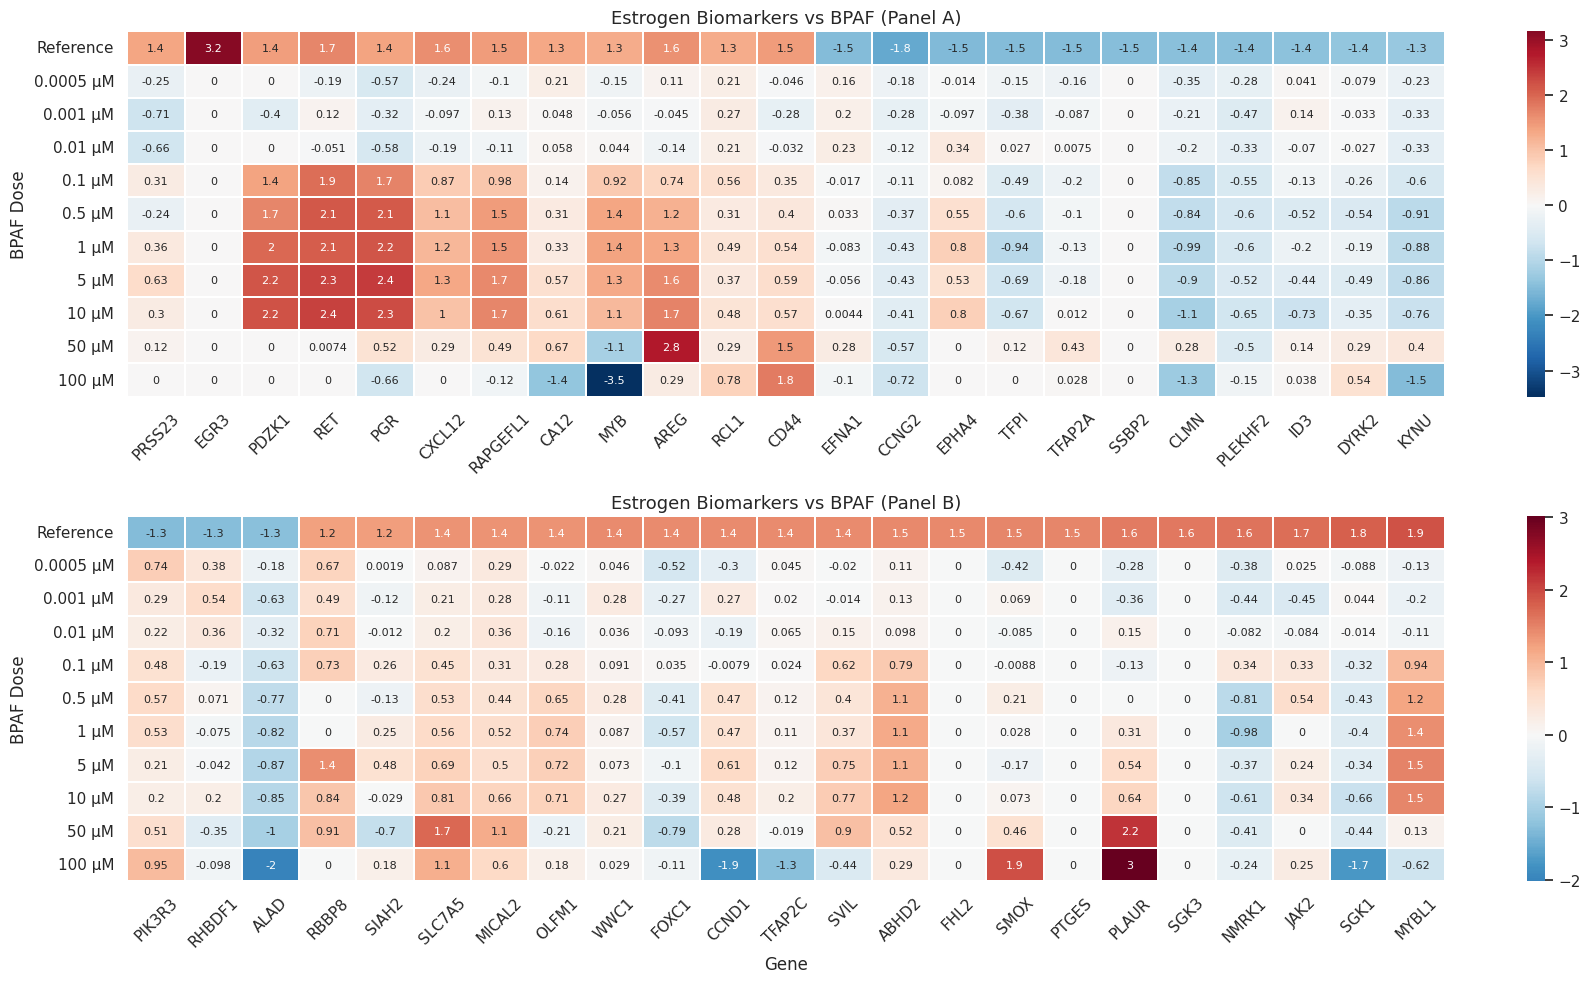

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/BPAF_estroBiomarker_Mat.csv", index_col=0)
num_genes = df.shape[1]
mid = num_genes // 2
df_panelA = df.iloc[:, :mid]
df_panelB = df.iloc[:, mid:]
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 10), sharey=True)
sns.heatmap(df_panelA,
            ax=axes[0], annot=True, fmt=".2g", cmap="RdBu_r", center=0, linewidths=0.3,
            annot_kws={"size": 8})
axes[0].set_title("Estrogen Biomarkers vs BPAF (Panel A)", fontsize=13)
axes[0].set_ylabel("BPAF Dose")
axes[0].tick_params(axis='x', labelrotation=45)
sns.heatmap(df_panelB,
            ax=axes[1], annot=True, fmt=".2g", cmap="RdBu_r", center=0, linewidths=0.3,
            annot_kws={"size": 8}, cbar=True)
axes[1].set_title("Estrogen Biomarkers vs BPAF (Panel B)", fontsize=13)
axes[1].set_ylabel("BPAF Dose")
axes[1].set_xlabel("Gene")
axes[1].tick_params(axis='x', labelrotation=45)
plt.tight_layout()
plt.savefig("estrogen_biomarker_split_panels_BPAF.png", dpi=300)
plt.show()

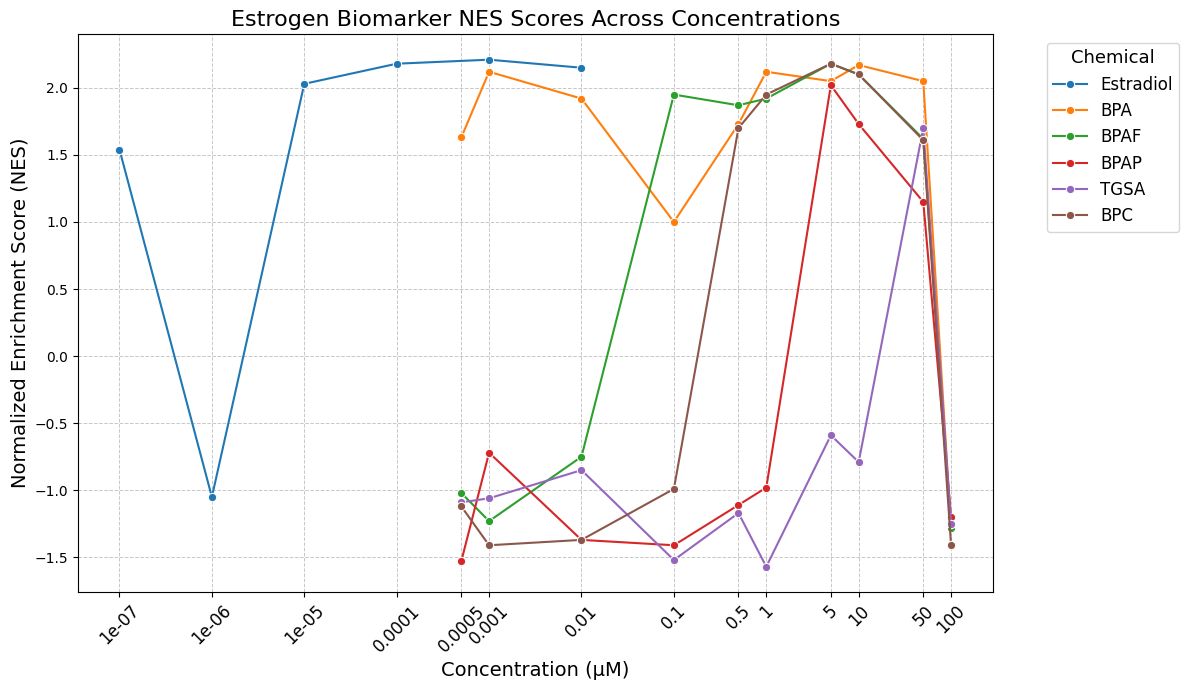

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = {
    "Concentration (µM)": [
        0.0000001, 0.000001, 0.00001, 0.0001, 0.0005, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100
    ],
    "Estradiol": [1.54, -1.05, 2.03, 2.18, np.nan, 2.21, 2.15, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    "BPA": [np.nan, np.nan, np.nan, np.nan, 1.63, 2.12, 1.92, 1.00, 1.73, 2.12, 2.05, 2.17, 2.05, -1.28],
    "BPAF": [np.nan, np.nan, np.nan, np.nan, -1.02, -1.23, -0.75, 1.95, 1.87, 1.92, 2.18, 2.10, 1.62, -1.28],
    "BPAP": [np.nan, np.nan, np.nan, np.nan, -1.53, -0.72, -1.37, -1.41, -1.11, -0.98, 2.02, 1.73, 1.15, -1.20],
    "TGSA": [np.nan, np.nan, np.nan, np.nan, -1.09, -1.06, -0.85, -1.52, -1.17, -1.57, -0.59, -0.79, 1.70, -1.25],
    "BPC": [np.nan, np.nan, np.nan, np.nan, -1.12, -1.41, -1.37, -0.99, 1.70, 1.95, 2.18, 2.10, 1.61, -1.41]
}
df = pd.DataFrame(data)
df_long = df.melt(id_vars="Concentration (µM)",
                  value_vars=["Estradiol", "BPA", "BPAF", "BPAP", "TGSA", "BPC"],
                  var_name="Chemical", value_name="NES")
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_long, x="Concentration (µM)", y="NES", hue="Chemical", marker="o")
plt.xscale('log')
concentrations = [0.0000001, 0.000001, 0.00001, 0.0001, 0.0005, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]
plt.xticks(concentrations, labels=[str(c) for c in concentrations], fontsize=12, rotation=45)
plt.xlabel("Concentration (µM)", fontsize=14)
plt.ylabel("Normalized Enrichment Score (NES)", fontsize=14)
plt.title("Estrogen Biomarker NES Scores Across Concentrations", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.7, alpha=0.7)
plt.legend(title="Chemical", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()

BPA    
E2F_TARGETS 3.02   
G2M_CHECKPOINT 2.83   
DNA_REPAIR 1.68   
INFLAMMATORY_RESPONSE -1.61   
P53_PATHWAY -1.50   
BPAF   
E2F_TARGETS 2.92   
G2M_CHECKPOINT 2.84   
DNA_REPAIR 1.67   
INFLAMMATORY_RESPONSE -1.33   
P53_PATHWAY -1.63   
BPC   
E2F_TARGETS 2.90   
G2M_CHECKPOINT 2.79   
DNA_REPAIR 1.59   
INFLAMMATORY_RESPONSE -1.67   
P53_PATHWAY -1.85   

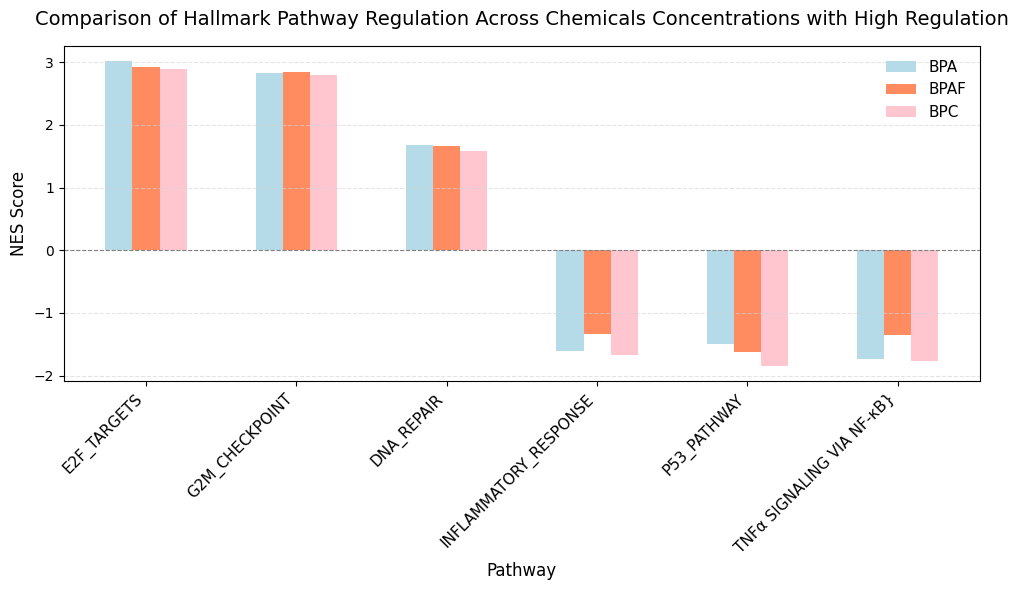

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
pathways = ["E2F_TARGETS", "G2M_CHECKPOINT", "DNA_REPAIR", "INFLAMMATORY_RESPONSE", "P53_PATHWAY", "TNFα SIGNALING VIA NF-κB}"]

nes_scores = {
    "BPA": [3.02, 2.83, 1.68, -1.61, -1.50, -1.74],
    "BPAF": [2.92, 2.84, 1.67, -1.33, -1.63, -1.35],
    "BPC": [2.90, 2.79, 1.59, -1.67, -1.85, -1.76]
}
x = np.arange(len(pathways))
width = 0.18
colors = ['lightblue', 'coral', 'pink']
fig, ax = plt.subplots(figsize=(10,6))

x_offsets = [-width, 0, width]
for idx, (chemical, offset) in enumerate(zip(nes_scores.keys(), x_offsets)):
    ax.bar(x + offset, nes_scores[chemical], width, label=chemical,
           color=colors[idx], alpha=0.9)  # No edgecolor or linewidth!
ax.set_ylabel('NES Score', fontsize=12)
ax.set_xlabel('Pathway', fontsize=12)
ax.set_title('Comparison of Hallmark Pathway Regulation Across Chemicals Concentrations with High Regulation', fontsize=14, pad=15)
ax.set_xticks(x)
ax.set_xticklabels(pathways, rotation=45, ha='right', fontsize=11)
ax.axhline(0, color='grey', linewidth=0.8, linestyle='--')  # Soft horizontal line at NES = 0
ax.yaxis.grid(True, linestyle='--', which='major', color='lightgrey', alpha=0.6)
ax.legend(frameon=False, fontsize=11)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
pathways = ["Protein Folding", "Protein Maturation", "Ribosome Biogenesis", "Actin Filament Based Process", "Enzyme Linked Receptor Protien Signaling"]

nes_scores = {
    "BPA": [3.02, 2.83, 1.68, -1.63, -1.55],
    "BPAF": [2.92, 2.84, 1.67, -1.66, -1.72],
    "BPC": [2.90, 1.72, 2.18, -1.94, -1.77]
}
x = np.arange(len(pathways))
width = 0.18
colors = ['lightblue', 'coral', 'pink']
fig, ax = plt.subplots(figsize=(10,6))
x_offsets = [-width, 0, width]
for idx, (chemical, offset) in enumerate(zip(nes_scores.keys(), x_offsets)):
    ax.bar(x + offset, nes_scores[chemical], width, label=chemical,
           color=colors[idx], alpha=0.9)
ax.set_ylabel('NES Score', fontsize=12)
ax.set_xlabel('Pathway', fontsize=12)
ax.set_title('Comparison of Hallmark Pathway Regulation Across Chemicals Concentrations with High Regulation', fontsize=14, pad=15)
ax.set_xticks(x)
ax.set_xticklabels(pathways, rotation=45, ha='right', fontsize=11)
ax.axhline(0, color='grey', linewidth=0.8, linestyle='--')  # Soft horizontal line at NES = 0
ax.yaxis.grid(True, linestyle='--', which='major', color='lightgrey', alpha=0.6)
ax.legend(frameon=False, fontsize=11)
plt.tight_layout()
plt.show()


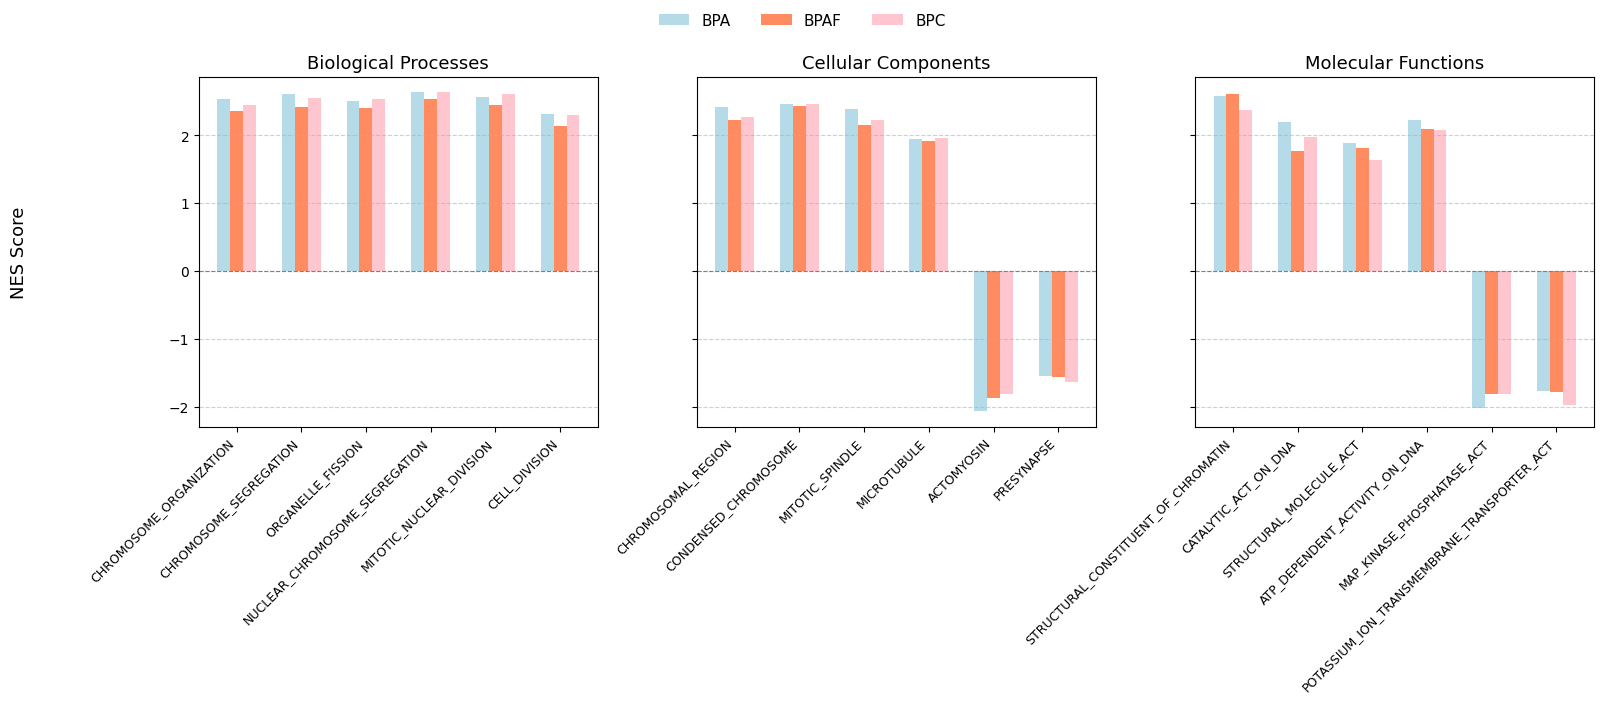

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
pathways_1 = ["CHROMOSOME_ORGANIZATION", "CHROMOSOME_SEGREGATION", "ORGANELLE_FISSION", "NUCLEAR_CHROMOSOME_SEGREGATION", "MITOTIC_NUCLEAR_DIVISION", "CELL_DIVISION"]

nes_scores_1 = {
    "BPA": [2.53, 2.61, 2.51, 2.63, 2.56, 2.31],
    "BPAF": [2.36, 2.41, 2.40, 2.53, 2.44, 2.13],
    "BPC": [2.44, 2.55, 2.53, 2.63, 2.61, 2.29]
}
pathways_2 = ["CHROMOSOMAL_REGION", "CONDENSED_CHROMOSOME", "MITOTIC_SPINDLE", "MICROTUBULE", "ACTOMYOSIN", "PRESYNAPSE"]

nes_scores_2 = {
    "BPA": [2.42, 2.46, 2.39, 1.95, -2.06,-1.55],
    "BPAF": [2.23, 2.43, 2.15, 1.91, -1.88, -1.57],
    "BPC": [2.27, 2.46, 2.23, 1.96, -1.82, -1.64]
}
pathways_3 = ["STRUCTURAL_CONSTITUENT_OF_CHROMATIN", "CATALYTIC_ACT_ON_DNA", "STRUCTURAL_MOLECULE_ACT", "ATP_DEPENDENT_ACTIVITY_ON_DNA", "MAP_KINASE_PHOSPHATASE_ACT", "POTASSIUM_ION_TRANSMEMBRANE_TRANSPORTER_ACT"]

nes_scores_3 = {
    "BPA": [2.58, 2.19, 1.89, 2.23, -2.02, -1.77],
    "BPAF": [2.60, 1.77, 1.81, 2.09, -1.81, -1.78],
    "BPC": [2.37, 1.98, 1.63, 2.07, -1.81, -1.98]
}

datasets = [
    (pathways_1, nes_scores_1, 'Biological Processes'),
    (pathways_2, nes_scores_2, 'Cellular Components'),
    (pathways_3, nes_scores_3, 'Molecular Functions')
]
colors = ['lightblue', 'coral', 'pink']
width = 0.2

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, (pathways, nes_scores, title) in zip(axes, datasets):
    x = np.arange(len(pathways))
    x_offsets = [-width, 0, width]

    for idx, (chemical, offset) in enumerate(zip(nes_scores.keys(), x_offsets)):
        ax.bar(x + offset, nes_scores[chemical], width, label=chemical, color=colors[idx], alpha=0.9)

    ax.set_title(title, fontsize=13)
    ax.set_xticks(x)
    ax.set_xticklabels(pathways, rotation=45, ha='right', fontsize=9)
    ax.axhline(0, color='grey', linewidth=0.8, linestyle='--')
    ax.grid(True, linestyle='--', axis='y', alpha=0.6)

fig.text(0.5, 0.02, ' ', ha='center', fontsize=13)
fig.text(0.02, 0.5, 'NES Score', va='center', rotation='vertical', fontsize=13)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, frameon=False, fontsize=11)

plt.subplots_adjust(wspace=0.25, top=0.85, bottom=0.15)  # less horizontal space, better margins
plt.show()